In [1]:
import pandas as pd

In [25]:
comments = pd.read_csv('data/formspring_data_1.csv',sep = '\t')

In [29]:
comments.head(10)

userid                                               post  \
0  aguitarplayer94  Q: what&#039;s your favorite song? :D<br>A: I ...   
1      aprilpooh15                     Q: <3<br>A: </3 ? haha jk! <33   
2      aprilpooh15  Q: &quot;hey angel  you duh sexy&quot;<br>A: R...   
3      aprilpooh15                                     Q: (:<br>A: ;(   
4      aprilpooh15  Q: ******************MEOWWW*******************...   
5      aprilpooh15  Q: any makeup tips? i suck at doing my makeup ...   
6      aprilpooh15  Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...   
7      aprilpooh15  Q: Are you a morning or night person?<br>A: Ni...   
8      aprilpooh15  Q: are you a trusting person?<br>A: alreadi an...   
9      aprilpooh15  Q: are you a trusting person?<br>A: Yes veryy ...   

                                                ques  \
0             what&#039;s your favorite song? :D<br>   
1                                                 <3   
2                &quot;hey angel  you duh sexy&quot;   
3                                                 (:   
4  ******************MEOWWW*************************   
5     any makeup tips? i suck at doing my makeup lol   
6  Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...   
7                 Are you a morning or night person?   
8                         are you a trusting person?   
9                         are you a trusting person?   

                                                 ans          asker ans1  \
0           I like too many songs to have a favorite           None   No   
1                                 </3 ? haha jk! <33           None   No   
2                           Really?!?! Thanks?! haha           None   No   
3                                                 ;(           None   No   
4                                            *RAWR*?           None   No   
5   Sure! Like tell me wht u wnna know?! Like wht...           None   No   
6   EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...  JustinBSource   No   
7                                    Night 4shuree!!           None   No   
8                                     alreadi answrd           None   No   
9       Yes veryy trustin person!!! May i help yuh:!           None   No   

  severity1 ans2 severity2 ans3 severity3  
0         0   No         0   No         0  
1         0   No         0   No         0  
2         0   No         0   No         0  
3         0   No         0   No         0  
4         0   No         0   No         0  
5         0   No         0   No         0  
6         0   No         0   No         0  
7         0   No         0   No      None  
8         0   No         0   No         0  
9         0   No         0   No         0

In [27]:
comments.columns

Index(['userid', 'post', 'ques', 'ans', 'asker', 'ans1', 'severity1', 'ans2',
       'severity2', 'ans3', 'severity3'],
      dtype='object')

In [6]:
def get_label(post):
    label = 1 if ((post.ans1 == "Yes" and post.ans2 == "Yes") or (post.ans2 == "Yes" and post.ans3 == "Yes") or (post.ans1 == "Yes" and post.ans3 == "Yes")) else 0
    return label
comments['attack'] = comments.apply(get_label, axis=1)

In [7]:
comments.head()

userid                                               post  \
0  aguitarplayer94  Q: what&#039;s your favorite song? :D<br>A: I ...   
1      aprilpooh15                     Q: <3<br>A: </3 ? haha jk! <33   
2      aprilpooh15  Q: &quot;hey angel  you duh sexy&quot;<br>A: R...   
3      aprilpooh15                                     Q: (:<br>A: ;(   
4      aprilpooh15  Q: ******************MEOWWW*******************...   

                                                ques  \
0             what&#039;s your favorite song? :D<br>   
1                                                 <3   
2                &quot;hey angel  you duh sexy&quot;   
3                                                 (:   
4  ******************MEOWWW*************************   

                                         ans asker ans1 severity1 ans2  \
0   I like too many songs to have a favorite  None   No         0   No   
1                         </3 ? haha jk! <33  None   No         0   No   
2                   Really?!?! Thanks?! haha  None   No         0   No   
3                                         ;(  None   No         0   No   
4                                    *RAWR*?  None   No         0   No   

  severity2 ans3 severity3  attack  
0         0   No         0       0  
1         0   No         0       0  
2         0   No         0       0  
3         0   No         0       0  
4         0   No         0       0

In [8]:
import string
comments['post'] = comments['post'].apply(lambda x: x.replace('Q:',' ').replace('A:',' ').replace('<br>',' '))
comments['post'] = comments['post'].apply(lambda x: x.replace(':D',' '))
comments['post'] = comments['post'].apply(lambda x: "".join(l for l in x if l not in string.punctuation))
comments['post']=comments['post'].apply(lambda x: "".join(l for l in x if not l.isdigit()))
comments['post']=comments['post'].apply(lambda x:"".join(x).lower())

In [10]:
comments.head()

userid                                               post  \
0  aguitarplayer94    whats your favorite song     i like too many...   
1      aprilpooh15                                           haha jk    
2      aprilpooh15    quothey angel  you duh sexyquot   really tha...   
3      aprilpooh15                                                      
4      aprilpooh15                                      meowww   rawr   

                                                ques  \
0             what&#039;s your favorite song? :D<br>   
1                                                 <3   
2                &quot;hey angel  you duh sexy&quot;   
3                                                 (:   
4  ******************MEOWWW*************************   

                                         ans asker ans1 severity1 ans2  \
0   I like too many songs to have a favorite  None   No         0   No   
1                         </3 ? haha jk! <33  None   No         0   No   
2                   Really?!?! Thanks?! haha  None   No         0   No   
3                                         ;(  None   No         0   No   
4                                    *RAWR*?  None   No         0   No   

  severity2 ans3 severity3  attack  
0         0   No         0       0  
1         0   No         0       0  
2         0   No         0       0  
3         0   No         0       0  
4         0   No         0       0

In [11]:
comments=comments[['userid','post','asker','attack']]

In [12]:
comments.head()

userid                                               post asker  \
0  aguitarplayer94    whats your favorite song     i like too many...  None   
1      aprilpooh15                                           haha jk   None   
2      aprilpooh15    quothey angel  you duh sexyquot   really tha...  None   
3      aprilpooh15                                                     None   
4      aprilpooh15                                      meowww   rawr  None   

   attack  
0       0  
1       0  
2       0  
3       0  
4       0

(array([ 11997.,    776.]),
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Patch objects>)

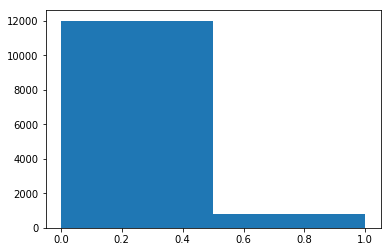

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(comments.attack,bins=2)

In [39]:
swear_word=[]
with open('swear_words.txt','r') as f:
    swear_word=f.read().splitlines()

In [40]:
print(swear_word)

['anal', 'anus', 'arrse', 'arse', 'ass', 'asses', 'assfucker', 'assfukka', 'asshole', 'assholes', 'asswhole', 'bad', 'ballbag', 'balls', 'ballsack', 'bastard', 'bbs', 'bch', 'biatch', 'bich', 'bitch', 'bitcher', 'bitchers', 'bitches', 'bitchin', 'bitching', 'blowjob', 'blowjobs', 'boiolas', 'bollock', 'bollok', 'boner', 'boob', 'boobs', 'booobs', 'boooobs', 'booooobs', 'booooooobs', 'breasts', 'btch', 'buceta', 'bugger', 'bunnyfucker', 'butt', 'butthole', 'buttmuch', 'buttplug', 'butts', 'carpetmuncher', 'cck', 'ccksucker', 'clitoris', 'cock', 'cockface', 'cockhead', 'cockmunch', 'cockmuncher', 'cocks', 'cocksuck', 'cocksucked', 'cocksucker', 'cocksucking', 'cocksucks', 'cocksuka', 'cocksukka', 'cok', 'cokmuncher', 'coksucka', 'coon', 'cox', 'cum', 'cummer', 'cumming', 'cums', 'cumshot', 'cunilingus', 'cunillingus', 'cunnilingus', 'cunt', 'cuntlick', 'cuntlicker', 'cuntlicking', 'cunts', 'cyalis', 'cyberfuc', 'cyberfuck', 'cyberfucked', 'cyberfucker', 'cyberfuckers', 'cyberfucking', 'd

In [41]:
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [42]:
t=Tokenizer()
t.fit_on_texts(comments['post'])

In [43]:
vocab_size = len(t.wordr_index) + 1
print(vocab_size)
# integer encode the documents
encoded_docs = t.texts_to_sequences(comments['post'])
# print((encoded_docs))

20225


In [48]:
len(encoded_docs[0])

13

In [51]:
max_length=0
for i in range(0,len(encoded_docs)):
    count=0
    count=len(encoded_docs[i])
    if count>max_length:
        max_length=count
print(max_length)

1067


In [53]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs.shape

(12773, 1067)

In [54]:
# from nltk.tokenize import word_tokenize
# comments['post']=comments['post'].apply(word_tokenize)

In [55]:
padded_docs.shape

(12773, 1067)

In [79]:
bad_words=[]
count=0
total=0
for i in range(comments.shape[0]):
    conent_pos=comments['post'].loc[i]
    for val in conent_pos:
        print(val)
        if val in swear_word:
            bad_words.append(val)
            count+=1
        
        total+=1
            
print(count)
print(total)

 
 
w
h
a
t
s
 
y
o
u
r
 
f
a
v
o
r
i
t
e
 
s
o
n
g
 
 
 
 
 
i
 
l
i
k
e
 
t
o
o
 
m
a
n
y
 
s
o
n
g
s
 
t
o
 
h
a
v
e
 
a
 
f
a
v
o
r
i
t
e
 
 
 
 
 
 
 
h
a
h
a
 
j
k
 
 
 
q
u
o
t
h
e
y
 
a
n
g
e
l
 
 
y
o
u
 
d
u
h
 
s
e
x
y
q
u
o
t
 
 
 
r
e
a
l
l
y
 
t
h
a
n
k
s
 
h
a
h
a
 
 
 
 
 
 
 
m
e
o
w
w
w
 
 
 
r
a
w
r
 
 
a
n
y
 
m
a
k
e
u
p
 
t
i
p
s
 
i
 
s
u
c
k
 
a
t
 
d
o
i
n
g
 
m
y
 
m
a
k
e
u
p
 
l
o
l
 
 
 
s
u
r
e
 
l
i
k
e
 
t
e
l
l
 
m
e
 
w
h
t
 
u
 
w
n
n
a
 
k
n
o
w
 
l
i
k
e
 
w
h
t
 
d
o
 
y
o
u
 
u
s
e
 
 
a
p
r
i
i
i
i
i
i
i
i
i
i
i
i
l
l
 
i
 
m
i
s
s
 
u
u
u
u
 
i
t
s
 
e
m
m
a
 
b
t
w
 
h
a
h
a
 
 
 
e
m
m
a
 
h
a
h
a
h
a
h
a
h
 
 
 
i
 
m
i
s
s
s
s
s
e
d
d
d
 
y
u
h
h
h
h
h
 
 
 
 
a
r
e
 
y
o
u
 
a
 
m
o
r
n
i
n
g
 
o
r
 
n
i
g
h
t
 
p
e
r
s
o
n
 
 
 
n
i
g
h
t
 
s
h
u
r
e
e
 
 
a
r
e
 
y
o
u
 
a
 
t
r
u
s
t
i
n
g
 
p
e
r
s
o
n
 
 
 
a
l
r
e
a
d
i
 
a
n
s
w
r
d
 
 
a
r
e
 
y
o
u
 
a
 
t
r
u
s
t
i
n
g
 
p
e
r
s
o
n
 
 
 
y
e
s
 
v
e
r
y
y
 
t
r
u
s
t
i
n
 
p
e
r


f
 
c
o
u
r
s
e
 
i
m
 
q
o
i
n
q
q
 
i
 
w
a
n
n
a
h
 
b
 
w
i
t
h
 
y
o
u
 
q
u
y
s
 
 
l
i
k
e
 
d
u
h
h
 
 
 
a
h
a
h
a
h
a
 
i
t
 
w
u
z
z
 
f
u
n
n
 
l
m
a
o
 
 
h
e
y
 
m
y
 
n
a
m
e
 
i
s
 
a
p
r
i
l
 
t
o
o
 
h
a
h
a
 
p
e
o
p
l
e
 
n
a
m
e
d
 
a
p
r
i
l
 
a
r
e
 
a
l
w
a
y
s
 
c
o
o
l
 
l
o
l
 
 
 
h
a
h
a
h
a
 
o
h
h
 
c
o
o
l
 
w
a
i
t
 
a
r
e
 
y
u
h
 
t
h
e
e
 
a
p
r
i
l
 
o
n
 
t
w
i
t
t
e
r
 
a
p
r
i
l
 
h
a
h
a
 
y
a
y
 
w
e
 
b
e
a
s
t
s
 
y
o
 
h
a
a
 
 
h
e
y
 
y
o
u
r
e
 
a
n
 
a
m
a
z
i
n
g
 
n
i
c
e
 
a
n
d
 
s
w
e
e
t
 
g
i
r
l
p
r
e
t
t
y
 
t
o
o
 
 
 
a
w
w
h
h
h
t
h
a
n
k
 
y
u
h
 
j
a
c
o
b
 
u
r
 
r
e
a
l
l
y
 
n
i
c
e
 
m
i
g
h
t
 
b
e
 
m
y
 
n
e
w
 
b
e
s
t
i
e
 
 
t
h
a
n
k
 
y
u
h
 
s
o
 
m
u
c
h
 
 
h
e
y
 
w
h
y
 
y
o
u
 
s
u
c
h
 
a
 
b
i
t
c
h
 
 
 
w
h
y
 
t
h
a
n
k
 
y
u
h
 
 
h
e
y
y
y
 
a
b
r
i
l
l
l
 
i
l
o
v
e
y
h
u
u
u
 
m
u
c
h
o
o
o
 
 
 
h
e
y
y
 
m
a
r
r
i
b
b
b
i
i
i
 
l
m
a
o
 
i
l
o
v
e
y
u
h
h
h
 
m
u
c
h
o
o
o
 
m
o
e
e
e
 
a
r
e
 


g
u
e
s
t
s
 
b
e
 
 
 
j
u
s
t
i
n
 
b
i
e
b
e
r
 
d
e
m
i
 
l
o
v
a
t
o
 
a
n
d
 
b
a
r
a
c
k
 
o
b
a
m
a
 
b
a
b
a
y
 
 
 
i
f
 
y
o
u
 
w
o
n
 
a
 
 
 
s
h
o
p
p
i
n
g
 
s
p
r
e
e
 
f
o
r
 
a
n
y
 
s
t
o
r
e
 
 
w
h
i
c
h
 
s
t
o
r
e
 
w
o
u
l
d
 
y
o
u
 
p
i
c
k
 
 
 
a
p
p
l
e
 
s
t
o
r
e
 
n
e
e
d
 
a
 
m
a
c
 
p
r
o
 
 
i
f
 
y
o
u
 
w
o
n
 
a
 
m
i
l
l
i
o
n
 
d
o
l
l
a
r
s
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
d
o
 
w
i
t
h
 
i
t
 
 
 
g
r
e
a
t
 
q
u
e
s
t
i
o
n
 
t
i
t
h
e
 
h
e
l
p
 
p
e
o
p
l
e
 
s
h
o
p
 
 
i
f
 
y
o
u
r
 
h
o
u
s
e
 
w
a
s
 
o
n
 
f
i
r
e
 
a
n
d
 
y
o
u
 
c
o
u
l
d
 
o
n
l
y
 
g
r
a
b
 
t
h
r
e
e
 
t
h
i
n
g
s
 
 
w
h
a
t
 
w
o
u
l
d
 
t
h
e
y
 
b
e
 
 
 
l
a
p
t
o
p
 
d
o
g
s
 
f
a
m
i
l
y
 
s
h
o
e
s
 
b
e
d
 
c
l
o
t
h
e
s
 
c
o
f
f
e
e
 
m
a
k
e
r
 
o
v
e
n
 
w
a
s
h
e
r
a
m
p
d
r
y
e
r
 
r
e
f
r
i
d
g
e
r
a
t
o
r
 
t
a
b
l
e
a
m
p
c
h
a
i
r
s
 
p
i
c
s
 
c
a
m
e
r
a
 
b
a
t
h
 
t
u
b
 
h
a
h
a
h
a
h
a
h
a
h
h
a
h
a
 
 
i
l
o
v
e
 
y
o
u
r
 
n
o
s
e
 
r


h
e
e
 
h
i
l
l
s
 
a
n
d
 
t
h
e
r
e
 
i
s
 
m
u
c
h
 
d
r
a
m
a
 
b
h
u
t
 
i
 
s
t
i
l
l
 
w
t
c
h
 
i
t
 
c
h
u
z
 
i
 
l
o
v
e
 
 
l
a
u
g
h
 
a
t
 
t
h
e
e
 
d
u
m
b
 
s
h
i
t
 
s
p
e
n
c
e
r
 
i
s
 
a
 
p
r
i
c
k
 
b
t
w
 
 
w
h
a
t
 
w
a
s
 
t
h
e
 
b
e
s
t
 
c
o
n
c
e
r
t
 
y
o
u
 
w
e
n
t
 
t
o
 
 
 
j
o
n
a
s
 
b
r
o
t
h
e
r
s
 
c
o
n
c
e
r
t
 
 
d
 
i
 
s
t
i
l
l
 
l
o
v
e
 
e
m
 
b
h
u
t
 
j
u
s
t
i
n
 
b
i
e
b
e
r
 
i
s
 
t
h
e
e
 
s
h
i
t
 
 
w
h
a
t
 
w
a
s
 
t
h
e
 
h
a
p
p
i
e
s
t
 
m
o
m
e
n
t
 
i
n
 
y
o
u
r
 
l
i
f
e
 
 
 
i
 
h
a
v
e
 
m
a
n
y
 
m
a
n
y
 
a
c
t
u
a
l
l
y
 
b
h
u
t
 
i
 
g
u
e
s
s
 
w
h
e
n
 
i
 
f
o
u
n
d
 
m
y
 
l
i
f
e
t
i
m
e
 
f
r
i
e
n
d
s
 
d
 
 
w
h
a
t
 
w
a
s
 
t
h
e
 
l
a
s
t
 
b
o
o
k
 
y
o
u
 
r
e
a
d
 
 
 
t
h
e
 
m
i
r
a
c
l
e
 
w
o
r
k
e
r
 
 
w
h
a
t
 
w
a
s
 
t
h
e
 
w
o
r
s
t
 
a
d
v
i
c
e
 
y
o
u
v
e
 
e
v
e
r
 
r
e
c
e
i
v
e
d
 
 
 
t
h
i
s
 
p
e
r
s
o
n
 
a
c
t
u
a
l
l
y
 
t
o
l
d
 
m
e
 
t
h
i
s
 
q
u
o
t
f
r
i
e
d
q
u
o
t
 


a
r
e
 
y
a
 
f
r
o
m
 
 
 
u
s
a
 
k
n
o
w
n
 
a
s
 
m
a
r
s
 
 
w
h
e
r
e
 
w
o
u
l
d
 
y
o
u
 
l
i
k
e
 
t
o
 
s
p
e
n
d
 
y
o
u
r
 
r
e
t
i
r
e
m
e
n
t
 
 
 
h
a
h
a
w
h
e
n
 
i
 
t
u
r
n
 
 
i
s
h
 
a
s
k
 
m
e
 
t
h
i
s
 
l
o
l
 
 
w
h
e
r
e
 
w
o
u
l
d
 
y
o
u
 
m
o
s
t
 
l
i
k
e
 
t
o
 
l
i
v
e
 
 
 
l
o
s
 
a
n
g
e
l
e
s
 
 
 
w
h
e
r
e
s
 
y
o
u
r
 
i
d
e
a
l
 
h
o
l
i
d
a
y
 
d
e
s
t
i
n
a
t
i
o
n
 
 
 
u
m
m
 
d
a
l
l
a
s
 
t
e
x
a
s
 
h
a
h
a
 
i
d
k
 
i
m
 
s
o
 
p
l
a
i
n
 
s
o
 
i
d
k
 
m
w
h
a
h
a
 
 
w
h
o
 
a
n
d
 
w
h
e
n
 
w
a
s
 
y
o
u
r
 
f
i
r
s
t
 
k
i
s
s
 
 
 
u
m
m
 
l
o
n
g
 
t
i
m
e
 
a
g
o
 
b
h
u
t
 
i
 
w
a
s
 
l
i
k
e
 
 
o
r
 
 
h
a
h
a
 
c
o
r
y
 
 
w
h
o
 
a
r
e
 
y
o
u
r
 
t
o
p
 
t
h
r
e
e
 
c
e
l
e
b
r
i
t
y
 
c
r
u
s
h
e
s
 
 
 
y
u
m
m
 
j
u
s
t
i
n
 
b
i
e
b
e
r
 
p
d
i
d
d
y
s
 
s
o
n
 
j
d
o
i
r
 
y
u
m
m
m
h
a
h
a
 
n
o
t
 
r
e
a
l
l
y
 
a
 
c
e
l
e
b
 
b
h
u
t
 
y
e
a
h
 
a
m
p
a
m
p
 
c
h
a
n
n
i
n
g
 
f
c
k
n
 
t
a
t
u
m
h
a
h
a
 
o
h
 


 
t
e
a
r
 
u
p
 
l
a
 
v
e
 
b
o
h
e
m
e
 
i
s
 
a
 
g
o
o
d
 
o
n
e
 
t
w
o
 
 
w
h
e
r
e
d
 
y
o
u
 
f
i
n
d
 
o
u
t
 
a
b
o
u
t
 
f
o
r
m
s
p
r
i
n
g
m
e
 
 
 
u
m
m
 
b
u
n
c
h
 
o
f
 
p
e
o
p
l
e
 
j
u
s
t
 
j
o
i
n
e
d
 
 
a
n
d
 
i
 
g
o
t
 
b
o
r
e
d
 
 
s
o
 
i
 
w
a
n
t
e
d
 
t
o
o
 
 
w
h
o
 
w
a
s
 
u
r
 
f
i
r
s
t
 
k
i
s
s
 
 
 
u
m
m
 
h
a
h
a
 
i
 
d
o
n
t
 
k
n
o
w
 
w
h
y
 
y
o
u
 
w
a
n
t
 
t
o
 
k
n
 
 
w
h
y
 
u
 
s
o
 
p
e
r
f
e
c
t
 
 
 
 
h
a
h
a
h
a
 
i
m
 
t
h
e
 
f
a
r
t
h
e
s
t
 
f
r
o
m
 
 
a
r
e
 
y
o
u
 
w
e
a
r
i
n
g
 
t
h
e
 
p
 
 
 
i
m
 
n
o
t
 
w
e
a
r
i
n
g
 
 
d
o
 
y
o
u
 
h
a
v
e
 
a
 
b
o
y
f
r
i
e
n
d
 
 
 
y
e
s
s
 
 
 
c
a
n
 
y
o
u
 
c
o
m
e
 
t
o
 
m
y
 
p
a
r
t
y
 
t
o
n
i
g
h
t
t
 
 
 
 
w
h
o
 
i
s
s
 
t
h
i
i
i
s
 
 
 
d
a
m
n
 
i
 
h
a
t
e
 
s
h
i
i
i
i
t
 
t
a
l
k
e
r
s
 
o
n
 
f
o
r
m
s
p
r
i
n
g
g
g
 
i
 
t
h
o
u
g
h
t
 
i
t
 
w
a
s
 
j
u
s
t
 
a
 
r
a
n
d
o
m
 
q
u
e
s
t
i
o
n
 
s
i
t
e
 
t
h
i
n
g
 
 
 
a
h
a
h
a
 
t
h
a
n
k
s
s


h
i
n
g
 
i
 
h
a
v
e
n
t
 
h
e
a
r
d
 
o
f
 
y
o
u
 
x
 
 
 
n
o
p
e
e
 
 
a
r
e
 
y
o
u
 
f
a
t
 
 
 
n
o
p
e
 
 
a
r
e
 
y
o
u
 
g
o
o
d
 
a
t
 
h
a
n
g
m
a
n
 
i
 
s
u
c
k
 
a
t
 
i
t
 
 
 
 
n
o
 
 
a
r
e
 
y
o
u
 
m
e
n
t
a
l
 
s
h
e
 
m
a
d
e
 
a
 
p
r
o
o
f
 
v
i
d
e
o
 
y
o
u
 
c
a
n
t
 
l
i
e
 
 
 
a
r
e
 
y
o
u
 
 
a
r
e
 
y
o
u
 
r
e
a
d
y
 
t
o
 
s
t
a
r
t
 
s
c
h
o
o
l
 
i
 
a
m
 
 
 
 
y
e
a
 
 
 
a
r
e
 
y
o
u
 
s
i
n
g
l
e
 
 
 
y
e
a
 
 
a
s
h
l
e
e
 
c
y
r
u
s
 
f
l
o
r
i
d
a
 
 
h
e
y
 
i
m
 
a
s
h
l
e
e
 
i
m
 
t
i
r
e
d
 
o
f
 
e
v
e
r
y
o
n
e
 
c
o
m
m
e
n
t
i
n
g
 
o
n
 
m
y
 
d
a
m
n
 
f
o
r
m
s
p
r
i
n
g
 
t
a
l
k
i
n
g
 
s
h
i
t
 
 
 
o
k
a
y
 
 
a
s
h
l
e
e
 
c
y
r
u
s
r
 
c
y
r
u
s
 
i
s
 
a
 
l
a
m
e
 
l
a
s
t
 
n
a
m
e
r
 
e
v
e
r
y
o
n
e
 
k
n
o
w
s
 
i
f
 
y
o
u
r
 
a
 
c
y
r
u
s
 
 
y
o
u
 
g
o
t
t
a
 
b
e
 
f
a
k
e
 
 
a
n
d
 
y
o
u
r
e
 
p
r
o
b
a
b
l
y
 
r
e
a
l
l
 
u
g
l
y
 
i
n
 
r
e
a
l
 
l
i
f
e
r
 
l
m
f
a
o
 
 
 
d
u
h
 
o
f
 
c
o
u
r
s
e
 
c


c
h
i
c
k
 
 
g
r
o
s
s
s
 
y
o
u
r
 
f
a
c
e
 
i
s
 
n
a
s
t
y
 
 
 
s
o
 
i
s
 
y
o
u
r
s
 
 
g
r
o
s
s
s
 
y
o
u
r
 
f
a
c
e
 
i
s
 
n
a
s
t
y
 
 
 
s
o
 
i
s
 
y
o
u
r
s
 
y
o
u
 
d
o
n
t
 
s
e
e
 
m
e
 
c
o
m
p
l
a
i
n
i
n
g
 
 
g
u
e
s
s
 
w
h
a
t
 
y
o
u
 
s
h
o
u
l
d
 
d
o
 
g
e
t
 
a
 
l
i
f
e
 
i
 
d
o
n
t
 
e
v
e
n
 
k
n
o
w
 
y
o
u
 
s
o
 
w
h
y
 
w
o
u
l
d
 
y
o
u
 
e
v
e
n
 
s
t
a
r
t
 
s
h
i
t
 
w
i
t
h
 
m
e
 
s
e
r
i
o
u
s
l
y
 
 
y
o
u
 
m
u
s
t
 
b
e
 
a
 
b
i
t
 
m
e
s
s
e
d
 
u
p
 
i
n
 
t
h
e
 
h
e
a
d
 
p
a
t
h
e
t
i
c
 
 
 
i
 
h
a
v
e
 
o
n
e
 
f
o
r
 
y
o
u
r
 
i
n
f
o
r
m
a
t
i
o
n
 
n
o
p
e
 
i
 
a
i
n
t
 
m
e
s
s
e
d
 
u
p
 
 
g
u
y
s
 
w
h
a
t
 
d
o
 
y
o
u
 
h
a
t
e
 
m
o
s
t
 
a
b
o
u
t
 
g
i
r
l
s
 
 
g
i
r
l
s
 
w
h
a
t
 
d
o
 
y
o
u
 
h
a
t
e
 
m
o
s
t
 
a
b
o
u
t
 
g
u
y
s
 
 
 
t
h
e
y
 
c
a
n
 
b
e
 
a
n
n
o
y
i
n
g
 
 
h
a
h
a
 
l
i
f
e
l
e
s
s
 
c
u
n
t
 
s
t
o
p
 
w
r
i
t
i
n
g
 
o
n
 
m
y
 
w
a
l
l
 
y
o
u
 
s
h
i
t
 
f
a
c
e
d
 
s
l
u
t
 
 
 


a
i
n
 
l
o
l
 
 
w
h
y
 
i
s
 
e
v
e
r
y
o
n
e
 
s
a
y
i
n
g
 
y
o
u
r
 
f
a
k
e
 
 
 
t
h
e
y
 
a
r
e
 
s
t
u
p
i
d
 
 
i
t
s
 
c
o
o
l
 
h
o
w
 
y
o
u
 
s
w
e
a
r
 
w
h
e
n
 
y
o
u
r
 
o
n
l
y
 
 
 
 
 
i
 
k
n
o
w
 
 
l
a
l
a
 
 
 
l
o
l
o
l
o
l
 
 
l
e
a
r
n
 
h
o
w
 
t
o
 
s
p
e
l
l
 
l
e
a
r
n
 
h
o
w
 
t
o
 
t
e
l
l
 
a
p
a
r
t
 
a
 
t
y
p
o
 
f
r
o
m
 
a
 
s
p
e
l
l
i
n
g
 
e
r
r
o
r
 
 
 
a
n
d
 
l
e
a
r
n
 
h
o
w
 
t
o
 
b
e
 
a
 
p
r
o
p
e
r
 
f
a
k
e
 
 
 
y
o
u
 
l
e
a
r
n
 
t
o
 
k
e
e
p
 
y
o
u
r
 
d
a
m
n
 
m
o
u
t
h
 
s
h
u
t
 
 
l
m
f
a
o
 
 
y
o
u
r
e
 
f
u
c
k
i
n
g
 
c
r
e
e
p
y
 
a
m
p
 
m
u
s
t
 
h
a
v
e
 
n
o
 
f
r
i
e
n
d
s
 
n
o
r
 
l
i
f
e
 
 
i
f
 
y
o
u
 
h
a
v
e
 
t
o
 
c
r
e
a
t
e
 
m
u
l
i
p
l
e
 
f
o
r
m
s
p
r
i
n
g
s
 
o
f
 
y
o
u
r
s
e
l
f
 
 
s
a
y
i
n
g
 
t
h
e
y
r
e
 
f
a
k
e
s
 
q
u
i
t
 
t
h
i
n
k
i
n
g
 
e
v
e
r
y
o
n
e
 
w
a
n
t
s
 
t
o
 
b
e
 
y
o
u
 
 
a
m
p
 
t
h
e
y
 
c
o
p
y
 
y
o
u
 
n
o
 
o
n
e
 
w
o
u
l
d
 
f
a
k
e
 
y
o
u
 
i
m
 
s
o


h
t
 
n
o
w
 
 
g
i
m
m
e
 
i
d
e
a
s
 
a
m
p
 
i
 
w
i
l
l
 
a
s
k
 
m
o
r
e
 
s
t
u
f
f
 
 
 
 
 
s
u
r
e
 
w
i
l
l
 
 
u
 
k
n
o
w
 
u
 
c
a
r
e
 
t
h
a
t
 
b
e
t
t
y
 
i
s
 
w
a
y
 
b
e
t
t
e
r
 
l
o
o
k
i
n
g
 
t
h
a
n
 
u
 
 
 
s
h
e
 
i
s
 
f
u
g
l
y
 
 
u
g
l
y
 
p
i
e
c
e
 
o
f
 
s
h
i
t
 
 
 
s
t
o
p
 
t
a
l
k
i
n
g
 
a
b
o
u
t
 
y
o
u
r
s
e
l
f
 
 
u
g
l
y
 
 
 
i
 
k
n
o
w
 
y
o
u
 
a
r
e
 
 
u
h
m
 
y
o
u
 
d
i
d
 
 
r
i
g
h
t
 
d
o
w
n
 
t
h
e
r
e
 
v
v
v
v
v
v
v
 
y
o
u
r
e
 
t
h
e
 
d
u
m
b
f
u
c
k
 
 
s
t
o
p
 
s
t
a
r
t
i
n
g
 
s
h
i
t
 
w
i
t
h
 
e
v
e
r
y
o
n
e
 
 
k
c
o
o
l
b
y
e
 
 
 
b
i
t
c
h
 
y
o
u
r
 
t
h
e
 
o
n
e
 
w
h
o
 
i
s
 
c
o
p
y
i
n
g
 
m
e
 
 
u
r
 
f
a
c
e
 
i
s
 
n
a
s
t
y
 
 
 
y
e
p
 
 
u
r
 
p
r
e
t
t
y
 
s
c
r
e
w
 
e
v
e
r
y
 
o
n
e
 
b
e
l
o
w
 
m
e
 
p
 
 
 
t
h
a
n
k
s
 
 
 
 
w
e
l
l
 
d
o
n
t
 
b
e
c
a
u
s
e
 
i
t
s
 
c
r
u
d
e
 
 
 
c
r
u
d
e
 
 
w
h
a
t
 
a
m
 
i
 
g
o
i
n
g
 
t
o
 
d
o
 
h
a
h
a
h
a
 
 
w
h
a
t
 
a
m
 
i
 
g
o
i
n
g


 
s
o
 
a
r
e
 
y
o
u
 
f
o
r
 
c
o
m
m
e
n
t
i
n
g
 
m
y
 
f
o
r
m
s
p
r
i
n
g
 
 
y
o
u
r
e
 
m
e
a
n
 
 
 
o
k
a
y
 
 
y
o
u
r
e
 
o
n
e
 
o
f
 
t
h
e
 
u
g
l
i
e
s
t
 
b
i
t
c
h
e
s
 
i
v
e
 
e
v
e
r
 
f
u
c
k
i
n
g
 
s
e
e
n
 
 
 
h
a
v
e
 
y
o
u
 
s
e
e
n
 
y
o
u
r
 
f
a
c
e
 
l
a
t
e
l
y
 
b
e
c
a
u
s
e
 
i
f
 
y
o
u
 
h
a
d
 
y
o
u
 
w
o
u
l
d
n
t
 
b
e
 
t
a
l
k
i
n
 
h
u
n
 
 
 
y
o
u
r
e
 
r
e
a
l
l
y
 
r
u
d
e
 
w
h
a
t
 
t
h
e
 
h
e
c
k
 
i
s
 
y
o
u
r
 
p
r
o
b
l
e
m
 
 
 
i
 
d
u
n
n
o
 
w
h
a
t
s
 
y
o
u
r
s
 
 
y
o
u
r
e
 
t
h
e
 
b
i
t
c
h
 
 
f
u
c
k
 
o
f
f
 
 
 
i
m
 
n
o
t
 
a
 
d
o
g
 
h
u
n
 
 
y
o
u
r
 
a
 
f
a
k
e
 
y
o
u
r
 
a
 
f
a
k
e
 
f
o
r
 
c
a
l
l
i
n
g
 
t
h
e
 
r
e
a
l
 
h
a
i
l
e
y
 
f
a
k
e
 
o
n
 
h
e
r
 
f
o
r
m
s
p
r
i
n
g
 
w
h
a
t
 
a
 
l
a
m
e
 
b
i
t
c
h
 
 
 
 
y
o
u
r
 
l
a
m
e
 
f
o
r
 
n
o
 
l
e
a
v
i
n
g
 
y
o
u
r
 
s
t
u
p
i
d
 
u
s
e
r
n
a
m
e
 
 
y
o
u
r
 
a
 
f
u
c
k
i
n
 
u
g
l
y
 
b
i
t
c
h
 
y
o
u
 
l
o
o
k
 
l
i
k
e
 
a
 
m
a
n


r
i
e
n
d
 
 
 
y
e
a
h
 
 
i
 
w
a
n
n
a
 
b
e
 
w
i
t
h
 
s
o
m
e
o
n
e
 
 
d
o
 
y
o
u
 
w
a
n
t
 
a
n
o
t
h
e
r
 
h
i
n
t
 
 
 
y
e
s
s
 
 
 
d
o
e
s
 
i
t
 
l
o
o
k
 
l
i
k
e
 
i
 
g
i
v
e
 
a
 
f
l
y
i
n
g
 
f
u
c
k
 
 
 
 
y
o
u
 
s
h
o
u
l
d
 
 
c
a
u
s
e
 
y
o
u
r
e
 
a
 
f
r
i
e
n
d
l
e
s
s
 
f
a
g
g
o
t
 
 
d
o
n
t
 
e
v
e
n
 
t
r
y
 
t
o
 
d
e
n
y
 
i
t
 
s
h
e
 
c
a
n
 
d
o
 
s
o
 
m
u
c
h
 
b
e
t
t
e
r
 
t
h
e
n
 
y
o
u
 
i
 
j
u
s
t
 
w
i
s
h
 
s
h
e
 
c
o
u
l
d
 
o
p
e
n
 
t
h
o
s
e
 
p
r
e
t
t
y
 
l
i
t
t
l
e
 
e
y
e
s
 
o
f
 
h
e
r
s
 
a
n
d
 
s
e
e
 
i
t
 
f
u
c
k
i
n
g
 
p
l
a
y
e
r
 
 
 
i
m
 
s
u
r
e
 
s
h
e
 
c
a
n
 
 
d
o
n
t
 
s
q
u
i
r
m
 
m
o
t
h
a
 
f
u
c
k
a
 
i
t
s
 
j
u
s
t
 
a
 
s
y
r
i
n
g
e
 
i
n
 
m
y
 
s
p
a
r
e
 
t
i
m
e
 
i
 
s
k
i
n
 
t
h
e
s
e
 
n
i
g
g
e
r
s
 
a
n
d
 
h
i
t
 
u
p
 
t
h
e
 
n
i
g
g
a
 
n
i
c
o
 
t
o
 
b
i
n
g
e
 
a
h
a
 
w
h
a
t
 
u
p
 
n
i
g
g
a
 
z
u
r
e
 
 
 
n
i
c
e
 
r
h
y
m
e
 
l
l
a
m
a
 
f
u
c
k
e
r
 
 
 
d
u
d
d
e
 
i
m


 
 
h
o
w
 
d
o
 
y
o
u
u
 
p
l
a
n
 
o
n
 
m
a
k
i
n
g
 
m
y
 
b
i
r
t
h
d
a
y
 
a
m
a
z
i
n
g
 
 
 
 
h
a
h
a
 
r
e
a
d
 
m
y
 
p
r
e
v
i
o
u
s
 
m
e
s
s
a
g
e
 
 
 
h
o
w
 
h
a
v
e
 
y
o
u
r
 
p
a
s
t
 
c
o
u
p
l
e
 
d
a
y
s
 
b
e
e
n
 
 
 
t
h
e
y
v
e
 
b
e
e
n
 
g
o
o
d
 
 
 
i
 
c
a
n
t
 
t
e
l
l
 
y
o
u
 
t
h
a
t
 
b
e
c
a
u
s
e
 
i
t
 
w
o
u
l
d
 
g
i
v
e
 
i
t
 
a
w
a
y
b
u
t
 
i
 
d
i
d
n
t
 
k
n
o
w
 
y
o
u
 
p
e
r
s
o
n
a
l
l
y
 
l
a
s
t
 
y
e
a
r
 
 
 
d
o
 
y
o
u
 
p
l
a
y
 
a
n
y
 
s
p
o
r
t
s
 
 
i
 
d
i
d
n
t
 
s
a
y
 
u
 
d
i
d
 
i
t
 
d
i
d
 
i
 
n
o
 
i
 
d
i
d
n
t
 
 
 
w
e
l
l
 
t
h
e
n
 
w
h
y
 
d
i
d
 
y
o
u
 
b
r
i
n
g
 
i
t
 
u
p
 
 
i
 
d
o
 
k
n
o
w
 
y
o
u
 
o
n
 
a
 
p
e
r
s
o
n
a
l
 
l
e
v
e
l
 
b
i
t
c
h
 
 
 
w
e
l
l
 
i
f
 
y
o
u
 
c
a
n
t
 
s
u
p
p
o
r
t
 
m
e
 
a
n
d
 
m
y
 
d
e
c
i
s
i
o
n
s
 
t
h
e
n
 
m
a
y
b
e
 
w
e
 
s
h
o
u
l
d
n
t
 
b
e
 
f
r
i
e
n
d
s
 
b
i
t
c
h
 
 
i
 
d
o
 
s
u
p
p
o
r
t
 
y
o
u
 
i
 
j
u
s
t
 
w
i
s
h
 
y
o
u
d
 
b
e
 
d


a
t
e
 
t
a
y
l
o
r
 
s
h
e
 
u
s
e
d
 
t
o
 
b
 
f
i
r
e
y
 
u
n
t
i
l
 
s
h
e
 
d
y
e
d
 
h
e
r
 
h
a
i
r
 
 
 
o
k
a
y
 
i
 
d
o
n
t
 
r
e
a
l
l
y
 
g
i
v
e
 
a
 
s
h
i
t
 
s
o
 
f
i
n
d
 
s
o
m
e
t
h
i
n
g
 
b
e
t
t
e
r
 
t
o
 
d
o
 
t
h
a
n
 
c
r
i
t
i
c
i
z
e
 
m
e
 
 
n
o
 
i
m
 
n
o
t
 
b
u
t
 
t
h
a
n
k
s
 
f
o
r
 
t
h
r
o
w
i
n
g
 
t
h
a
t
 
o
u
t
 
t
h
e
r
e
 
 
 
 
u
h
h
 
y
o
u
 
s
o
u
n
d
 
l
i
k
e
 
a
 
r
e
t
a
r
d
 
w
h
e
n
 
y
o
u
 
s
a
y
 
s
h
i
t
 
l
i
k
e
 
t
h
a
t
 
 
c
a
u
s
e
 
y
o
u
 
d
o
n
t
 
k
n
o
w
 
w
h
a
t
s
 
g
o
n
n
a
 
h
a
p
p
e
n
w
e
 
c
o
u
l
d
 
b
e
 
g
o
i
n
g
 
o
u
t
 
f
o
r
 
o
n
e
 
d
a
y
 
o
r
 
o
n
e
 
y
e
a
r
 
 
b
u
t
 
i
t
 
d
o
e
s
n
t
 
m
a
t
t
e
r
 
c
a
u
s
e
 
i
l
l
 
a
l
w
a
y
s
 
f
e
e
l
 
t
h
e
 
s
a
m
e
 
a
b
o
u
t
 
h
e
r
 
 
n
o
p
e
 
u
n
f
o
r
t
u
n
a
t
e
l
y
 
 
 
a
h
h
 
 
n
o
t
 
t
e
l
l
i
n
g
 
y
o
u
 
w
i
l
l
 
h
a
v
e
 
t
o
 
j
u
s
t
 
f
i
n
d
 
o
u
t
 
o
n
 
y
o
u
r
 
o
w
n
 
i
t
 
p
r
o
b
a
b
l
y
 
w
o
n
t
 
b
e
 
t
o
o
 


 
v
 
 
 
i
 
d
o
n
t
 
k
n
o
w
 
 
y
a
h
 
i
m
 
s
u
r
 
s
h
 
d
n
t
 
w
a
n
t
 
y
u
 
 
 
o
h
 
t
h
a
t
s
 
b
a
d
 
n
e
w
s
 
 
a
n
d
 
n
i
c
e
 
g
a
y
 
t
y
p
i
n
g
 
d
u
d
e
 
 
y
e
a
h
 
g
o
 
a
h
e
a
d
 
a
n
d
 
p
l
a
y
 
v
i
c
t
i
m
 
 
i
 
d
o
 
k
n
o
w
 
y
o
u
 
n
i
c
o
 
t
h
a
t
s
 
h
o
w
 
i
 
k
n
o
w
 
y
o
u
r
 
a
 
p
l
a
y
e
r
 
 
 
f
u
c
k
 
y
o
u
 
b
i
t
c
h
 
 
i
f
 
y
o
u
 
d
i
d
 
k
n
o
w
 
m
e
 
t
h
e
n
 
y
o
u
 
w
o
u
l
d
 
k
n
o
w
 
t
h
a
t
 
l
i
n
d
s
e
y
 
a
n
d
 
h
a
l
e
y
 
b
o
t
h
 
p
l
a
y
e
d
 
m
e
 
s
o
 
s
h
u
t
 
y
o
u
r
 
m
o
u
t
h
 
 
y
e
a
h
 
i
 
k
n
o
w
 
 
h
a
 
 
t
h
a
n
k
s
 
h
u
n
 
 
 
 
y
o
u
r
e
 
m
o
s
t
 
c
e
r
t
a
i
n
l
y
 
w
e
l
c
o
m
e
 
 
w
o
u
l
d
 
i
t
 
b
e
 
a
l
r
i
g
h
t
 
i
f
 
i
 
w
e
r
e
 
t
o
 
s
e
n
d
 
y
o
u
 
a
 
t
e
x
t
 
m
e
s
s
a
g
e
 
d
 
 
y
e
a
h
 
i
t
s
 
r
e
a
l
l
y
 
h
a
r
d
 
t
o
 
w
h
e
n
 
i
 
g
e
t
 
t
h
i
s
 
s
h
i
t
 
l
i
k
e
 
e
v
e
r
y
 
i
t
h
e
r
 
d
a
y
 
l
i
k
e
 
i
t
 
s
e
r
i
o
u
s
l
y
 
p
i
s
s
e
s
 
m


v
e
g
e
t
a
r
i
a
n
 
w
h
a
t
 
d
i
d
 
y
o
u
 
d
o
 
w
i
t
h
 
h
i
s
 
o
t
h
e
r
 
t
e
s
t
i
c
l
e
 
 
 
t
h
r
e
w
 
i
t
 
a
t
 
h
i
s
 
n
a
z
i
 
r
e
g
i
m
e
 
 
a
f
t
e
r
 
h
o
w
 
m
a
n
y
 
k
i
d
s
 
w
o
u
l
d
 
y
o
u
 
g
e
t
 
y
o
u
r
 
t
u
b
e
s
 
t
i
e
d
 
g
u
y
s
 
 
a
 
v
a
s
e
c
t
o
m
y
 
r
a
n
d
o
m
 
 
 
i
 
w
o
u
l
d
n
t
 
 
a
f
t
e
r
 
t
h
e
 
v
i
e
w
i
n
g
 
o
f
 
s
a
i
d
 
v
i
d
e
o
 
f
o
o
t
a
g
e
 
w
h
o
 
s
e
e
s
 
i
t
 
n
e
x
t
 
 
 
i
 
g
u
e
s
s
 
t
h
e
 
o
t
h
e
r
 
p
e
o
p
l
e
 
i
n
 
i
t
 
 
a
f
t
e
r
 
y
o
u
 
h
a
v
e
 
a
 
d
r
e
a
m
 
 
d
o
 
y
o
u
 
m
o
s
t
l
y
 
w
a
k
e
 
u
p
 
r
e
m
e
m
b
e
r
i
n
g
 
i
t
 
o
r
 
n
o
t
 
 
 
r
e
m
e
m
b
e
r
i
n
g
 
b
u
t
 
i
 
h
a
v
e
 
s
o
m
e
 
c
r
a
z
z
y
y
y
 
d
r
e
a
m
s
 
h
a
h
a
 
 
a
l
v
i
n
 
 
s
i
m
o
n
 
 
o
r
 
t
h
e
o
d
o
r
e
 
 
 
t
h
e
o
d
o
r
e
 
h
e
 
a
l
w
a
y
s
 
g
e
t
s
 
y
e
l
l
e
d
 
a
t
 
 
 
a
l
w
a
y
s
 
w
e
a
r
 
y
o
u
r
 
s
e
a
t
 
b
e
l
t
 
 
 
y
e
p
p
 
 
a
n
d
 
i
t
 
w
a
s
 
a
n
 
i
n
t
e
r
e


e
c
t
i
o
n
s
 
 
 
y
e
s
 
i
 
t
h
i
n
k
 
s
o
 
 
 
a
r
e
 
y
o
u
 
h
a
p
p
y
 
w
i
t
h
 
y
o
u
r
 
l
i
f
e
 
r
i
g
h
t
 
n
o
w
 
 
 
n
o
t
 
c
u
r
r
e
n
t
l
y
 
 
a
r
e
 
y
o
u
 
h
a
p
p
y
 
 
 
h
a
p
p
i
n
e
s
s
 
i
s
 
t
o
o
 
c
o
m
p
l
i
c
a
t
e
d
 
t
o
 
s
a
y
 
y
e
s
 
o
r
 
n
o
 
i
 
l
i
k
e
 
t
o
 
t
h
i
n
k
 
s
o
 
 
a
r
e
 
y
o
u
 
i
n
 
c
o
l
l
e
g
e
 
w
h
a
t
 
c
o
u
r
s
e
 
a
r
e
 
y
o
u
 
t
a
k
i
n
g
 
 
 
n
o
t
 
c
u
r
r
e
n
t
l
y
 
a
n
d
 
i
m
 
i
n
 
n
u
r
s
i
n
g
 
s
c
h
o
o
l
 
o
n
 
a
 
w
a
i
t
i
n
g
 
l
i
s
t
 
t
o
 
b
e
 
e
x
a
c
t
 
 
 
a
r
e
 
y
o
u
 
i
n
v
o
l
v
e
d
 
r
o
m
a
n
t
i
c
a
l
l
y
 
w
i
t
h
 
a
n
y
o
n
e
 
r
i
g
h
t
 
n
o
w
 
 
 
y
e
s
 
 
a
r
e
 
y
o
u
 
l
i
s
t
e
n
i
n
g
 
t
o
 
a
n
y
 
m
u
s
i
c
 
r
i
g
h
t
 
n
o
w
 
 
i
f
 
s
o
 
 
w
h
a
t
 
i
s
 
i
t
 
 
 
y
e
s
 
p
a
r
a
m
o
r
e
 
 
 
a
r
e
 
y
o
u
 
l
o
u
d
 
o
r
 
q
u
i
t
e
 
 
 
i
 
c
a
n
 
b
e
 
b
o
t
h
 
a
t
 
t
i
m
e
s
 
i
 
u
s
u
a
l
l
y
 
t
a
l
k
 
t
o
 
n
o
 
e
n
d
 
b
u
t
 
t
h
e
r


e
a
u
t
i
f
u
l
 
b
a
c
k
g
r
o
u
n
d
 
s
h
a
y
 
a
g
r
e
e
s
 
 
 
r
 
w
h
a
t
s
 
y
o
u
r
 
w
o
r
s
t
 
h
a
b
i
t
 
 
 
h
a
h
a
 
t
h
a
n
k
s
 
l
a
d
y
 
r
 
w
o
r
s
t
 
h
a
b
i
t
 
g
i
v
i
n
g
 
e
v
e
r
y
o
n
e
 
t
h
e
 
b
e
n
e
f
i
t
 
o
f
 
t
h
e
 
d
o
u
b
t
 
 
b
e
e
t
l
e
s
 
t
a
s
t
e
 
l
i
k
e
 
a
p
p
l
e
s
 
d
o
 
y
o
u
 
s
t
i
l
l
 
l
i
k
e
 
a
p
p
l
e
s
 
 
 
l
o
v
e
e
 
t
h
e
m
 
i
 
w
a
n
n
a
 
t
a
s
t
e
 
a
 
b
e
e
t
l
e
 
t
h
e
n
 
 
b
e
i
n
g
 
a
n
 
a
t
h
e
i
s
t
 
m
e
a
n
s
 
w
e
 
d
o
n
t
 
n
e
e
d
 
t
o
 
b
e
l
i
e
v
e
 
w
e
 
c
h
o
o
s
e
 
t
o
 
b
e
l
i
e
v
e
 
e
i
t
h
e
r
 
b
e
c
a
u
s
e
 
t
h
e
i
r
 
i
s
 
n
o
 
p
r
o
o
f
 
o
r
 
b
e
c
a
u
s
e
 
g
o
d
 
h
a
s
 
d
o
n
e
 
n
o
t
h
i
n
g
 
f
o
r
 
u
s
 
w
e
 
m
a
y
 
n
o
t
 
b
e
l
i
e
v
e
 
i
n
 
g
o
d
 
b
u
t
 
w
e
 
d
o
 
b
e
l
i
e
v
e
 
t
h
e
r
e
 
i
s
 
g
o
o
d
 
r
e
a
s
o
n
 
t
o
 
n
o
t
 
b
e
l
i
e
v
e
 
h
e
 
e
x
i
s
t
s
 
 
 
n
o
 
b
e
i
n
g
 
a
t
h
e
i
s
t
 
i
s
 
s
o
m
e
o
n
e
 
w
h
o
 
d
e
n
i
e
s
 
t
h


s
 
i
 
j
u
s
t
 
t
h
o
u
g
h
t
 
a
b
o
u
t
 
h
o
w
 
a
w
e
s
o
m
e
 
t
h
i
s
 
s
a
n
d
w
i
c
h
e
 
i
s
 
t
a
s
t
i
n
g
 
h
a
h
a
h
a
h
a
 
y
u
m
 
 
 
c
o
m
e
d
y
 
o
r
 
h
o
r
r
o
r
 
m
o
v
i
e
s
 
 
 
c
o
m
e
d
y
 
 
c
o
n
c
e
r
t
 
y
o
u
 
w
e
n
t
 
t
o
 
t
h
a
t
 
y
o
u
 
w
i
l
l
 
n
e
v
e
r
 
f
o
r
g
e
t
 
 
 
c
a
r
r
i
e
 
u
n
d
e
r
w
o
o
d
 
c
o
n
c
e
r
t
 
i
t
 
w
a
s
 
a
w
e
s
o
m
e
 
 
 
c
o
o
o
o
l
 
r
i
d
d
l
e
e
e
 
 
r
 
d
i
d
 
y
o
u
 
g
o
o
o
g
l
e
e
e
e
 
i
t
 
t
o
 
f
i
n
d
 
i
t
 
o
r
 
 
 
 
y
e
s
 
h
a
h
a
 
 
c
o
u
l
d
 
y
o
u
 
 
w
o
u
l
d
 
y
o
u
 
e
a
t
 
a
 
c
a
t
e
r
p
i
l
l
a
r
 
 
 
y
e
s
 
i
f
 
i
 
w
a
s
 
s
t
a
r
v
i
n
g
 
t
h
e
y
r
e
 
f
i
l
l
e
d
 
w
i
t
h
 
l
o
t
s
 
o
f
 
j
u
i
c
y
 
v
i
t
a
m
i
n
s
 
 
c
o
u
l
d
 
y
o
u
 
e
v
e
r
 
s
h
o
o
t
 
s
o
m
e
o
n
e
 
i
f
 
t
h
e
y
 
w
e
r
e
 
t
r
y
i
n
g
 
t
o
 
k
i
l
l
 
y
o
u
 
 
 
p
o
s
s
i
b
l
y
 
 
c
o
u
l
d
 
y
o
u
 
g
o
 
o
u
t
 
i
n
 
p
u
b
l
i
c
 
l
o
o
k
i
n
g
 
l
i
k
e
 
y
o
u
 
d
o
 
n
o
w
 
 


 
a
n
 
e
p
i
s
o
d
e
 
o
f
 
m
t
v
s
 
b
o
i
l
i
n
g
 
p
o
i
n
t
 
 
 
n
o
 
i
 
d
i
d
n
t
 
a
c
t
u
a
l
l
y
 
 
d
i
d
 
y
o
u
 
k
n
o
w
 
g
u
l
l
i
b
l
e
 
w
a
s
 
w
r
i
t
t
e
n
 
o
n
 
t
h
e
 
c
e
i
l
i
n
g
 
 
 
h
a
h
a
 
d
o
e
s
 
t
h
a
t
 
r
e
a
l
l
y
 
w
o
r
k
 
o
n
 
p
e
o
p
l
e
 
i
 
a
m
 
g
u
l
l
i
b
l
e
 
a
t
 
t
i
m
e
s
 
b
u
t
 
r
e
a
l
l
y
 
 
d
i
d
 
y
o
u
 
m
a
k
e
 
f
u
n
 
o
f
 
p
e
o
p
l
e
 
i
n
 
s
c
h
o
o
l
 
 
 
n
o
t
 
a
t
 
a
l
l
 
 
d
i
d
 
y
o
u
 
r
e
m
e
m
b
e
r
 
t
o
 
g
e
t
 
t
h
o
s
e
 
r
i
n
g
s
 
a
n
d
 
e
a
r
r
i
n
g
s
 
o
f
f
 
m
y
 
d
r
e
s
s
e
r
 
 
 
 
y
e
s
 
m
a
a
m
 
 
t
h
a
n
k
 
y
o
u
 
l
a
d
y
 
 
d
i
d
 
y
o
u
 
s
t
i
l
l
 
w
a
n
t
 
t
h
e
 
s
a
m
e
 
j
o
b
 
y
o
u
 
d
i
d
 
w
h
e
n
 
y
o
u
 
w
e
r
e
 
a
 
k
i
d
 
 
 
y
e
s
 
 
d
i
d
 
y
o
u
 
t
a
l
k
 
t
o
 
s
o
m
e
o
n
e
 
u
n
t
i
l
 
y
o
u
 
f
e
l
l
 
a
s
l
e
e
p
 
l
a
s
t
 
n
i
g
h
t
 
 
 
n
o
p
e
 
 
d
i
d
 
y
o
u
 
w
i
n
k
 
a
t
 
a
l
l
 
t
o
d
a
y
 
t
o
 
w
h
o
 
 
 
n
o
p
e
 
b
u
t
 


d
o
 
y
o
u
 
o
f
t
e
n
 
d
a
y
d
r
e
a
m
 
a
b
o
u
t
 
 
 
y
e
s
 
a
n
d
 
i
t
s
 
n
e
v
e
r
 
t
h
i
n
g
s
 
i
 
c
a
n
 
r
e
m
e
m
b
e
r
 
i
 
j
u
s
t
 
d
a
z
e
 
o
f
f
 
l
o
l
 
 
d
o
 
y
o
u
 
d
e
l
a
b
e
l
 
y
o
u
r
 
b
e
e
r
 
b
o
t
t
l
e
s
 
 
 
n
a
h
h
 
 
d
o
 
y
o
u
 
d
o
 
w
h
a
t
 
n
e
e
d
s
 
t
o
 
b
e
 
d
o
n
e
 
r
e
g
a
r
d
l
e
s
s
 
o
f
 
t
h
e
 
c
o
n
s
e
q
u
e
n
c
e
s
 
 
 
y
e
s
 
 
d
o
 
y
o
u
 
d
o
 
y
o
u
r
 
o
w
n
 
d
i
s
h
e
s
 
 
 
h
a
v
e
 
t
o
 
 
d
o
 
y
o
u
 
d
r
e
a
m
 
i
n
 
c
o
l
o
r
 
 
 
s
o
m
e
t
i
m
e
s
 
 
d
o
 
y
o
u
 
e
a
t
 
a
 
l
o
t
 
 
 
l
o
t
s
 
 
s
h
o
w
 
y
o
u
r
 
f
a
c
e
 
 
d
o
 
y
o
u
 
e
a
t
 
a
l
l
 
t
h
e
 
s
e
r
v
i
n
g
s
 
i
n
 
t
h
e
 
f
o
o
d
 
g
r
o
u
p
s
 
o
n
 
a
 
d
a
i
l
y
 
b
a
s
i
s
 
 
 
m
o
s
t
 
o
f
 
t
h
e
 
t
i
m
e
 
 
d
o
 
y
o
u
 
e
a
t
 
a
n
y
 
w
e
i
r
d
 
m
i
x
t
u
r
e
 
o
f
 
f
o
o
d
s
 
 
 
y
e
s
 
 
d
o
 
y
o
u
 
e
a
t
 
b
r
e
a
k
f
a
s
t
 
d
a
i
l
y
 
 
 
i
 
t
r
y
 
t
o
 
 
d
o
 
y
o
u
 
e
a
t
 
c
h
e
e
s
e


t
 
y
o
u
 
s
t
i
l
l
 
w
e
a
r
 
t
h
e
m
 
 
 
o
n
l
y
 
t
h
o
n
g
s
 
a
n
d
 
h
o
n
e
s
t
l
y
 
i
 
n
e
v
e
r
 
u
n
d
e
r
s
t
o
o
d
 
w
h
y
 
w
o
m
e
n
 
w
e
a
r
 
t
h
e
m
 
b
e
c
a
u
s
e
 
t
h
e
y
 
a
r
e
 
l
i
t
e
r
a
l
l
y
 
t
h
e
 
m
o
s
t
 
u
n
c
o
m
f
o
r
t
a
b
l
e
 
t
h
i
n
g
s
 
t
o
 
w
e
a
r
 
i
 
f
e
e
l
 
l
i
k
e
 
m
y
 
a
s
s
c
h
e
e
k
s
 
h
a
v
e
 
n
o
 
u
n
d
e
r
w
i
r
e
 
l
i
k
e
 
a
 
b
r
a
 
h
a
h
a
 
i
t
s
 
h
a
r
d
 
t
o
 
e
x
p
l
a
i
n
 
r
 
b
u
t
 
n
o
w
 
i
 
w
e
a
r
 
t
h
e
m
 
b
e
c
a
u
s
e
 
t
h
e
y
 
m
a
k
e
 
m
e
 
f
e
e
l
 
s
e
x
y
 
s
o
 
i
f
 
i
m
 
i
n
 
a
 
s
p
i
c
y
 
m
o
o
d
 
i
 
w
e
a
r
 
t
h
e
m
 
 
 
d
o
 
y
o
u
 
h
a
v
e
 
a
 
s
e
c
r
e
t
 
t
h
a
t
 
n
o
 
o
n
e
 
k
n
o
w
s
 
b
u
t
 
y
o
u
 
 
 
d
o
e
s
n
t
 
e
v
e
r
y
o
n
e
 
 
d
o
 
y
o
u
 
h
a
v
e
 
a
 
s
o
n
g
 
s
t
u
c
k
 
i
n
 
y
o
u
r
 
h
e
a
d
 
r
i
g
h
t
 
n
o
w
 
 
 
j
a
n
e
t
 
s
o
n
 
o
f
 
a
 
g
u
n
 
h
a
h
a
 
 
d
o
 
y
o
u
 
h
a
v
e
 
a
 
s
p
e
c
i
f
i
c
 
w
o
r
k
o
u
t
 
r
o
u
t


 
 
 
d
o
 
y
o
u
 
k
n
o
w
 
h
o
w
 
t
o
 
k
n
i
t
 
 
 
y
e
s
 
 
d
o
 
y
o
u
 
k
n
o
w
 
h
o
w
 
t
o
 
p
l
a
y
 
p
o
k
e
r
 
 
 
i
 
w
i
s
h
 
i
 
d
i
d
 
 
d
o
 
y
o
u
 
k
n
o
w
 
h
o
w
 
t
o
 
s
p
e
a
k
 
k
o
r
e
a
n
 
 
 
n
o
p
e
 
i
 
k
n
o
w
 
a
 
l
i
t
t
l
e
 
t
h
a
i
 
a
n
d
 
s
o
m
e
 
s
p
a
n
i
s
h
 
h
a
h
a
 
g
o
 
f
i
g
u
r
e
i
m
 
s
e
r
i
o
u
s
l
y
 
t
h
e
 
w
h
i
t
e
s
t
 
k
o
r
e
a
n
 
c
h
i
c
k
 
y
o
u
d
 
e
v
e
r
 
m
e
e
t
 
 
 
d
o
 
y
o
u
 
k
n
o
w
 
k
a
r
a
t
e
 
 
 
i
 
w
i
s
h
 
h
h
h
h
h
i
g
h
h
h
h
y
e
a
a
a
a
h
h
h
h
 
 
d
o
 
y
o
u
 
k
n
o
w
 
w
h
a
t
 
b
o
r
i
c
u
a
m
o
r
i
c
u
a
m
o
r
e
n
a
 
m
e
a
n
 
 
 
n
o
 
 
d
o
 
y
o
u
 
k
n
o
w
 
w
h
a
t
 
d
o
g
 
t
r
e
a
t
s
 
t
a
s
t
e
 
l
i
k
e
 
 
 
n
o
p
e
 
b
u
t
 
i
 
c
a
n
 
i
m
a
g
i
n
e
 
 
d
o
 
y
o
u
 
k
n
o
w
 
w
h
e
r
e
 
y
o
u
r
 
d
a
d
 
w
a
s
 
b
o
r
n
 
 
 
o
h
i
o
 
 
d
o
 
y
o
u
 
l
e
a
r
n
 
t
h
e
 
e
a
s
y
 
w
a
y
 
o
r
 
t
h
e
 
h
a
r
d
 
w
a
y
 
 
 
h
a
r
d
 
s
e
e
m
s
 
l
i
k
e
 
w
i
t
h
 


h
e
 
j
o
k
e
s
 
o
r
 
l
a
u
g
h
 
a
t
 
t
h
e
m
 
 
 
b
o
t
h
 
b
u
t
 
u
s
u
a
l
l
l
y
 
m
a
k
e
 
t
h
e
m
 
 
d
o
 
y
o
u
 
m
a
k
e
 
y
o
u
r
 
b
e
d
 
d
a
i
l
y
 
 
 
n
o
p
e
 
 
d
o
 
y
o
u
 
m
i
s
s
 
y
o
u
r
 
p
a
s
t
 
 
 
i
 
m
i
s
s
 
b
e
i
n
g
 
a
 
k
i
d
 
y
e
s
 
 
d
o
 
y
o
u
 
m
i
s
s
 
y
o
u
r
 
p
a
s
t
 
 
 
i
 
m
i
s
s
 
b
e
i
n
g
 
a
 
k
i
d
 
y
e
s
 
 
d
o
 
y
o
u
 
m
i
s
s
e
d
 
f
o
r
m
s
p
r
i
n
g
 
 
 
 
i
 
d
i
d
 
b
u
t
 
n
o
w
 
i
m
 
o
v
e
r
w
e
l
m
e
d
 
w
i
t
h
 
q
u
e
s
t
i
o
n
s
 
h
a
h
a
h
 
t
h
a
n
k
s
 
t
o
 
y
o
u
 
 
 
d
o
 
y
o
u
 
o
v
e
r
 
t
h
i
n
k
 
o
r
 
u
n
d
e
r
 
t
h
i
n
k
 
 
 
o
v
e
r
 
t
h
i
n
k
 
o
n
 
w
h
a
t
s
 
n
o
t
 
n
e
e
d
e
d
 
a
n
d
 
i
 
s
e
e
m
 
t
o
 
u
n
d
e
r
t
h
i
n
k
 
o
n
 
w
h
a
t
 
n
e
e
d
s
 
t
h
e
 
m
o
s
t
 
t
h
i
n
k
i
n
g
 
 
d
o
 
y
o
u
 
o
w
n
 
a
 
b
a
t
h
r
o
b
e
 
 
 
n
o
 
 
d
o
 
y
o
u
 
o
w
n
 
a
 
g
r
a
p
h
i
n
g
 
c
a
l
c
u
l
a
t
o
r
 
 
 
y
e
s
 
w
h
e
n
 
i
 
w
a
s
 
i
n
 
h
s
 
 
d
o
 
y
o
u
 
o
w
n


 
 
n
o
t
h
i
n
g
 
l
i
k
e
 
t
h
a
t
 
s
h
o
u
l
d
 
b
e
 
s
t
r
e
s
s
f
u
l
 
i
t
 
s
h
o
u
l
d
 
b
e
 
f
u
n
 
w
h
e
n
 
i
t
 
b
e
c
o
m
e
s
 
s
t
r
e
s
s
f
u
l
 
 
t
h
a
t
s
 
w
h
e
n
 
y
o
u
 
k
n
o
w
 
y
o
u
v
e
 
l
o
s
t
 
s
i
g
h
t
 
o
f
 
t
h
e
 
t
r
u
e
 
m
e
a
n
i
n
g
 
o
f
 
c
h
r
i
s
t
m
a
s
 
t
h
i
n
k
 
a
b
o
u
t
 
i
t
 
p
e
o
p
l
e
 
 
d
o
 
y
o
u
 
t
h
i
n
k
 
d
e
m
o
n
s
 
a
r
e
 
r
e
a
l
 
 
 
e
h
h
 
m
a
y
b
e
 
 
d
o
 
y
o
u
 
t
h
i
n
k
 
f
a
m
o
u
s
 
p
e
o
p
l
e
 
h
a
v
e
 
t
h
e
 
r
i
g
h
t
 
t
o
 
h
a
v
e
 
a
 
p
r
i
v
a
t
e
 
l
i
f
e
 
 
 
y
e
s
 
i
 
d
o
 
 
 
d
o
 
y
o
u
 
t
h
i
n
k
 
g
a
y
s
 
a
r
e
 
m
o
r
e
 
s
t
y
l
i
s
h
 
t
h
a
n
 
g
i
r
l
s
 
w
h
y
 
o
r
 
w
h
y
 
n
o
t
 
 
 
y
e
s
 
i
 
d
o
 
o
n
l
y
 
b
e
c
a
u
s
e
 
w
o
m
e
n
 
s
e
e
m
 
t
o
 
h
a
v
e
 
l
o
s
t
 
t
h
e
 
w
a
n
t
 
t
o
 
l
o
o
k
 
g
o
o
d
 
f
o
r
 
t
h
e
m
s
e
l
v
e
s
 
a
n
y
m
o
r
e
 
s
o
 
a
s
 
m
u
c
h
 
a
s
 
g
a
y
s
 
s
o
m
e
t
i
m
e
s
 
o
v
e
r
 
d
o
 
i
t
g
a
y
s
 
v
s
 
g
i


 
s
u
r
e
 
w
h
y
 
w
o
u
l
d
 
y
o
u
 
s
p
a
m
 
t
h
a
t
 
d
o
 
y
o
u
 
n
o
t
 
h
a
v
e
 
a
 
b
f
 
 
d
o
 
y
o
u
 
w
a
n
t
 
s
o
m
e
o
n
e
 
y
o
u
 
c
a
n
t
 
h
a
v
e
 
 
 
n
o
p
e
 
 
d
o
 
y
o
u
 
w
a
n
t
 
t
o
 
g
e
t
 
m
a
r
r
i
e
d
 
 
 
s
o
m
e
d
a
y
 
 
d
o
 
y
o
u
 
w
a
n
t
 
t
o
 
s
e
e
 
y
o
u
r
 
r
e
a
l
 
m
o
m
 
 
 
n
o
p
e
 
 
d
o
 
y
o
u
 
w
a
n
t
 
t
o
 
s
t
a
r
t
 
o
v
e
r
 
w
i
t
h
 
a
n
y
o
n
e
 
 
 
n
o
 
a
g
a
i
n
 
 
d
o
 
y
o
u
 
w
a
n
t
 
t
o
 
s
w
i
t
c
h
 
p
l
a
c
e
s
 
w
i
t
h
 
a
 
m
a
l
e
 
 
 
n
a
h
h
 
i
 
l
i
k
e
 
b
e
i
n
g
 
a
 
f
e
m
a
l
e
 
 
 
d
o
 
y
o
u
 
w
a
t
c
h
 
b
u
g
s
 
c
r
a
w
l
 
o
n
 
t
h
e
 
f
l
o
o
r
 
 
 
s
h
o
w
 
y
o
u
r
 
f
a
c
e
 
 
d
o
 
y
o
u
 
w
a
t
c
h
 
f
a
m
i
l
y
 
g
u
y
 
r
e
g
u
l
a
r
l
y
 
 
 
n
o
 
 
d
o
 
y
o
u
 
w
a
t
c
h
 
t
h
e
 
g
i
l
m
o
r
e
 
g
i
r
l
s
 
 
 
n
o
p
e
 
b
u
t
 
t
h
e
 
s
e
c
o
n
d
 
t
o
 
l
a
s
t
 
g
i
l
m
o
r
e
 
g
i
r
l
 
j
u
s
t
 
d
i
e
d
 
d
i
d
 
y
a
 
k
n
w
o
 
t
h
a
t
 
 
d
o
 
y
o
u
 
w


 
 
e
w
 
y
o
u
 
s
h
a
t
 
p
u
b
l
i
c
 
x
d
 
 
 
y
o
u
 
a
s
k
e
d
 
d
i
d
n
t
 
y
o
u
 
i
 
w
a
s
 
l
i
k
e
 
 
a
n
d
 
y
o
u
 
g
o
t
t
a
 
d
o
 
w
h
a
t
 
y
o
u
 
g
o
t
t
a
 
d
o
 
y
o
 
h
a
h
a
 
 
f
a
v
 
f
a
n
t
i
s
e
y
 
 
d
o
e
s
n
t
 
h
a
v
e
 
t
o
 
b
e
 
s
e
x
u
a
l
 
 
 
d
o
 
y
o
u
 
w
a
n
t
 
t
o
 
r
i
c
h
 
o
r
 
f
a
m
o
u
s
 
o
r
 
j
u
s
t
 
l
i
v
e
 
o
n
 
a
 
d
e
s
e
r
t
e
d
 
i
s
l
a
n
d
 
 
a
n
y
t
h
i
n
g
 
 
 
t
o
 
l
i
v
e
 
o
n
 
a
 
d
e
s
e
r
t
e
d
 
i
s
l
a
n
d
 
w
i
t
h
 
f
r
i
e
n
d
s
 
a
n
d
 
f
a
m
i
l
y
 
a
w
a
y
 
f
r
o
m
 
t
h
e
 
w
o
r
l
d
 
m
o
n
e
y
 
s
e
l
f
i
s
h
n
e
s
s
 
m
e
a
n
 
p
e
o
p
l
e
 
t
r
a
f
f
i
c
 
c
l
i
q
u
e
s
 
b
a
d
 
i
n
f
l
u
e
n
c
e
s
 
a
n
n
o
y
i
n
g
 
l
a
w
s
 
l
i
m
i
t
a
t
i
o
n
s
 
a
n
d
 
l
i
v
e
 
o
f
f
 
o
f
 
t
h
e
 
l
a
n
d
 
l
i
k
e
 
a
n
 
i
n
d
i
a
n
 
 
h
a
h
a
 
 
f
a
v
 
o
u
t
d
o
o
r
 
a
c
t
i
v
i
t
y
 
 
 
r
i
g
h
t
 
n
o
w
r
o
l
l
e
r
b
l
a
d
i
n
g
 
 
 
f
a
v
o
r
i
t
e
 
a
n
i
m
a
l
 
 
 
d
o
g
s
 
 
f
a


j
u
s
t
 
d
i
d
 
b
u
t
 
o
n
l
y
 
c
a
u
s
e
 
i
v
e
 
b
e
e
n
 
l
a
y
i
n
g
 
a
r
o
u
n
d
 
l
i
k
e
 
a
 
h
e
r
m
e
t
 
c
r
a
b
 
s
i
c
k
 
a
s
 
a
 
d
o
g
 
f
o
r
 
t
h
e
 
l
a
s
t
 
c
o
u
p
l
e
 
w
e
e
k
s
 
 
h
a
s
 
a
n
y
o
n
e
 
e
v
e
r
 
s
a
i
d
 
s
o
m
e
t
h
i
n
g
 
t
h
a
t
 
b
r
o
u
g
h
t
 
t
e
a
r
s
 
t
o
 
y
o
u
r
 
e
y
e
s
 
d
o
 
y
o
u
 
r
e
m
e
m
b
e
r
 
w
h
a
t
 
t
h
e
y
 
s
a
i
d
 
w
h
o
 
s
a
i
d
 
i
t
 
 
 
y
e
s
 
a
n
d
 
n
o
 
s
o
r
r
y
 
 
h
a
s
 
a
n
y
o
n
e
 
e
v
e
r
 
t
a
k
e
n
 
a
 
p
i
c
t
u
r
e
 
o
f
 
y
o
u
 
w
h
i
l
e
 
y
o
u
 
w
e
r
e
 
a
s
l
e
e
p
 
 
 
y
e
s
 
 
h
a
s
 
a
n
y
o
n
e
 
p
u
l
l
e
d
 
a
 
p
r
a
n
k
 
o
n
 
y
o
u
 
w
h
i
l
e
 
y
o
u
 
w
e
r
e
 
a
s
l
e
e
p
 
 
 
n
o
p
e
 
n
o
t
 
t
h
a
t
 
i
m
 
a
w
a
r
e
 
o
f
 
 
h
a
s
 
a
n
y
o
n
e
 
t
o
l
d
 
y
o
u
 
a
 
s
e
c
r
e
t
 
t
h
i
s
 
w
e
e
k
 
 
 
n
o
 
s
e
c
r
e
t
s
 
f
o
r
 
m
e
 
t
h
i
s
 
w
e
e
k
 
 
 
h
a
s
 
a
n
y
o
n
e
 
t
o
l
d
 
y
o
u
 
a
 
s
e
c
r
e
t
 
t
h
i
s
 
w
e
e
k
 
 
 
n
o
p


a
h
a
h
a
h
a
 
b
u
t
 
t
h
a
t
d
 
b
e
 
f
u
n
n
y
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
f
a
l
l
e
n
 
b
a
c
k
w
a
r
d
s
 
o
n
 
a
 
c
h
a
i
r
 
 
 
n
o
t
 
t
o
 
m
y
 
r
e
c
o
l
l
e
c
t
i
o
n
 
b
u
t
 
f
u
n
n
y
 
y
o
u
 
a
s
k
 
 
b
e
c
a
u
s
e
 
m
y
 
b
r
o
t
h
e
r
 
j
u
s
t
 
d
i
d
 
t
h
a
t
 
a
n
d
 
b
u
s
t
e
d
 
o
u
r
 
n
e
i
g
h
b
o
r
s
 
c
h
a
i
r
 
a
t
 
m
y
 
s
i
s
t
e
r
s
 
g
r
a
d
 
p
a
r
t
y
 
t
h
i
s
 
p
a
s
t
 
s
u
n
d
a
y
 
i
t
 
w
a
s
 
h
i
l
a
r
i
o
u
s
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
f
e
l
l
 
i
n
 
l
o
v
e
 
w
i
t
h
 
s
o
m
e
o
n
e
 
w
h
o
 
y
o
u
 
k
n
e
w
 
w
a
s
 
n
o
 
g
o
o
d
 
f
o
r
 
y
o
u
 
 
 
y
e
s
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
f
o
u
n
d
 
a
 
f
o
u
r
 
l
e
a
f
 
c
l
o
v
e
r
 
 
 
n
o
p
e
 
 
h
a
s
 
a
n
y
o
n
e
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
f
o
u
n
d
 
a
 
r
e
a
l
l
y
 
g
r
e
a
t
 
p
l
a
c
e
 
t
h
a
t
 
y
o
u
 
k
e
p
t
 
k
i
n
d
 
o
f
 
s
e
c
r
e
t
 
s
o
 
o
n
l
y
 
y
o
u
 
c
a
n
 
e
n
j
o
y
 
i
t
 
 
 
y
e
a
h
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
f
o
u
n
d
 


y
o
u
 
g
o
t
 
t
h
e
r
e
 
 
y
o
u
 
s
u
d
d
e
n
l
y
 
f
o
r
g
e
t
 
w
h
a
t
 
y
o
u
 
h
a
v
e
 
t
o
 
d
o
g
e
t
 
 
 
y
e
s
 
i
 
d
o
 
t
h
a
t
 
a
l
l
 
t
h
e
 
t
i
m
e
 
h
a
h
a
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
t
h
o
u
g
h
t
 
t
h
a
t
 
y
o
u
 
a
r
e
 
a
n
d
 
a
n
g
e
l
 
i
n
 
d
i
s
g
u
i
s
e
 
t
o
 
s
o
m
e
o
n
e
 
 
 
w
e
i
r
d
 
y
o
u
 
s
a
y
 
t
h
a
t
 
m
y
 
b
o
y
f
r
i
e
n
d
 
s
a
y
s
 
t
h
a
t
 
a
l
l
 
t
h
e
 
t
i
m
e
 
i
m
 
h
i
s
 
a
n
g
e
l
 
i
n
 
d
i
s
g
u
i
s
e
 
h
a
h
a
 
i
d
k
 
t
h
o
u
 
s
o
m
e
t
i
m
e
s
a
n
g
e
l
s
 
a
r
e
 
p
e
r
f
e
c
t
i
o
n
 
a
n
d
 
i
m
 
f
a
r
 
f
r
o
m
 
t
h
a
t
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
t
r
i
e
d
 
t
o
 
k
i
l
l
 
y
o
u
r
s
e
l
f
 
b
y
 
h
o
l
d
i
n
g
 
y
o
u
r
 
b
r
e
a
t
h
 
 
 
n
o
 
i
s
 
i
t
 
p
o
s
s
i
b
l
e
 
h
a
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
u
s
e
d
 
a
 
s
w
e
a
r
 
w
o
r
d
 
t
h
e
 
w
r
o
n
g
 
w
a
y
 
a
n
d
 
m
a
d
e
 
i
t
 
s
o
u
n
d
 
c
o
m
p
l
e
t
e
l
y
 
s
t
u
p
i
d
 
 
 
n
o
t
 
r
e
a
l
l
y
 
 
h
a
v
e
 
y
o
u
 
e


w
o
r
l
d
 
w
o
r
k
s
 
t
h
e
s
e
 
d
a
y
s
 
h
a
h
a
 
 
h
o
w
 
d
i
d
 
y
o
u
 
b
r
i
n
g
 
i
n
 
t
h
e
 
n
e
w
 
y
e
a
r
 
 
 
w
i
t
h
 
f
a
m
i
l
y
 
 
h
o
w
 
d
i
d
 
y
o
u
 
s
p
e
n
d
 
y
o
u
r
 
 
w
e
e
k
s
 
t
i
m
e
 
w
i
t
h
 
o
u
t
 
f
o
r
m
s
p
r
i
n
g
 
 
 
h
a
h
a
h
a
h
a
 
c
r
a
z
y
 
 
h
o
w
 
d
i
d
 
y
o
u
r
 
p
a
r
e
n
t
s
 
e
v
e
r
 
e
x
p
l
a
i
n
 
t
o
 
y
o
u
 
h
o
w
 
b
a
b
i
e
s
 
w
e
r
e
 
m
a
d
e
 
d
i
d
 
t
h
e
y
 
g
i
v
e
 
t
h
e
 
b
e
e
s
 
a
m
p
 
f
l
o
w
e
r
s
 
s
p
e
e
c
h
 
o
r
 
s
a
i
d
 
t
h
e
 
w
h
o
l
e
 
t
r
u
t
h
 
 
 
t
h
e
y
 
d
i
d
n
t
 
 
h
o
w
 
d
o
 
r
u
m
o
r
s
 
g
e
t
 
s
t
a
r
t
e
d
 
 
 
b
y
 
o
n
e
 
s
e
l
f
 
i
n
s
e
c
u
r
e
 
p
e
r
s
o
n
 
t
h
a
t
 
n
e
e
d
s
 
t
h
e
 
v
o
i
c
e
 
o
f
 
o
t
h
e
r
s
 
d
e
g
r
a
d
i
n
g
 
o
n
e
s
 
t
h
e
y
 
a
r
e
 
i
n
t
i
m
i
d
a
t
e
d
 
b
y
 
 
 
h
o
w
 
d
o
 
t
h
e
y
 
g
e
t
 
t
h
e
 
q
u
o
t
k
e
e
p
 
o
f
f
 
t
h
e
 
g
r
a
s
s
q
u
o
t
 
s
i
g
n
 
o
n
 
t
h
e
 
g
r
a
s
s
 
 
 
i
d
 
l
i
k
e
 
t
h
a
t


c
h
 
i
m
 
s
u
r
e
 
w
h
i
t
e
 
l
i
e
s
 
a
r
e
 
t
h
e
 
h
a
r
d
e
s
t
 
t
o
 
r
e
m
e
m
b
e
r
 
 
h
o
w
 
m
a
n
y
 
o
f
 
y
o
u
 
l
i
k
e
 
t
w
i
l
i
g
h
t
 
s
e
r
i
e
s
 
 
 
i
 
l
i
k
e
 
e
m
 
f
o
r
 
w
h
a
t
 
t
h
e
y
 
a
r
e
 
 
h
o
w
 
m
a
n
y
 
p
a
i
r
s
 
o
f
 
u
n
d
e
r
w
e
a
r
 
d
o
 
y
o
u
 
o
w
n
 
 
 
r
e
a
l
l
y
 
s
h
o
w
 
y
o
u
r
 
f
a
c
e
 
 
h
o
w
 
m
a
n
y
 
p
e
o
p
l
e
 
c
a
n
 
y
o
u
 
t
e
l
l
 
e
v
e
r
y
t
h
i
n
g
 
t
o
 
 
 
t
w
o
 
 
h
o
w
 
m
a
n
y
 
p
e
o
p
l
e
 
d
o
 
y
o
u
 
k
n
o
w
 
w
i
t
h
 
y
o
u
r
 
f
i
r
s
t
 
n
a
m
e
 
 
 
o
n
l
y
 
t
w
o
 
 
h
o
w
 
m
a
n
y
 
p
h
o
n
e
 
n
u
m
b
e
r
s
 
d
o
 
y
o
u
 
h
a
v
e
 
m
e
m
o
r
i
z
e
d
 
t
h
a
t
 
y
o
u
 
d
o
n
t
 
n
e
e
d
 
t
o
 
l
o
o
k
 
u
p
 
 
 
l
i
k
e
 
 
o
r
 
 
 
h
o
w
 
m
a
n
y
 
p
i
l
l
o
w
s
 
d
o
 
y
o
u
 
u
s
e
 
 
 
 
 
h
o
w
 
m
a
n
y
 
q
u
e
s
t
i
o
n
s
 
a
r
e
 
i
n
 
y
o
u
r
 
i
n
b
o
x
 
 
 
 
a
b
o
u
t
 
 
l
o
l
 
i
 
h
a
v
e
n
t
 
b
e
e
n
 
o
n
 
f
o
r
 
a
 
h
o
t
 
s
e
c
o
n
d
 
 


u
e
s
t
i
o
s
n
 
t
h
e
n
 
i
 
a
m
 
o
f
f
 
t
o
 
p
a
c
k
 
m
y
 
s
t
u
f
f
 
t
o
 
l
e
a
v
e
 
p
l
e
a
s
e
 
l
e
a
v
e
 
m
e
 
t
h
i
n
g
s
 
t
h
a
n
k
 
y
o
u
 
 
 
o
k
a
y
 
w
i
l
l
 
d
o
 
 
 
i
 
a
m
 
g
o
i
n
g
 
t
o
 
g
o
 
t
o
 
b
e
d
 
n
o
w
 
i
 
s
t
i
l
l
 
a
h
v
e
 
a
l
o
t
 
o
f
 
s
t
u
f
f
 
o
n
 
m
y
 
m
i
n
d
 
e
h
h
h
 
w
e
l
l
 
h
a
v
e
 
a
 
g
o
o
d
d
a
y
 
 
l
e
a
v
e
 
m
e
 
t
h
i
n
g
s
 
 
 
k
 
 
i
 
a
m
 
g
o
i
n
g
 
t
o
 
g
o
 
t
o
 
b
e
d
 
n
o
w
 
i
 
s
t
i
l
l
 
a
h
v
e
 
a
l
o
t
 
o
f
 
s
t
u
f
f
 
o
n
 
m
y
 
m
i
n
d
 
e
h
h
h
 
w
e
l
l
 
h
a
v
e
 
a
 
g
o
o
d
d
a
y
 
 
l
e
a
v
e
 
m
e
 
t
h
i
n
g
s
 
 
 
k
k
 
 
i
 
a
m
 
o
f
f
 
f
o
r
 
r
i
g
h
t
 
n
o
w
 
i
 
f
e
e
l
 
s
i
c
k
 
a
n
d
 
p
e
r
s
o
n
a
l
l
y
 
i
 
h
a
t
e
 
b
e
i
n
g
 
s
i
c
k
 
s
o
 
l
e
a
v
e
 
m
e
 
t
h
i
n
g
s
 
t
o
 
m
a
k
e
 
m
e
 
s
m
i
l
e
a
m
p
q
u
e
s
t
i
o
n
s
 
t
h
a
n
k
s
 
b
a
b
e
s
 
 
 
k
k
k
k
 
h
o
p
e
 
y
o
u
 
f
e
e
l
 
b
e
t
t
e
r
 
 
i
 
a
m
 
o
f
f
 
f
o
r
 
r
i
g


s
t
a
q
u
o
t
 
h
a
h
a
 
w
e
l
l
 
m
u
s
t
a
 
i
s
 
a
 
s
h
o
r
t
c
u
t
 
t
e
r
m
 
f
o
r
 
q
u
o
t
k
a
m
u
s
t
a
q
u
o
t
 
q
u
o
t
k
a
m
u
s
t
a
q
u
o
t
 
i
s
 
k
i
n
d
a
 
t
h
e
 
f
o
r
m
a
l
 
t
e
r
m
 
 
i
t
s
 
r
e
a
l
l
y
 
f
u
n
 
s
t
u
d
y
i
n
g
 
d
i
f
f
e
r
e
n
t
 
l
a
n
g
u
a
g
e
s
 
a
y
t
 
 
b
e
s
i
d
e
s
 
t
a
g
a
l
o
g
 
 
w
h
a
t
 
o
t
h
e
r
 
l
a
n
g
u
a
g
e
s
 
y
o
u
 
w
a
n
t
 
t
o
 
l
e
a
r
n
 
 
 
y
e
s
 
i
t
 
i
s
 
l
o
t
s
 
o
f
 
f
u
n
 
 
i
 
w
o
u
l
d
n
t
 
m
i
n
d
 
l
e
a
r
n
i
n
g
 
l
a
t
i
n
 
i
t
s
 
a
 
d
e
a
d
 
l
a
n
g
u
a
g
e
 
o
f
 
c
o
u
r
s
e
 
b
u
t
 
a
p
p
a
r
e
n
t
l
y
 
t
h
e
r
e
 
a
r
e
 
a
 
l
o
t
 
o
f
 
g
o
o
d
 
t
h
i
n
g
s
 
y
o
u
 
c
a
n
 
g
e
t
 
o
u
t
 
o
f
 
l
a
t
i
n
 
a
n
d
 
a
 
b
u
n
c
h
 
o
f
 
t
h
i
n
g
s
 
a
r
e
 
b
a
s
e
d
 
o
n
 
i
t
 
 
i
 
w
a
s
 
w
a
t
c
h
i
n
g
 
a
 
d
o
c
u
m
e
n
t
a
r
y
 
o
n
 
a
 
p
l
a
c
e
 
c
a
l
l
e
d
 
l
a
g
o
s
 
l
a
s
t
 
n
i
g
h
t
 
a
n
d
 
i
t
 
s
e
e
m
e
d
 
l
i
k
e
 
e
v
e
n
 
t
h
o
u
g
h
 


 
 
w
o
u
l
d
 
y
o
u
 
t
e
l
l
 
t
h
e
m
 
 
 
y
e
s
 
a
l
r
e
a
d
y
 
h
a
h
a
 
 
i
f
 
t
h
e
 
w
h
o
l
e
 
w
o
r
l
d
 
w
e
r
e
 
l
i
s
t
e
n
i
n
g
 
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
s
a
y
 
 
 
l
o
v
e
 
o
n
e
 
a
n
o
t
h
e
r
 
k
i
n
d
n
e
s
s
 
i
s
 
t
h
e
 
k
e
y
 
t
o
 
h
a
p
p
i
n
e
s
s
 
 
 
i
f
 
t
h
e
r
e
 
w
a
s
 
a
 
h
o
u
r
 
e
x
t
r
a
 
e
v
e
r
y
d
a
y
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
d
o
 
i
n
 
t
h
a
t
 
t
i
m
e
 
 
 
d
a
n
c
e
 
t
h
e
 
r
o
b
o
t
 
 
 
i
f
 
t
h
e
r
e
 
w
a
s
 
a
n
 
a
m
e
n
d
m
e
n
t
 
t
h
a
t
 
y
o
u
 
c
o
u
l
d
 
f
l
a
w
l
e
s
s
l
y
 
e
n
f
o
r
c
e
 
 
w
h
i
c
h
 
w
o
u
l
d
 
i
t
 
b
e
w
h
y
 
 
 
v
i
i
i
 
e
x
c
e
s
s
i
v
e
 
b
a
i
l
 
 
c
r
u
e
l
 
p
u
n
i
s
h
m
e
n
t
 
b
e
c
a
u
s
e
 
e
v
e
r
y
o
n
e
 
t
h
a
t
 
g
o
e
s
 
t
h
r
o
u
g
h
 
t
h
e
 
l
a
w
 
o
n
e
 
w
a
y
 
o
r
 
a
n
o
t
h
e
r
 
i
s
 
w
r
o
n
g
l
y
 
p
u
n
i
s
h
e
d
 
w
h
e
t
h
e
r
 
i
t
 
b
e
 
t
h
e
 
r
i
g
h
t
 
i
s
 
h
i
t
 
w
i
t
h
 
t
h
e
 
w
o
r
s
t
 
o
r
 
t
h
e
 
b
a
d
 
i
s
 


a
 
p
o
s
t
a
g
e
 
s
t
a
m
p
 
 
w
h
o
 
w
o
u
l
d
 
y
o
u
 
c
h
o
o
s
e
 
 
 
a
u
d
r
e
y
 
h
e
p
b
u
r
n
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
t
o
r
t
u
r
e
 
o
n
e
 
p
e
r
s
o
n
 
w
i
t
h
 
m
u
s
i
c
 
 
w
h
o
 
w
o
u
l
d
 
i
t
 
b
e
 
a
n
d
 
w
h
a
t
 
s
o
n
g
 
w
o
u
l
d
 
y
o
u
 
p
l
a
y
 
 
 
t
o
r
t
u
r
e
 
i
s
n
t
 
r
e
a
l
l
l
l
y
 
m
y
 
t
h
i
n
g
 
b
u
t
 
a
n
y
t
h
i
n
g
 
j
o
n
a
s
 
b
r
o
t
h
e
r
s
 
w
o
u
l
d
 
d
o
 
i
m
 
s
u
r
e
 
h
a
h
a
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
t
r
a
n
s
p
o
r
t
 
y
o
u
r
s
e
l
f
 
a
n
y
w
h
e
r
e
 
i
n
s
t
a
n
t
l
y
 
 
w
h
e
r
e
 
w
o
u
l
d
 
y
o
u
 
g
o
 
a
n
d
 
w
h
y
 
 
 
w
h
e
r
e
 
y
o
u
 
a
r
e
 
t
o
 
m
e
e
t
 
y
o
u
 
 
b
e
c
a
u
s
e
 
i
 
t
h
i
n
k
 
w
e
 
w
o
u
l
d
 
g
e
t
 
a
l
o
n
g
 
j
u
s
t
 
p
e
a
c
h
y
 
 
i
f
 
y
o
u
 
d
i
d
 
c
o
m
e
 
b
a
c
k
 
a
s
 
a
 
g
h
o
s
t
 
w
h
e
r
e
 
w
o
u
l
d
 
y
o
u
 
h
a
u
n
t
 
 
 
h
m
m
i
 
d
o
n
t
 
t
h
i
n
k
 
i
 
w
o
u
l
d
 
h
a
u
n
t
 
i
 
w
o
u
l
d
 
b
e
 
l
i
k
e
 
c
a
s
p
e
r
 
t
h
e
 
f
r


s
 
i
 
w
o
u
l
d
 
 
l
o
v
e
 
t
o
 
g
o
 
t
o
 
a
 
p
l
a
n
e
t
 
w
e
v
e
 
n
e
v
e
r
 
h
e
a
r
d
 
o
f
 
h
a
a
h
a
 
y
e
s
 
i
 
w
o
u
l
d
 
l
i
v
e
 
t
h
e
r
e
 
 
i
f
 
y
o
u
 
w
e
r
e
 
a
 
c
a
n
d
y
 
 
w
h
a
t
 
c
a
n
d
y
 
w
o
u
l
d
 
y
o
u
 
b
e
 
 
 
s
k
i
t
t
l
e
 
 
 
i
f
 
y
o
u
 
w
e
r
e
 
a
 
m
o
n
s
t
e
r
 
 
w
h
a
t
 
m
o
n
s
t
e
r
 
w
o
u
l
d
 
y
o
u
 
b
e
 
 
 
a
 
n
i
c
e
 
m
o
n
s
t
e
r
 
i
 
w
o
u
l
d
 
w
a
n
n
a
 
b
e
 
t
h
e
 
c
l
o
s
e
t
 
m
o
n
s
t
e
r
 
t
h
a
t
 
h
i
d
e
s
 
i
n
 
t
h
e
 
c
l
o
s
e
t
 
b
u
t
 
r
e
a
l
l
y
 
i
m
 
j
u
s
t
 
n
i
c
e
 
a
n
d
 
w
a
n
t
 
a
 
l
i
t
t
l
e
 
k
i
d
 
f
r
i
e
n
d
 
t
o
 
p
l
a
y
 
w
i
t
h
 
 
 
i
f
 
y
o
u
 
w
e
r
e
 
a
 
t
o
y
 
 
w
h
a
t
 
t
o
y
 
w
o
u
l
d
 
y
o
u
 
b
e
 
 
 
a
 
l
o
u
d
 
s
h
a
k
i
n
 
d
a
n
c
i
n
g
 
s
i
n
g
i
n
 
t
o
y
 
t
h
a
t
s
 
r
e
a
l
l
y
 
c
o
l
o
r
f
u
l
 
a
n
d
 
m
a
k
e
s
 
l
i
t
t
l
e
 
o
n
e
s
 
l
e
a
r
n
 
l
o
t
s
 
o
f
 
s
t
u
f
f
 
 
 
i
f
 
y
o
u
 
w
e
r
e
 
a
 
t
r
e
e
 
 
w
h


y
 
n
o
t
 
 
 
y
e
s
 
b
e
c
a
u
s
e
 
y
o
u
 
t
h
i
n
k
 
w
i
t
h
 
y
o
u
r
 
h
e
a
r
t
 
n
o
t
 
y
o
u
r
 
b
r
a
i
n
 
 
a
n
d
 
t
h
a
t
s
 
t
h
e
 
m
o
s
t
 
d
a
n
g
e
r
o
u
s
 
t
h
i
n
g
 
y
o
u
 
c
a
n
 
d
o
 
i
t
s
 
n
o
t
 
u
s
i
n
g
 
y
o
u
r
 
b
r
a
i
n
 
a
t
 
a
l
l
 
s
o
m
e
t
i
m
e
s
 
i
 
w
i
s
h
 
i
 
h
a
d
 
a
 
p
a
i
r
 
o
f
 
i
m
 
i
n
 
l
o
v
e
 
s
e
e
 
p
a
s
t
 
t
h
e
 
b
u
l
l
c
r
a
p
 
g
l
a
s
s
e
s
 
t
o
 
p
u
t
 
o
n
 
t
o
 
s
e
e
 
a
 
l
i
t
t
l
e
 
c
l
e
a
r
e
r
 
w
i
t
h
 
d
a
y
s
 
a
r
e
 
a
 
l
i
t
t
l
e
 
d
r
e
a
r
y
 
 
i
s
 
o
b
a
m
a
 
t
h
e
 
p
r
e
s
i
d
e
n
t
 
t
h
e
 
w
e
 
a
l
l
 
e
v
e
r
 
w
i
s
h
e
d
 
f
o
r
 
 
 
n
o
 
n
o
t
 
a
t
 
a
l
l
i
 
d
o
n
t
 
p
e
o
p
l
e
 
t
h
o
u
g
h
t
 
w
h
e
n
 
t
h
e
y
 
w
e
n
t
 
t
o
 
v
o
t
e
 
t
h
i
s
 
p
a
s
t
 
y
e
a
r
 
 
i
s
 
q
u
i
z
z
e
s
 
a
r
e
 
q
u
i
z
z
i
c
a
l
 
w
h
a
t
 
a
r
e
 
t
e
s
t
s
 
 
 
t
e
 
 
i
s
 
s
o
m
e
o
n
e
 
o
n
 
y
o
u
r
 
m
i
n
d
 
r
i
g
h
t
 
n
o
w
 
 
 
n
o
t
 
r
e
a
l
l
y
 
 
i


p
i
n
g
s
 
y
o
u
 
p
r
e
f
e
r
 
 
 
g
r
e
e
n
 
p
e
p
p
e
r
 
 
c
h
e
e
s
e
 
 
o
n
i
o
n
 
 
b
a
c
o
n
c
r
u
n
c
h
y
 
 
a
n
d
 
c
h
e
e
s
e
 
 
 
 
m
e
 
a
n
d
 
x
e
n
t
u
r
y
 
d
i
s
c
u
s
s
e
d
 
t
h
i
s
 
i
f
 
y
o
u
 
j
u
s
t
 
g
o
t
 
o
u
t
 
o
f
 
a
 
h
o
u
s
e
 
w
i
t
h
 
a
 
k
i
l
l
e
r
 
a
n
d
 
y
o
u
 
t
u
r
n
 
a
r
o
u
n
d
 
t
o
 
s
e
e
 
a
 
k
i
d
 
s
t
i
l
l
 
s
t
u
c
k
 
i
n
 
t
h
e
 
h
o
u
s
e
 
 
d
o
 
y
o
u
 
g
o
 
b
a
c
k
 
 
 
h
e
l
l
s
 
y
e
a
h
 
y
o
u
 
g
o
 
b
a
c
k
 
 
m
m
m
 
 
 
m
m
m
 
w
h
a
t
 
 
m
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o


 
t
h
a
n
k
s
 
 
g
u
y
s
 
 
 
 
y
e
p
 
y
e
p
 
 
o
k
a
y
 
i
 
a
m
 
d
o
n
e
 
f
o
r
 
r
i
g
h
t
 
n
o
w
 
i
 
c
a
n
 
s
m
e
l
l
 
b
r
a
i
n
s
 
f
r
y
i
n
g
 
a
l
l
 
t
h
e
 
w
a
y
 
f
r
o
m
 
h
e
r
e
 
a
s
k
 
m
e
 
s
t
u
f
f
 
 
t
h
a
n
k
 
y
o
u
 
 
 
h
a
h
a
 
o
k
a
y
 
 
 
o
k
a
y
 
i
 
a
m
 
d
o
n
e
 
s
p
a
m
m
i
n
g
 
f
o
r
 
r
i
g
h
t
 
n
o
w
 
i
 
w
i
l
l
 
m
o
r
e
 
l
a
t
e
r
 
t
o
n
i
g
h
t
 
m
y
 
h
u
s
b
a
n
d
 
i
s
 
c
o
o
k
i
n
g
 
d
i
n
n
e
r
 
a
n
d
 
i
 
a
m
 
a
b
o
u
t
 
t
o
 
e
a
t
 
b
u
t
 
p
l
e
a
s
e
 
s
p
a
m
 
m
e
 
b
a
c
k
 
a
n
d
 
i
 
h
o
p
e
 
y
o
u
 
a
l
l
 
h
a
v
e
 
a
 
g
r
e
a
t
 
n
i
g
h
t
 
 
c
h
l
o
r
o
f
o
r
m
g
r
l
 
 
 
k
 
 
o
k
a
y
 
s
o
 
h
e
r
e
s
 
a
n
o
t
h
e
r
 
f
i
l
i
p
i
n
o
 
w
o
r
d
 
q
u
o
t
m
a
b
u
t
i
q
u
o
t
 
w
h
i
c
h
 
m
e
a
n
s
 
i
m
 
o
k
a
y
 
 
h
a
h
a
 
m
y
 
c
o
u
s
i
n
 
f
r
o
m
 
c
a
 
i
s
 
h
e
r
e
 
i
n
 
t
h
e
 
p
h
i
l
i
p
p
i
n
e
s
 
n
o
w
 
a
n
d
 
i
 
k
i
n
d
a
 
h
a
v
e
 
a
 
h
a
n
g
o
v
e
r
 
f
r
o
m
 
t
e
a


i
t
s
 
a
 
c
r
a
c
k
 
b
a
b
y
 
a
 
l
o
t
 
o
f
 
p
e
o
p
l
e
 
a
r
e
 
v
e
r
y
 
u
n
h
e
a
l
t
h
y
 
w
h
i
l
e
 
b
e
i
n
g
 
p
r
e
g
n
a
n
t
 
 
s
a
y
 
s
o
m
e
t
h
i
n
g
 
g
o
o
d
 
t
h
a
t
 
h
a
p
p
e
n
e
d
 
t
o
 
y
o
u
 
t
o
d
a
y
 
 
 
i
 
t
h
i
n
k
 
m
y
 
s
i
n
u
s
e
s
 
a
r
e
 
c
l
e
a
r
i
n
g
 
u
p
 
m
a
y
b
e
 
 
s
a
y
 
y
o
u
r
 
d
r
i
v
i
n
g
 
a
t
 
n
i
g
h
t
 
a
n
d
 
y
o
u
 
s
e
e
 
a
 
m
a
n
 
o
n
 
t
h
e
 
s
i
d
e
 
o
f
 
t
h
e
 
r
o
a
d
 
s
c
r
e
a
m
i
n
g
 
f
o
r
 
h
e
l
p
 
 
d
o
 
y
o
u
 
s
t
o
p
 
 
 
s
a
m
e
 
t
h
i
n
g
 
a
g
a
i
n
 
 
m
a
n
 
n
o
r
 
w
o
m
a
n
 
i
t
 
m
a
k
e
s
 
n
o
 
d
i
f
f
e
r
e
n
c
e
 
i
 
w
o
u
l
d
 
s
e
e
 
i
 
s
u
p
p
o
s
e
 
 
s
a
y
 
y
o
u
r
 
d
r
i
v
i
n
g
 
d
o
w
n
 
t
h
e
 
r
o
a
d
 
i
n
 
t
h
e
 
m
i
d
d
l
e
 
o
f
 
t
h
e
 
n
i
g
h
t
 
a
n
d
 
t
h
e
r
e
s
 
a
 
k
i
d
 
o
n
 
t
h
e
 
s
i
d
e
 
o
f
 
t
h
e
 
r
o
a
d
 
s
c
r
e
a
m
i
n
g
 
f
o
r
 
h
e
l
p
 
 
d
o
 
y
o
u
 
s
t
o
p
 
 
 
t
h
a
t
s
 
a
 
r
e
a
l
l
y
 
h
a
r
d
 
q
u
e


i
n
k
 
e
v
e
r
y
o
n
e
 
s
h
o
u
l
d
 
b
e
 
n
i
c
e
 
t
o
 
e
v
e
r
y
o
n
e
 
r
 
i
 
h
a
v
e
 
t
w
o
 
c
h
i
c
k
e
n
 
p
o
x
 
s
c
a
r
s
 
o
n
 
m
y
 
s
h
o
u
l
d
e
r
 
a
m
p
 
o
n
e
 
o
n
 
m
y
 
f
i
n
g
e
r
r
 
p
e
r
s
o
n
a
l
l
y
 
d
u
b
b
l
e
 
b
u
b
b
l
e
 
g
u
m
 
s
u
c
k
s
 
r
 
i
 
e
n
j
o
y
 
p
a
i
n
t
i
n
g
r
 
i
 
c
o
u
l
d
 
r
o
l
l
e
r
b
l
a
d
e
 
 
m
i
l
e
s
 
a
 
d
a
y
 
a
n
d
 
s
t
i
l
l
 
n
e
v
e
r
 
g
e
t
 
t
i
r
e
d
 
o
f
 
i
t
 
 
 
t
e
l
l
 
m
e
 
a
b
o
u
t
 
s
o
m
e
t
h
i
n
g
 
y
o
u
 
r
e
a
l
l
y
 
c
a
r
e
 
a
b
o
u
t
 
 
x
d
 
 
 
t
h
e
 
e
a
r
t
h
 
p
e
o
p
l
e
s
 
f
e
e
l
i
n
g
s
 
t
h
e
 
w
a
y
 
o
t
h
e
r
s
 
r
e
a
c
t
 
t
o
 
p
e
o
p
l
e
 
h
a
v
i
n
g
 
a
 
b
a
d
 
d
a
y
 
k
i
d
s
 
 
l
e
a
r
n
i
n
g
 
n
e
w
 
t
h
i
n
g
s
 
a
l
l
 
t
h
e
 
t
i
m
e
 
 
t
e
l
l
 
m
e
 
s
o
m
e
t
h
i
n
g
 
a
b
o
u
t
 
s
n
o
w
 
 
 
 
i
t
s
 
s
u
p
e
r
 
c
o
l
d
 
y
o
u
 
c
a
n
 
d
o
 
m
y
 
f
a
v
o
r
i
t
e
 
t
h
i
n
g
 
i
n
 
i
t
 
 
s
n
o
w
b
o
a
r
d
 
 
a
n
d
 
i
 
k
n
o


o
 
y
o
u
 
d
o
 
o
 
o
 
l
o
l
 
u
c
 
 
 
o
h
h
 
i
 
d
e
f
i
n
a
n
t
l
y
 
s
i
t
 
d
o
w
n
 
a
n
d
 
t
a
l
k
 
t
o
 
h
i
m
 
s
e
e
m
s
 
t
h
a
t
 
h
e
d
 
b
e
 
a
 
p
r
e
t
t
y
 
i
n
t
e
r
e
s
t
i
n
g
 
z
o
m
b
i
e
 
h
a
h
a
 
 
u
e
w
h
a
t
 
i
m
p
o
s
s
i
b
l
e
 
t
h
i
n
g
s
 
d
i
d
 
y
o
u
 
b
e
l
i
e
v
e
 
t
o
d
a
y
 
b
e
f
o
r
e
 
b
r
e
a
k
f
a
s
t
 
 
 
t
u
r
n
i
n
g
 
i
n
t
o
 
a
 
d
r
a
g
o
n
f
l
y
 
a
n
d
 
f
l
y
i
n
g
 
a
r
o
u
n
d
 
t
h
e
 
w
o
r
l
d
 
r
 
t
h
e
 
s
u
n
 
c
o
m
i
n
g
 
o
u
t
 
a
n
d
 
s
h
i
n
i
n
g
 
s
p
a
r
k
l
e
 
o
n
t
o
 
e
v
e
r
y
o
n
e
s
 
f
a
c
e
r
 
t
h
e
 
e
n
t
i
r
e
 
s
o
c
i
e
t
y
 
e
x
c
e
p
t
 
k
i
n
d
n
e
s
s
 
a
n
d
 
s
h
o
w
 
i
t
 
t
h
r
o
u
g
h
o
u
t
r
 
a
l
l
 
s
u
g
a
r
 
t
u
r
n
e
d
 
t
o
 
w
a
t
e
r
r
 
e
v
e
r
y
 
l
i
t
t
l
e
 
h
a
i
r
 
o
n
 
m
y
 
b
o
d
y
 
w
i
g
g
l
i
n
g
 
a
r
o
u
n
d
 
d
a
n
c
i
n
g
 
t
o
 
t
h
e
 
f
u
n
k
y
 
c
h
i
c
k
e
n
 
 
u
r
 
h
a
v
i
n
g
 
a
 
p
a
r
t
y
 
a
n
d
 
n
o
t
i
c
e
 
a
 
g
r
o
u
p
 
o
f
 
p
e


s
 
a
 
f
a
c
e
 
f
o
r
 
g
r
e
e
d
 
 
s
e
l
f
i
s
h
n
e
s
s
 
 
c
a
r
i
n
g
 
l
e
s
s
 
f
o
r
 
t
h
e
 
g
o
o
d
 
f
o
r
 
h
u
m
a
n
i
t
y
 
a
n
d
 
g
e
t
t
i
n
g
 
a
h
e
a
d
 
b
e
f
o
r
e
 
a
n
o
t
h
e
r
 
c
o
u
n
t
r
y
 
r
 
s
a
d
l
y
 
 
w
e
 
c
a
n
t
 
m
a
k
e
 
t
h
e
m
 
m
o
r
e
 
s
t
a
b
l
e
 
t
h
e
r
e
 
w
i
l
l
 
a
l
w
a
y
s
 
b
e
 
c
o
r
r
u
p
t
 
i
n
 
t
h
e
 
s
y
s
t
e
m
t
h
e
r
e
f
o
r
e
 
n
e
v
e
r
 
a
l
l
o
w
i
n
g
 
t
h
e
 
g
o
o
d
 
f
o
r
 
h
u
m
a
n
 
k
i
n
d
 
t
o
 
p
r
o
s
p
e
r
 
i
n
 
t
h
e
 
e
n
d
 
n
e
v
e
r
 
j
u
s
t
 
m
y
 
o
p
i
n
i
o
n
 
t
h
o
u
g
h
 
 
w
h
a
t
 
d
o
 
i
 
k
n
o
w
 
 
w
h
a
t
 
a
r
e
 
t
h
e
 
 
i
m
p
o
s
s
i
b
l
e
 
t
h
i
n
g
s
 
b
e
f
o
r
e
 
b
r
e
a
k
f
a
s
t
 
 
 
 
i
 
a
m
 
t
o
t
a
l
l
y
 
a
b
l
e
 
t
o
 
t
e
l
e
p
a
t
h
i
c
a
l
l
y
 
r
e
a
d
 
o
t
h
e
r
s
 
m
i
n
d
s
r
 
 
i
m
 
a
 
f
a
i
r
y
 
i
n
 
t
h
i
s
 
w
o
r
l
d
 
h
e
r
e
 
t
o
 
s
p
r
e
a
d
 
m
y
 
s
p
a
r
k
l
e
s
 
i
n
 
s
o
m
e
o
n
e
 
e
l
s
e
s
 
l
i
f
e
r
 
 
i
 
c
a
n
 


 
h
a
v
e
 
b
e
e
n
 
f
o
r
 
t
h
e
 
l
a
s
t
 
t
w
o
 
w
e
e
k
s
 
 
w
h
a
t
 
d
i
d
 
y
o
u
 
t
h
i
n
k
 
o
f
 
e
m
i
n
e
m
s
 
v
i
d
e
o
 
f
o
r
 
q
u
o
t
l
o
v
e
 
t
h
e
 
w
a
y
 
y
o
u
 
l
i
e
q
u
o
t
 
f
t
 
r
i
h
a
n
n
a
 
 
 
i
 
h
a
v
e
n
t
 
s
e
e
n
 
i
t
 
y
e
t
 
 
i
 
r
e
a
l
l
y
 
l
i
k
e
 
h
i
s
 
c
d
 
t
h
o
u
g
h
 
 
w
h
a
t
 
d
i
d
 
y
o
u
 
t
h
i
n
k
 
w
h
e
n
 
y
o
u
 
f
o
u
n
d
 
o
u
t
 
s
n
a
p
e
 
c
o
u
l
d
 
h
a
v
e
 
b
e
e
n
 
h
a
r
r
y
 
p
o
t
t
e
r
s
 
f
a
t
h
e
r
 
 
 
c
r
a
z
y
n
e
s
s
 
 
w
h
a
t
 
d
o
 
p
e
o
p
l
e
 
m
o
s
t
 
o
f
t
e
n
 
c
r
i
t
i
c
i
z
e
 
a
b
o
u
t
 
y
o
u
 
i
f
 
s
o
m
e
 
o
f
 
t
h
e
s
e
 
a
r
e
 
d
o
u
l
e
s
 
i
 
a
m
 
s
o
 
s
o
r
r
y
 
 
 
m
y
 
b
l
u
n
t
 
a
t
t
i
t
u
d
e
 
 
w
h
a
t
 
d
o
 
y
o
u
 
a
l
w
a
y
s
 
p
r
a
y
 
f
o
r
 
 
 
t
h
e
 
c
a
n
c
e
r
 
m
y
 
l
i
t
t
l
e
 
b
r
o
t
h
e
r
 
h
a
d
 
t
o
 
n
e
v
e
r
 
c
o
m
e
 
b
a
c
k
 
 
w
h
a
t
 
d
o
 
y
o
u
 
b
e
l
i
e
v
e
 
i
s
 
h
i
d
i
n
g
 
u
n
d
e
r
 
t
h
e
 
e
n
d
l
e
s


i
d
 
f
o
r
 
q
u
o
t
n
o
t
 
m
y
s
e
l
f
 
t
o
n
i
g
h
t
q
u
o
t
 
 
 
i
t
s
 
g
o
o
d
 
i
 
l
i
k
e
 
h
o
w
 
s
h
e
 
i
n
c
o
r
p
o
r
a
t
e
d
 
h
e
r
 
l
i
f
e
 
i
n
 
h
e
r
 
n
e
w
w
e
s
t
 
a
l
b
u
m
 
a
f
t
e
r
 
h
e
r
 
h
a
v
i
n
g
 
a
 
k
i
d
 
a
n
d
 
a
l
l
 
 
w
h
a
t
 
d
o
 
y
o
u
 
t
h
i
n
k
 
o
f
 
g
l
e
e
 
 
 
g
l
e
e
 
w
h
o
 
h
a
 
 
w
h
a
t
 
d
o
 
y
o
u
 
t
h
i
n
k
 
o
f
 
g
u
y
s
 
w
h
o
 
w
e
a
r
 
h
e
a
d
b
a
n
d
s
p
o
n
y
t
a
i
l
s
 
 
 
i
 
l
i
k
e
 
t
h
e
m
 
 
h
a
h
a
h
a
 
 
w
h
a
t
 
d
o
 
y
o
u
 
t
h
i
n
k
 
o
f
 
h
o
t
 
d
o
g
s
 
 
 
t
h
e
y
 
a
r
e
 
y
u
m
m
y
 
 
w
h
a
t
 
d
o
 
y
o
u
 
t
h
i
n
k
 
o
f
 
m
y
 
n
e
w
 
g
r
a
p
h
i
c
 
 
h
t
t
p
p
o
e
t
i
c
b
e
a
u
t
y
d
e
v
i
a
n
t
a
r
t
c
o
m
a
r
t
a
r
o
k
s
h
i
n
i
n
g
s
t
a
r
 
 
 
 
 
w
h
a
t
 
d
o
 
y
o
u
 
t
h
i
n
k
 
o
f
 
m
y
 
q
u
e
s
t
i
o
n
s
 
 
 
i
 
t
h
i
n
k
 
t
h
e
r
e
 
g
o
o
d
 
 
i
 
l
i
k
e
 
m
o
s
t
 
o
f
 
y
o
u
r
 
q
u
e
s
t
i
o
n
s
 
m
o
s
t
 
o
f
 
t
h
e
 
t
i
m
e
 
h
a
h
a
h
a
 


j
u
s
t
 
a
s
 
h
a
r
d
 
s
c
r
a
p
e
d
 
a
l
l
 
m
y
 
l
e
g
s
 
 
e
l
b
o
w
s
 
a
n
d
 
h
a
n
d
s
 
u
p
 
i
t
 
h
u
r
t
 
l
o
l
 
 
w
h
a
t
 
h
a
v
e
 
y
o
u
 
c
o
m
e
 
t
o
 
l
i
k
e
 
t
h
o
u
g
h
 
y
o
u
 
u
s
e
 
t
o
 
h
a
t
e
 
i
t
 
 
 
s
h
a
r
i
n
g
 
m
y
 
m
o
s
t
 
i
n
t
i
m
a
t
e
 
t
h
o
u
g
h
t
s
 
w
i
t
h
 
a
n
o
t
h
e
r
 
b
e
i
n
g
 
 
m
y
 
b
o
y
f
r
i
e
n
d
 
i
 
u
s
e
d
 
t
o
 
h
a
t
e
 
t
e
l
l
i
n
g
 
a
n
y
o
n
e
 
a
n
y
t
h
i
n
g
 
b
u
t
 
i
 
d
o
n
t
 
n
o
w
 
 
w
h
a
t
 
h
o
l
i
d
a
y
 
i
s
 
c
l
o
s
e
s
t
 
t
o
 
y
o
u
r
 
b
i
r
t
h
d
a
y
 
 
 
h
m
m
 
e
a
s
t
e
r
 
i
t
s
 
a
l
w
a
y
s
 
w
i
t
h
i
n
 
a
 
w
e
e
k
 
o
r
 
s
o
 
 
 
w
h
a
t
 
i
f
 
f
o
r
m
s
p
r
i
n
g
 
d
i
d
 
n
o
t
 
e
x
i
s
t
 
 
 
i
d
k
 
i
 
w
o
u
l
d
n
t
 
b
e
 
a
b
l
e
 
t
o
 
t
a
l
k
 
t
o
 
y
o
u
 
 
h
a
h
h
a
 
i
t
s
 
t
a
k
e
n
 
m
e
 
t
o
o
 
l
o
n
g
 
t
o
 
c
a
t
c
h
 
u
p
 
o
n
 
h
e
r
e
 
i
 
f
e
e
l
 
l
i
k
e
 
i
t
s
 
b
e
e
n
 
f
o
r
e
v
e
r
 
 
 
w
h
a
t
 
i
f
 
i
 
s
a
i
d
 
i
 


 
h
a
d
 
t
o
 
t
a
k
e
 
a
 
c
r
a
p
 
w
e
 
w
e
r
e
 
n
o
w
h
e
r
e
 
c
l
o
s
e
 
t
o
 
a
n
y
t
h
i
n
g
 
a
n
d
 
i
 
d
i
d
 
i
n
 
t
h
e
 
w
o
o
d
s
 
o
n
 
t
h
e
 
s
i
d
e
 
o
f
 
t
h
e
 
r
o
a
d
 
a
n
d
 
o
f
 
c
o
u
r
s
e
 
p
e
o
p
l
e
 
p
u
l
l
e
d
 
r
i
g
h
t
 
i
n
f
r
o
n
t
 
o
f
 
m
y
 
p
a
r
e
n
t
s
 
m
i
n
i
 
a
n
d
 
g
o
t
 
o
u
t
 
t
o
 
c
o
m
e
 
d
o
w
n
 
i
n
 
t
h
e
 
c
r
e
e
k
 
t
o
o
 
i
 
d
o
n
t
 
t
h
i
n
k
 
a
n
y
o
n
e
 
s
a
w
 
m
e
 
b
u
t
 
t
h
a
t
 
w
a
s
 
p
o
t
e
n
t
i
a
l
l
y
 
e
m
b
a
r
r
a
s
s
i
n
g
 
h
a
h
a
 
m
y
 
f
a
m
i
l
y
 
f
o
u
n
d
 
i
t
 
h
i
l
a
r
i
o
u
s
 
 
w
h
a
t
 
i
s
 
t
h
e
 
m
o
s
t
 
e
x
o
t
i
c
 
p
l
a
c
e
 
y
o
u
 
h
a
v
e
 
e
v
e
r
 
b
e
e
n
 
t
o
 
 
 
h
m
m
e
x
o
t
i
c
 
i
 
t
h
i
n
k
 
f
l
o
r
i
d
a
 
d
o
e
s
n
t
 
c
o
u
n
t
 
b
u
t
 
t
h
a
t
s
 
a
b
o
u
t
 
a
s
 
e
x
o
t
i
c
 
a
s
 
y
o
u
r
 
g
o
i
n
 
t
o
 
g
e
t
h
a
h
a
 
 
w
h
a
t
 
i
s
 
t
h
e
 
m
o
s
t
 
e
x
p
e
n
s
i
v
e
 
t
h
i
n
g
 
y
o
u
 
h
a
v
e
 
o
n
 
r
i
g
h
t
 
n


s
 
y
o
u
r
 
i
d
e
a
 
o
f
 
a
 
p
e
r
f
e
c
t
 
d
a
t
e
 
 
 
t
h
e
r
e
 
i
s
 
n
o
 
p
e
r
f
e
c
t
 
l
o
l
 
b
u
t
 
i
 
s
u
p
p
o
s
e
 
w
i
t
h
 
a
 
f
u
n
n
y
 
g
u
y
p
o
l
i
t
e
 
 
r
a
n
d
o
m
 
a
n
d
 
s
p
o
n
t
a
n
e
o
u
s
 
 
m
a
y
b
e
 
a
 
n
i
g
h
t
 
o
u
t
 
a
t
 
a
 
s
 
c
l
u
b
 
a
n
d
 
d
r
e
s
s
 
u
p
 
g
o
 
t
o
 
d
i
n
n
e
r
 
b
e
f
o
r
e
 
h
a
h
a
 
t
h
a
t
d
 
b
e
 
f
u
n
 
 
 
w
h
a
t
 
i
s
 
y
o
u
r
 
i
d
e
a
l
 
d
a
t
e
 
 
 
s
p
o
n
t
a
n
e
o
u
s
n
e
s
s
 
a
s
 
m
u
c
h
 
a
s
 
i
 
l
o
v
e
 
t
o
 
g
e
t
 
a
l
l
 
d
r
e
s
s
e
d
 
u
p
 
a
n
d
 
g
o
 
o
u
t
 
t
o
 
a
 
b
i
g
 
s
u
p
e
r
 
n
i
c
e
 
e
x
p
e
n
s
i
v
e
 
r
e
s
t
u
a
r
a
n
t
 
 
i
d
 
m
u
c
h
 
r
a
t
h
e
r
 
j
u
s
t
 
b
e
 
i
n
 
c
o
m
f
y
 
c
l
o
t
h
e
s
 
 
g
o
 
o
u
t
 
t
o
 
g
r
a
b
 
s
o
m
e
 
c
h
i
p
o
t
l
e
e
a
t
i
n
g
 
o
u
t
s
i
d
e
 
o
f
 
c
o
u
r
s
e
 
 
t
h
e
n
 
m
a
y
b
e
 
t
o
 
t
h
e
 
d
r
i
v
e
 
i
n
 
w
i
t
h
 
a
 
b
u
n
c
h
a
 
s
n
a
c
k
i
e
s
 
a
n
d
 
a
 
j
u
g
 
o
f
 
t
e
a
 
 
l


f
o
r
 
 
 
i
t
s
 
n
o
t
 
 
w
h
a
t
 
t
o
 
s
n
a
c
k
 
o
n
 
a
t
 
t
h
e
 
m
o
v
i
e
 
t
h
e
a
t
r
e
s
 
 
 
p
o
p
c
o
r
n
 
t
w
i
z
z
l
e
r
s
 
a
n
d
 
s
o
m
e
 
m
i
k
e
 
a
n
d
 
i
k
e
s
 
 
w
h
a
t
 
t
r
a
i
t
 
d
o
 
y
o
u
 
l
o
v
e
 
t
h
e
 
m
o
s
t
 
a
n
d
 
l
e
a
s
t
 
a
b
o
u
t
 
y
o
u
r
s
e
l
f
 
 
 
m
y
 
i
n
d
e
p
e
n
d
e
n
c
e
 
 
w
h
a
t
 
t
u
r
n
s
 
y
o
u
 
o
f
f
 
 
 
s
t
u
p
i
d
i
t
y
 
 
w
h
a
t
 
t
u
r
n
s
 
y
o
u
 
o
n
 
c
r
e
a
t
i
v
e
l
y
 
 
s
p
i
r
i
t
u
a
l
l
y
 
o
r
 
e
m
o
t
i
o
n
a
l
l
y
 
 
 
i
d
k
 
r
e
a
l
l
y
 
i
 
t
h
i
n
k
 
i
m
 
a
n
 
a
l
i
e
n
 
 
 
w
h
a
t
 
t
y
p
e
 
o
f
 
w
e
a
t
h
e
r
 
d
o
 
y
o
u
 
e
n
j
o
y
 
t
h
e
 
t
h
e
 
m
o
s
t
 
 
 
s
u
m
m
e
r
 
 
 
w
h
a
t
 
w
a
s
 
c
u
r
e
d
 
h
a
m
 
 
c
u
r
e
d
 
o
f
 
 
 
s
w
i
n
e
 
f
l
u
 
 
w
h
a
t
 
w
a
s
 
n
a
m
e
 
o
f
 
y
o
u
r
 
f
i
r
s
t
 
p
e
t
 
a
n
d
 
w
h
y
 
d
i
d
 
y
o
u
 
g
i
v
e
 
i
t
 
t
h
a
t
 
n
a
m
e
 
 
 
s
a
s
s
y
 
s
h
e
 
w
a
s
 
a
 
c
a
t
 
i
 
h
a
t
e
 
c
a
t
s
 
n
o


n
a
 
p
e
a
n
u
t
 
 
w
h
a
t
 
w
o
u
l
d
 
b
e
 
t
h
e
 
s
i
n
g
l
e
 
m
o
s
t
 
w
o
r
s
t
 
t
h
i
n
g
 
f
o
r
 
y
o
u
 
t
o
 
h
e
a
r
 
 
 
i
 
h
a
t
e
 
y
o
u
 
 
w
h
a
t
 
w
o
u
l
d
 
b
e
 
t
h
e
 
w
o
r
s
t
 
d
i
s
e
a
s
e
 
t
o
 
h
a
v
e
 
 
 
i
d
k
 
t
h
e
r
e
 
a
r
e
 
a
 
t
o
n
 
o
f
 
d
i
s
e
a
s
e
 
o
u
t
 
t
h
e
r
e
 
b
u
t
 
i
f
 
y
o
u
r
 
j
u
s
t
 
w
a
n
t
i
n
g
 
a
 
r
a
n
d
o
m
 
d
i
s
e
a
s
e
 
t
o
 
l
o
o
k
 
u
p
 
a
n
d
 
l
e
a
r
n
 
a
b
o
u
t
 
l
o
o
k
 
u
p
 
i
n
f
e
r
t
i
l
e
 
s
c
h
i
t
z
e
p
h
r
e
n
i
a
 
i
t
s
 
w
h
e
n
 
a
 
c
h
i
l
d
 
o
r
 
a
d
o
l
e
s
c
e
n
t
 
i
s
 
v
e
r
y
 
s
m
a
r
t
 
b
u
t
 
g
o
 
i
n
t
o
 
s
t
a
g
e
s
 
a
n
d
 
s
u
c
k
 
t
h
e
i
r
 
t
h
u
m
b
s
 
a
n
d
 
a
c
t
 
a
s
 
i
f
 
t
h
e
y
 
a
r
e
 
t
w
o
 
o
r
 
t
h
r
e
e
 
t
o
 
 
g
e
t
 
a
t
t
e
n
t
i
o
n
 
l
i
k
e
 
a
n
 
a
d
h
d
 
c
h
i
l
d
 
w
o
u
l
d
 
r
u
n
 
a
r
o
u
n
d
 
c
r
a
z
i
l
y
 
t
o
 
g
e
t
 
a
t
t
e
n
t
i
o
n
 
i
t
s
 
p
r
e
t
t
y
 
b
a
d
 
 
w
h
a
t
 
w
o
u
l
d
 
b
e
 
w


t
e
r
s
 
 
 
i
n
 
t
h
e
a
t
e
r
s
s
h
u
t
t
e
r
 
i
s
l
a
n
d
 
 
w
h
a
t
s
 
t
h
e
 
m
o
s
t
 
s
p
o
n
t
a
n
e
o
u
s
 
t
h
i
n
g
 
y
o
u
v
e
 
e
v
e
r
 
d
o
n
e
 
 
 
q
u
i
t
 
m
y
 
j
o
b
 
o
f
 
a
 
y
e
a
r
 
a
n
d
 
h
a
l
f
 
a
t
 
k
r
o
g
e
r
 
t
o
 
g
o
 
o
n
 
a
 
g
i
r
l
s
 
v
a
c
a
t
i
o
n
 
a
f
t
e
r
 
i
 
g
r
a
d
u
a
t
e
d
 
t
o
 
p
a
n
a
m
a
 
c
i
t
y
 
 
f
l
 
 
i
 
d
i
d
 
i
t
 
i
n
 
t
w
o
 
d
a
y
s
 
a
n
d
 
t
o
o
k
 
t
h
e
 
m
o
n
e
y
 
i
 
h
a
d
 
t
o
 
g
o
 
h
a
v
e
 
f
u
n
 
 
w
h
a
t
s
 
t
h
e
 
n
u
m
b
e
r
 
o
n
e
 
t
h
i
n
g
 
y
o
u
 
w
a
n
t
 
t
o
 
a
c
h
i
e
v
e
 
i
n
 
y
o
u
r
 
l
i
f
e
 
 
 
s
u
c
c
e
s
s
 
 
w
h
a
t
s
 
t
h
e
 
w
o
r
s
t
 
d
r
i
n
k
 
e
v
e
r
 
 
 
b
l
o
o
d
y
 
m
a
r
y
 
f
o
r
 
s
u
r
e
e
e
e
 
 
w
h
a
t
s
 
t
h
e
 
w
o
r
s
t
 
t
h
i
n
g
 
a
b
o
u
t
 
w
h
e
r
e
 
y
o
u
 
l
i
v
e
 
 
 
o
n
l
y
 
o
n
e
 
c
a
r
 
 
b
o
o
o
 
 
w
h
a
t
s
 
t
h
e
 
w
o
r
s
t
 
t
h
i
n
g
 
t
h
a
t
 
a
 
f
r
i
e
n
d
 
d
i
d
 
t
o
 
y
o
u
 
 
 
i
 
h
a
d
 
m
y
 


a
 
c
i
t
y
 
 
f
l
 
 
w
h
a
t
s
 
t
h
e
 
m
o
s
t
 
e
n
t
e
r
t
a
i
n
i
n
g
 
e
v
e
n
t
 
y
o
u
v
e
 
e
v
e
r
 
b
e
e
n
 
t
o
 
 
 
i
 
w
o
u
l
d
 
s
a
y
 
c
a
r
r
i
e
 
u
n
d
e
r
w
o
o
d
 
c
o
n
c
e
r
t
 
s
h
e
 
p
u
t
s
 
o
n
 
a
n
 
a
w
e
s
o
m
e
 
s
h
o
w
 
 
 
w
h
a
t
s
 
t
h
e
 
s
t
u
p
i
d
e
s
t
 
t
h
i
n
g
 
y
o
u
 
e
v
e
r
 
d
i
d
 
w
i
t
h
 
y
o
u
r
 
c
e
l
l
 
p
h
o
n
e
 
 
 
d
r
o
p
p
e
d
 
i
t
 
i
n
 
t
h
e
 
s
i
n
k
 
w
h
e
n
 
i
 
w
a
s
 
d
o
i
n
g
 
d
i
s
h
e
s
 
n
e
v
e
r
 
t
a
l
k
 
o
n
 
y
o
u
r
 
p
h
o
n
e
 
a
n
d
 
d
o
 
d
i
s
h
e
s
 
y
o
u
r
 
d
o
o
m
e
d
 
a
s
 
s
o
o
n
 
a
s
 
y
o
u
 
s
t
a
r
t
 
i
t
 
 
w
h
a
t
s
 
y
o
u
 
f
a
v
o
r
i
t
e
 
m
o
v
i
e
 
o
f
 
a
l
l
 
t
i
m
e
 
 
 
l
o
v
e
s
w
e
e
t
 
n
o
v
e
m
b
e
r
 
r
 
c
o
m
e
d
y
m
r
 
d
e
e
d
s
 
 
 
w
h
a
t
s
 
y
o
u
r
 
f
a
v
o
r
i
t
e
 
h
o
l
i
d
a
y
 
 
 
i
 
t
h
i
n
k
 
t
h
a
n
k
s
g
i
v
i
n
g
 
n
o
 
g
i
f
t
s
 
a
n
d
 
s
t
r
e
s
s
 
a
n
d
 
t
o
n
s
s
 
o
f
 
f
o
o
d
 
 
e
v
e
r
y
o
n
e
 
j
u
s
t
 


s
 
t
o
 
p
a
n
a
m
a
 
f
o
r
 
a
 
g
r
a
d
u
a
t
i
o
n
 
g
i
r
l
s
 
v
a
c
a
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l
a
s
t
 
t
i
m
e
 
y
o
u
 
w
e
n
t
 
t
o
 
t
h
e
 
b
e
a
c
h
r
 
 
 
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l
a
s
t
 
t
i
m
e
 
y
o
u
 
w
e
n
t
 
t
o
 
t
h
e
 
c
i
r
c
u
s
 
 
 
d
a
n
g
 
l
i
k
e
 
 
o
r
 
 
y
e
a
r
s
 
a
g
o
 
i
t
s
 
b
e
e
n
 
a
 
w
h
i
l
e
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l
a
s
t
 
t
i
m
e
 
y
o
u
 
w
e
r
e
 
a
t
 
t
h
e
 
d
o
c
t
o
r
 
w
h
y
 
 
 
a
b
o
u
t
 
a
 
m
o
n
t
h
 
a
g
o
 
f
o
r
 
m
y
 
y
e
a
r
l
y
 
c
h
e
c
k
 
u
p
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l
a
s
t
 
t
i
m
e
 
y
o
u
 
w
e
r
e
 
d
i
s
g
u
s
t
e
d
 
b
y
 
s
o
m
e
b
o
d
y
 
e
l
s
e
s
 
b
e
h
a
v
i
o
u
r
 
a
n
d
 
w
h
a
t
 
d
i
d
 
t
h
e
y
 
d
o
 
 
 
h
m
m
m
y
e
s
t
e
r
d
a
y
 
m
y
 
b
o
y
f
r
i
e
n
d
 
a
n
d
 
h
e
 
w
a
s
 
b
e
i
n
g
 
m
e
a
n
 
l
i
k
e
 
a
l
w
a
y
s
 
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l
a
s
t
 
t
i
m
e
 
y
o
u
 
y
e
l
l
e
d
 
 
 
i
t
s
 
b
e
e
n
 
a
 
w
h
i
l
e
 
 
w
h
e
n
 
w
a
s
 
t
h
e
 
l


r
a
i
n
 
w
i
t
h
o
u
t
 
a
n
 
u
m
b
r
e
l
l
a
 
 
o
r
 
f
i
n
d
i
n
g
 
o
u
t
 
y
o
u
 
d
o
n
t
 
h
a
v
e
 
e
n
o
u
g
h
 
m
o
n
e
y
 
t
o
 
p
a
y
 
f
o
r
 
s
o
m
e
t
h
i
n
g
 
y
o
u
 
r
e
a
l
l
y
 
n
e
e
d
 
 
 
t
h
e
 
n
d
 
o
n
e
 
 
w
h
i
c
h
 
i
s
 
m
o
r
e
 
a
p
p
e
a
l
i
n
g
 
t
o
 
y
o
u
 
 
s
u
n
 
 
m
o
o
n
 
 
o
r
 
s
t
a
r
s
 
 
 
s
t
a
r
s
 
 
 
w
h
i
c
h
 
i
s
 
t
h
e
 
s
o
n
g
 
t
h
a
t
 
m
a
k
e
s
 
y
o
u
 
c
r
y
 
 
 
h
m
m
m
 
i
 
d
o
n
t
 
h
a
v
e
 
o
n
e
 
r
i
g
h
t
 
o
f
f
 
h
a
n
d
 
 
w
h
i
c
h
 
i
s
 
y
o
u
r
 
f
a
v
o
r
i
t
e
 
d
a
y
 
o
f
 
t
h
e
 
w
e
e
k
 
w
h
y
 
 
 
t
h
u
r
s
d
a
y
 
i
t
s
 
a
l
w
a
y
s
 
o
v
e
r
l
o
o
k
e
d
 
a
h
a
h
a
 
 
w
h
i
c
h
 
p
o
w
e
r
 
r
a
n
g
e
r
 
i
s
 
t
h
e
 
b
e
s
t
 
 
 
t
h
e
 
y
e
l
l
o
w
 
o
n
e
 
 
w
h
o
 
a
r
e
 
t
h
e
 
 
m
o
s
t
 
o
v
e
r
r
a
t
e
d
 
m
u
s
i
c
i
a
n
s
 
 
 
h
m
m
o
v
e
r
r
a
t
e
d
r
 
r
 
t
a
y
l
o
r
 
s
w
i
f
t
r
 
j
o
n
a
s
 
b
r
o
t
h
e
r
s
r
 
m
i
r
a
n
d
a
 
l
a
m
b
e
r
t
 
 
w
h
o
 
c
o
o
k


e
 
 
 
b
e
c
a
u
s
e
 
s
o
 
m
a
n
y
 
p
e
o
p
l
e
 
r
e
v
o
l
v
e
 
t
h
e
y
r
e
 
l
i
v
e
s
 
a
r
o
u
n
d
 
t
h
e
i
r
 
c
e
l
l
u
l
a
r
s
 
i
t
s
 
p
a
t
h
e
t
i
c
 
r
e
a
l
l
y
 
 
w
h
y
 
d
o
 
p
e
o
p
l
e
 
g
e
t
 
s
m
a
r
t
 
a
t
t
i
t
u
d
e
s
 
f
o
r
 
n
o
 
r
e
a
s
o
n
 
 
 
i
 
t
h
i
n
k
 
t
h
e
r
e
 
a
r
e
 
a
l
w
a
y
s
 
r
e
a
s
o
n
s
 
o
f
 
c
o
u
r
s
e
 
 
 
w
h
y
 
d
o
 
p
e
o
p
l
e
 
k
i
l
l
 
t
h
e
m
s
e
l
v
e
s
 
i
f
 
a
 
c
e
r
t
a
i
n
 
p
e
r
s
o
n
 
d
o
e
s
 
n
o
t
 
l
o
v
e
 
t
h
e
m
 
 
 
b
e
c
a
u
s
e
 
t
h
e
y
 
f
e
e
l
 
t
h
e
y
 
h
a
v
e
 
n
o
o
n
e
 
e
l
s
e
 
t
h
a
t
 
w
i
l
l
 
l
o
v
e
 
t
h
e
m
 
b
u
t
 
t
r
u
l
y
 
i
 
d
o
n
t
 
u
n
d
e
r
s
t
a
n
d
 
w
h
y
 
p
e
o
p
l
e
 
d
o
 
t
h
a
t
 
i
t
s
 
v
e
r
y
 
c
o
n
f
u
s
i
n
g
 
t
o
 
m
e
 
t
h
e
r
e
s
 
o
n
l
y
 
a
b
o
u
t
 
a
 
b
i
a
z
i
l
l
i
o
n
 
p
e
o
p
l
e
 
i
n
 
t
h
i
s
 
w
o
r
l
d
 
t
h
a
t
 
y
o
u
 
c
a
n
 
m
e
e
t
 
a
n
d
 
f
a
l
l
 
i
n
 
l
o
v
e
 
w
i
t
h
w
h
y
 
e
n
d
 
i
t
 
f
o
r
 
o
n
e
 
i


d
 
b
e
 
a
 
g
o
o
d
 
o
n
e
 
 
 
i
d
k
 
 
i
 
d
o
n
t
 
r
e
a
l
l
y
 
l
o
o
k
 
f
o
r
w
a
r
d
 
t
o
 
t
h
e
 
w
e
e
k
e
n
d
 
j
u
s
t
 
m
e
a
n
s
 
t
h
e
r
e
s
 
a
n
o
t
h
e
r
 
w
e
e
k
 
c
o
m
i
n
g
 
a
h
e
a
d
 
 
w
o
o
t
 
w
o
o
t
 
g
o
t
 
a
 
m
y
t
o
u
c
h
 
t
o
d
a
y
 
l
o
l
 
j
u
s
t
 
t
h
o
u
g
h
t
 
i
d
 
s
h
a
r
e
 
t
h
a
t
 
w
i
t
h
 
y
a
l
l
 
 
 
n
i
c
e
 
r
u
b
 
i
t
 
i
n
 
h
a
h
a
h
a
 
 
w
o
r
s
t
 
c
h
i
l
d
h
o
o
d
 
m
e
m
o
r
y
 
 
 
i
 
d
o
n
t
 
l
i
k
e
 
t
o
 
r
e
c
o
l
l
e
c
t
 
w
o
r
s
t
 
t
h
i
n
g
 
i
n
 
m
y
 
l
i
f
e
 
 
w
o
r
s
t
 
f
o
o
d
 
y
o
u
v
e
 
e
a
t
e
n
 
t
h
a
t
 
y
o
u
 
a
l
m
o
s
t
 
t
h
r
o
w
 
u
p
 
 
 
s
o
u
r
 
k
r
a
w
t
 
i
 
h
a
t
e
 
t
h
a
t
 
s
t
u
f
f
 
f
o
r
 
s
o
m
e
 
r
e
a
s
o
n
 
 
w
o
u
l
d
 
a
 
f
l
y
 
w
i
t
h
o
u
t
 
w
i
n
g
s
 
b
e
 
c
a
l
l
e
d
 
a
 
w
a
l
k
 
 
 
h
a
h
a
h
a
h
 
i
d
k
 
 
w
o
u
l
d
 
i
t
 
b
o
t
h
e
r
 
y
o
u
 
t
o
 
n
e
v
e
r
 
h
a
v
e
 
p
e
r
s
o
n
a
l
 
t
i
m
e
 
 
 
y
e
s
 
i
t
 
w
o
u
l
d
 
i
t
 


 
 
y
e
s
 
l
o
v
e
 
o
n
e
 
 
w
o
u
l
d
 
y
o
u
 
l
i
k
e
 
f
r
i
e
s
 
w
i
t
h
 
t
h
a
t
 
 
 
i
 
h
a
v
e
n
t
 
a
t
e
 
f
r
i
e
s
 
i
n
 
a
 
l
o
n
g
 
t
i
m
e
 
 
w
o
u
l
d
 
y
o
u
 
l
i
k
e
 
t
o
 
g
o
 
t
o
 
s
p
a
c
e
 
 
 
y
e
s
 
i
f
 
t
h
e
r
e
 
w
e
r
e
 
a
n
o
t
h
e
r
 
w
a
y
 
o
t
h
e
r
 
t
h
a
n
 
r
e
l
y
i
n
g
 
s
o
u
l
y
 
o
n
 
m
a
n
k
i
n
d
 
 
w
o
u
l
d
 
y
o
u
 
m
a
r
r
y
 
d
o
n
a
l
d
 
t
r
u
m
p
 
f
o
r
 
t
h
e
 
m
o
n
e
y
 
 
 
h
e
c
k
 
n
o
 
 
w
o
u
l
d
 
y
o
u
 
r
a
t
h
e
r
 
b
e
 
a
s
 
b
i
g
 
a
s
 
a
n
 
e
l
e
p
h
a
n
t
 
o
r
 
a
s
 
s
m
a
l
l
 
a
s
 
a
 
m
o
u
s
e
 
 
 
b
i
g
 
a
s
 
a
n
 
e
l
e
p
h
a
n
t
 
 
 
w
o
u
l
d
 
y
o
u
 
r
a
t
h
e
r
 
b
e
 
f
i
l
t
h
y
 
r
i
c
h
 
w
i
t
h
 
n
o
 
f
r
i
e
n
d
s
 
o
r
 
d
i
r
t
 
p
o
o
r
 
w
i
t
h
 
t
o
n
s
 
o
f
 
f
r
i
e
n
d
s
 
a
n
d
 
a
 
d
o
g
 
 
 
d
i
r
t
 
p
o
o
r
 
 
w
o
u
l
d
 
y
o
u
 
r
a
t
h
e
r
 
b
e
 
k
i
n
g
o
r
 
q
u
e
e
n
 
o
f
 
t
h
e
 
u
n
i
v
e
r
s
e
 
f
o
r
 
o
n
e
 
y
e
a
r
 
o
r
 
g
e
t
 
w


t
o
 
c
h
i
c
a
g
o
 
n
o
n
s
t
o
p
 
t
h
e
r
e
 
i
s
 
a
 
f
i
r
e
 
i
n
 
t
h
e
 
b
a
c
k
 
o
f
 
t
h
e
 
p
l
a
n
e
 
y
o
u
 
g
e
t
 
e
n
o
u
g
h
 
t
i
m
e
 
t
o
 
m
a
k
e
 
o
n
e
 
p
h
o
n
e
 
c
a
l
l
 
w
h
o
 
w
o
u
l
d
 
y
o
u
 
c
a
l
l
 
 
 
u
h
h
i
 
a
n
s
w
e
r
e
d
 
t
h
i
s
 
i
 
t
h
i
n
k
 
 
m
y
 
d
a
d
 
 
h
a
h
a
 
 
y
o
u
 
a
r
e
 
w
a
l
k
i
n
g
 
d
o
w
n
 
t
h
e
 
s
t
r
e
e
t
 
o
n
 
y
o
u
r
 
w
a
y
 
t
o
 
w
o
r
k
 
t
h
e
r
e
 
i
s
 
a
 
d
o
g
 
d
r
o
w
n
i
n
g
 
i
n
 
t
h
e
 
c
a
n
a
l
 
o
n
 
t
h
e
 
s
i
d
e
 
o
f
 
t
h
e
 
s
t
r
e
e
t
 
y
o
u
r
 
b
o
s
s
 
h
a
s
 
t
o
l
d
 
y
o
u
 
i
f
 
y
o
u
 
a
r
e
 
l
a
t
e
 
o
n
e
 
m
o
r
e
 
t
i
m
e
 
y
o
u
 
g
e
t
 
f
i
r
e
d
 
w
h
a
t
 
d
o
 
y
o
u
 
d
o
 
 
 
s
a
v
e
 
t
h
e
 
d
o
g
 
a
n
d
 
p
l
e
a
 
w
i
t
h
 
m
y
 
b
o
s
s
 
i
 
w
a
s
 
o
n
 
t
h
e
 
n
e
w
s
 
f
o
r
 
s
a
v
i
n
g
 
a
 
d
r
o
w
n
i
n
g
 
d
o
g
s
 
l
i
f
e
 
t
o
o
 
c
h
e
c
k
 
i
t
 
o
u
t
 
a
n
d
 
h
o
p
e
 
i
 
d
o
n
t
 
l
o
s
e
 
m
y
 
j
o
b
 
i
f
 
i
 


e
 
y
o
u
r
 
n
a
m
e
 
i
n
t
o
 
a
n
y
 
a
n
i
m
a
l
 
n
a
m
e
 
t
h
a
t
 
y
o
u
 
w
a
n
t
 
w
h
a
t
 
w
o
u
l
d
 
b
e
 
y
o
u
r
 
n
a
m
e
 
 
 
h
m
m
s
l
o
t
h
 
i
s
 
w
h
a
t
 
c
a
m
e
 
t
o
 
m
i
n
d
 
l
o
l
 
b
u
t
 
i
t
s
 
n
o
t
 
r
e
a
l
l
y
 
w
h
a
t
 
i
 
w
a
n
t
e
d
 
h
a
h
a
 
m
a
y
b
e
 
 
d
r
a
g
o
n
 
 
 
y
o
u
r
 
t
r
a
v
e
l
i
n
g
 
o
n
c
e
 
a
g
a
i
n
 
a
t
 
n
i
g
h
t
 
 
y
o
u
 
n
o
t
i
c
e
 
s
o
m
e
o
n
e
 
h
a
s
 
b
e
e
n
 
f
o
l
l
o
w
i
n
g
 
y
o
u
 
 
w
h
a
t
 
d
o
 
y
o
u
 
d
o
 
 
 
d
o
n
t
 
p
u
l
l
 
o
v
e
r
 
n
e
v
e
r
 
d
o
 
t
h
a
t
 
j
u
s
t
 
k
e
e
p
 
g
o
i
n
g
 
u
n
t
i
l
 
y
o
u
r
 
s
o
m
e
w
h
e
r
e
 
p
u
b
l
i
c
 
a
n
d
 
r
e
a
l
l
y
 
w
e
l
l
 
l
i
g
h
t
e
d
 
a
l
l
 
a
r
o
u
n
d
 
a
n
d
 
t
h
e
n
 
m
a
y
b
e
 
g
o
 
t
h
e
r
e
 
u
n
t
i
l
 
t
h
e
y
 
l
e
a
v
e
 
i
d
k
 
t
h
a
t
 
w
o
u
l
d
 
b
e
 
f
r
e
a
k
y
 
 
y
o
u
r
 
t
y
p
i
c
a
l
 
o
u
t
f
i
t
 
i
s
 
 
 
t
y
p
i
c
a
l
 
j
e
a
n
s
 
a
n
d
 
a
 
c
u
t
e
 
b
l
o
u
s
e
e
 
 
y
o
u
r
 
v
e
r
y


o
r
 
r
e
a
l
 
t
h
o
 
 
b
j
 
o
r
 
h
j
 
 
 
o
m
g
 
 
o
 
l
o
l
z
 
 
b
l
a
c
k
 
o
r
 
w
h
i
t
e
 
 
 
b
o
t
h
 
 
 
b
o
m
b
 
b
o
m
b
 
b
o
m
b
 
 
 
 
t
h
a
n
k
k
 
y
o
u
u
 
 
b
o
o
b
i
e
s
 
i
 
l
a
h
h
 
u
u
 
f
u
c
k
 
b
i
t
c
h
e
s
 
g
e
t
 
m
o
n
e
y
 
l
o
l
z
z
 
m
e
m
b
e
r
 
 
 
 
i
 
l
o
v
e
 
y
o
u
u
 
t
o
o
 
a
m
p
y
e
e
e
e
 
 
i
 
m
e
m
b
e
r
r
 
t
h
t
 
s
h
i
t
 
h
e
h
e
 
 
b
r
a
 
o
r
 
b
r
a
l
e
s
s
 
 
 
b
r
a
 
 
 
c
r
a
z
z
z
y
y
y
y
 
b
i
t
c
h
h
r
 
 
i
 
l
o
v
e
e
y
o
u
u
r
 
q
u
e
e
s
s
 
w
h
o
o
 
t
h
i
s
s
 
i
s
 
 
 
n
a
h
h
 
i
m
 
a
 
n
o
r
m
a
l
 
b
i
t
c
h
 
p
 
 
i
 
l
o
v
e
 
y
o
u
 
t
o
o
a
m
p
 
e
h
h
 
i
 
g
i
v
e
 
u
p
p
 
 
d
a
m
m
n
 
g
i
r
r
r
r
r
l
l
l
 
u
 
b
e
e
 
l
o
o
k
i
n
n
 
m
a
d
 
s
e
x
i
i
 
 
i
w
o
o
d
 
d
o
 
u
 
i
n
n
 
a
l
l
 
s
o
r
t
d
s
 
o
f
 
w
a
y
s
 
 
 
l
o
l
 
t
h
a
s
s
 
c
u
t
e
 
 
d
a
m
n
 
b
a
b
y
 
 
y
o
u
 
a
r
e
 
h
o
t
 
 
w
h
a
t
 
a
 
p
r
e
t
t
y
 
f
a
c
e
 
a
n
d
 
a
 
g
r
e
a
t
 
s
e
t
 
 
 
w
h
o
 
a
r


d
a
y
 
s
o
 
k
e
e
p
 
t
a
l
k
i
n
g
 
y
o
u
r
 
s
h
i
t
 
 
i
 
k
n
e
w
 
y
o
u
 
h
a
v
e
 
a
 
d
i
c
k
k
k
k
k
 
x
 
 
 
y
u
p
p
 
f
o
r
r
r
 
s
u
r
e
 
 
 
i
 
l
 
o
 
v
 
e
 
y
 
u
 
h
 
h
 
 
 
 
 
 
 
 
i
 
l
o
v
e
 
y
o
u
u
u
 
a
m
p
i
 
m
i
i
s
s
 
y
o
u
 
 
 
i
 
l
i
k
e
 
d
a
 
w
a
y
 
y
o
 
s
h
o
w
 
o
f
f
 
d
e
m
 
t
i
t
t
i
e
s
 
 
 
y
o
u
r
 
t
r
i
p
p
n
 
 
 
i
 
l
i
k
e
 
t
h
a
t
 
y
o
u
r
e
 
a
 
p
e
r
v
 
 
c
a
u
s
e
 
y
o
u
 
a
r
e
 
h
o
t
 
 
 
h
m
m
 
 
 
i
 
l
o
v
e
 
y
o
u
 
a
l
e
x
i
s
s
 
n
o
 
h
o
m
o
o
 
n
i
g
g
y
y
y
 
a
h
a
 
 
 
i
 
l
o
v
e
e
 
y
o
u
 
t
o
o
 
m
a
m
s
z
z
 
l
o
l
 
 
i
 
l
o
v
e
e
 
y
o
u
u
 
a
l
e
x
i
s
s
r
 
a
n
d
 
i
 
h
a
t
e
 
d
o
m
i
n
i
c
 
 
 
i
 
l
o
v
e
 
y
o
u
 
t
o
o
 
 
i
 
l
o
v
e
e
e
e
 
y
o
u
u
u
u
 
a
l
e
x
i
s
s
s
s
s
s
s
s
s
s
s
s
 
v
v
v
v
 
m
i
n
e
s
 
b
e
t
t
e
r
 
h
e
h
e
 
 
 
l
o
l
 
i
 
l
o
v
e
e
 
y
o
u
u
 
t
o
o
 
 
i
 
l
o
v
e
e
e
e
e
e
e
e
e
 
u
 
a
l
e
x
i
s
s
s
s
s
s
s
s
s
 
y
o
u
r
 
t
e
e
w
 
f
u
k
i
n
n


 
 
b
u
t
 
w
h
y
 
a
r
e
 
y
o
u
 
t
e
l
l
i
n
g
 
m
e
 
t
h
i
s
 
 
i
m
 
n
o
t
 
e
v
e
n
 
h
e
r
 
f
r
i
e
n
d
 
 
l
m
a
o
 
 
t
h
e
 
f
u
k
k
 
 
 
w
h
t
 
 
t
h
n
 
y
 
r
 
u
 
s
t
i
l
 
f
r
e
n
d
s
 
w
i
t
 
k
r
y
s
t
a
l
 
 
 
c
u
h
z
 
i
 
c
a
n
 
w
h
y
 
d
o
n
t
 
y
o
u
 
g
e
t
t
 
o
f
f
 
m
y
 
n
u
t
s
 
a
m
p
d
o
n
t
 
w
o
r
r
y
 
a
b
o
u
t
 
i
t
 
 
t
h
t
 
w
a
s
 
m
e
e
 
l
a
z
y
y
y
 
a
s
s
 
 
 
h
o
w
 
a
m
 
i
 
l
a
z
y
 
y
o
u
 
a
r
e
 
 
t
o
o
o
 
y
o
o
o
u
u
u
w
h
u
u
t
t
 
a
m
m
m
 
i
 
 
 
y
o
u
u
 
a
r
e
 
r
a
c
h
e
l
 
 
a
n
d
 
i
 
l
o
v
e
 
y
o
o
u
 
 
t
o
o
t
s
y
 
i
s
 
e
w
w
 
 
 
s
h
e
 
g
o
n
n
n
a
 
k
i
c
k
 
y
o
o
 
a
s
s
 
 
l
o
l
 
 
u
 
k
n
o
w
 
w
h
o
 
i
 
l
i
k
e
 
w
h
o
o
 
 
 
s
t
e
p
h
a
n
i
e
e
e
e
e
y
 
 
u
 
r
 
s
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
 
p
r
e
t
t
y
 
a
l
e
x
i
s
 
y
 
r
 
u
 
s
o
 
n
i
c
e
 
 
 
t
h
n
k
s
s
s
 
u
m
m
 
t
h
a
s
s
 
j
u
s
s
 
h
o
w
 
i
 
d
o
 
i
t
 
 
u
h
m
m
 
i
d
k
k
 
h
a
h
a
h
a
 
a
l
o
t
t
t
t
t
 
 
 
l


l
o
v
e
u
 
f
a
t
a
s
s
 
 
 
 
 
l
o
v
e
 
y
e
w
 
 
 
 
y
o
 
f
a
t
 
a
s
s
 
 
 
 
y
o
d
d
a
 
 
 
w
n
 
y
 
b
q
 
d
k
 
u
r
f
n
 
m
 
l
p
s
z
 
 
 
a
n
y
t
y
m
e
 
 
 
w
n
 
y
u
h
 
 
m
k
 
m
 
a
m
p
 
m
k
 
d
h
 
s
e
x
 
w
l
d
 
n
 
h
 
 
 
i
w
i
l
l
 
 
 
w
n
 
y
u
h
 
 
t
r
 
m
 
p
u
y
 
u
h
p
 
 
 
d
n
t
 
w
o
r
r
y
 
i
w
i
l
l
 
 
 
w
n
 
y
u
h
 
t
 
m
k
 
m
 
w
 
 
 
o
h
k
a
y
 
i
w
i
l
l
 
 
 
w
n
n
 
f
u
c
k
 
y
u
 
n
d
 
y
u
 
d
d
 
f
r
q
 
b
u
 
d
 
h
 
v
v
v
 
 
 
l
o
l
 
 
 
w
n
n
 
l
q
q
h
h
 
y
 
d
k
 
n
 
f
r
 
n
 
d
n
n
 
s
m
k
 
t
 
w
 
m
 
v
q
n
 
 
 
l
o
l
 
y
e
w
 
o
n
 
s
u
m
 
o
t
h
a
 
s
h
x
t
 
n
d
 
n
o
t
 
e
v
e
n
 
d
r
e
s
s
e
d
 
i
n
 
a
l
l
 
b
l
a
c
k
 
 
 
w
n
t
t
 
y
w
w
 
t
a
 
s
w
l
l
w
w
 
m
 
t
m
p
n
 
d
h
n
 
p
u
t
 
t
 
b
c
k
 
i
n
 
m
y
 
v
a
g
q
i
n
a
 
w
i
t
 
c
h
o
o
 
l
i
p
s
z
z
z
 
 
 
 
i
m
 
s
o
r
r
y
 
d
a
t
z
 
w
u
n
 
t
h
i
n
g
 
i
d
n
t
 
d
o
 
 
 
w
u
n
n
 
s
u
k
 
y
 
d
k
 
 
 
s
o
 
k
u
m
 
n
d
 
d
o
 
i
t
 
 
f
 
 
c
c
p
t
 
w


t
o
e
p
a
n
t
i
e
s
j
p
g
 
 
 
l
o
l
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
b
o
r
n
b
a
d
d
 
 
f
o
l
l
o
w
 
t
h
e
e
 
l
i
n
k
 
 
l
o
l
 
 
 
l
m
a
o
 
 
h
t
t
p
w
w
w
m
e
a
t
s
p
i
n
c
o
m
 
 
 
w
t
f
 
 
i
 
a
i
n
t
 
d
a
 
o
n
e
 
d
a
t
 
s
a
i
d
 
d
a
 
t
a
m
p
o
n
 
t
h
a
n
g
 
b
u
t
 
i
 
a
d
d
e
d
 
y
o
 
m
y
s
p
a
c
e
 
 
 
n
o
 
y
a
 
d
i
d
n
t
 
i
d
i
d
n
t
 
g
e
t
 
a
 
r
e
q
u
e
s
t
 
 
i
 
a
l
s
o
 
h
a
v
e
 
m
a
 
n
i
p
p
l
e
s
z
 
p
e
i
r
c
e
d
 
c
a
u
s
e
 
i
 
k
n
o
w
 
y
y
u
h
 
l
y
k
 
d
a
t
 
 
 
 
m
h
m
 
y
e
w
 
d
o
 
g
o
s
h
 
 
i
 
c
u
u
l
d
d
 
s
l
d
 
u
h
h
p
p
 
a
n
d
 
d
w
n
 
o
n
 
d
h
a
t
 
d
i
k
k
 
 
 
k
u
m
 
o
n
 
d
e
n
g
i
m
m
i
e
 
y
o
 
n
u
m
b
a
 
n
d
 
i
m
a
 
c
a
l
l
 
l
o
l
 
 
i
 
h
r
d
 
y
u
h
 
s
u
k
d
 
l
x
s
 
d
k
 
n
 
y
l
l
 
c
u
m
d
 
n
 
h
 
r
s
z
z
 
y
s
z
 
n
 
m
n
d
 
l
l
 
n
q
h
 
l
n
q
 
 
 
w
t
f
 
b
x
t
c
h
 
g
e
t
 
d
a
 
f
u
k
 
o
u
t
 
h
e
a
 
w
i
d
 
d
a
t
 
i
s
h
 
w
u
t
 
i
 
l
u
k
 
l
y
k
e
 
 
 
i
 
k
n
o
 
i
t
s
 


i
n
t
 
c
k
u
t
e
 
a
n
y
w
a
y
s
s
 
s
l
i
d
e
n
 
d
a
d
d
y
y
 
 
 
l
m
f
a
o
 
i
f
e
e
l
 
y
a
 
 
l
o
l
s
s
 
y
e
a
h
h
 
y
e
w
 
a
r
e
e
 
 
 
c
l
e
a
a
 
i
t
 
m
a
n
e
 
 
l
o
l
s
s
 
y
e
w
 
n
a
s
t
y
y
 
 
 
d
u
h
 
i
m
 
d
a
 
f
r
e
a
k
 
o
f
 
d
a
 
t
o
w
n
 
 
l
o
l
s
s
 
y
e
w
 
s
t
o
l
e
e
 
d
h
a
t
 
s
x
h
t
 
f
r
m
 
m
h
e
q
u
o
t
y
e
w
 
o
n
 
s
u
m
 
o
t
h
a
 
s
h
x
t
 
d
r
e
s
s
e
d
d
 
i
n
 
a
l
l
 
b
l
a
c
k
k
q
u
o
t
 
l
o
l
s
s
 
w
o
w
 
 
 
l
m
f
a
o
 
s
t
a
l
e
 
 
l
o
o
k
 
l
i
k
e
 
d
a
t
 
g
i
r
l
 
o
f
f
 
o
f
 
t
h
a
t
s
 
s
o
 
r
a
v
e
n
 
 
 
l
o
l
 
w
h
o
 
 
l
u
k
 
l
i
k
e
 
d
h
a
t
 
b
o
i
i
 
t
y
g
a
 
t
y
g
a
 
 
 
w
h
o
 
 
l
y
k
e
e
 
o
h
h
e
m
m
g
e
e
 
 
h
i
i
i
 
m
i
k
e
y
 
 
 
 
l
o
l
 
o
h
k
a
y
 
h
i
 
 
m
 
r
q
m
 
r
 
c
r
m
n
q
 
w
l
d
l
y
 
u
 
m
y
 
l
p
 
 
 
l
o
l
 
 
m
 
p
u
z
z
y
 
q
h
r
 
d
n
 
q
r
 
w
d
 
v
v
r
 
 
 
k
n
o
w
w
 
h
o
w
 
 
h
v
 
 
q
d
 
m
 
n
 
d
 
b
d
 
 
 
d
 
k
q
l
 
x
c
r
c
 
 
q
h
n
 
 
 
 
m
h
m
 
 
m
 
n
d
 


 
 
l
o
l
 
i
d
i
d
 
 
w
h
y
 
d
d
o
o
 
y
o
u
 
t
a
w
k
 
t
w
o
 
a
l
o
t
 
o
f
 
f
e
m
a
l
e
s
 
a
s
 
y
o
u
 
s
a
y
 
 
 
b
e
k
u
z
 
i
t
z
 
f
u
n
 
l
o
l
n
 
i
d
o
n
t
 
l
y
k
e
 
n
i
g
k
a
s
 
s
o
 
d
a
t
s
 
y
 
 
w
h
y
 
d
o
 
g
u
y
s
 
l
i
k
e
 
a
s
s
 
s
o
 
m
u
c
h
 
 
u
s
u
a
l
l
y
 
d
o
n
t
 
g
e
t
 
a
n
y
 
 
 
l
o
l
 
i
d
k
 
 
w
h
y
 
y
e
w
 
g
o
t
 
s
u
s
p
e
n
d
e
d
 
 
 
k
u
z
 
d
e
a
 
c
l
a
i
m
e
d
 
i
h
i
t
 
s
u
m
 
f
e
m
a
l
e
 
w
i
d
 
a
 
t
r
a
s
h
 
c
a
n
 
 
w
h
y
 
y
o
u
 
c
o
n
f
u
s
e
d
 
 
 
k
u
z
 
i
d
k
 
w
h
o
 
d
i
z
 
i
s
 
 
w
h
y
 
y
u
h
 
o
n
l
y
 
a
n
s
w
e
r
e
d
 
d
a
 
o
n
e
 
t
h
n
g
 
 
 
h
u
h
 
 
w
h
y
 
y
u
h
h
 
w
n
 
f
u
k
 
m
 
n
 
d
 
 
h
l
 
 
d
h
 
h
 
b
 
f
l
n
 
t
q
h
 
n
 
y
 
d
k
 
 
h
r
d
 
 
 
n
o
 
k
o
m
m
e
n
t
 
 
w
o
o
d
 
y
o
u
 
s
m
a
s
h
 
t
e
v
o
n
 
k
n
 
 
 
b
x
t
c
h
 
i
a
n
i
t
 
g
a
y
 
c
l
e
a
a
 
i
t
 
 
w
o
u
l
d
 
y
u
 
e
v
e
r
 
e
v
e
n
 
t
h
i
n
k
 
a
b
o
u
 
g
o
i
n
 
o
u
t
 
w
i
t
 
h
a
n
n
a
h
 
f
i
s
h


c
o
u
l
d
 
g
o
 
o
n
l
y
 
t
o
 
o
n
e
 
r
e
s
t
a
u
r
a
n
t
 
f
o
r
 
t
h
e
 
n
e
x
t
 
f
i
v
e
 
y
e
a
r
s
 
 
w
h
i
c
h
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
d
e
n
n
y
s
 
 
d
d
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
w
a
k
e
 
u
p
 
a
s
 
a
n
y
o
n
e
 
t
o
m
o
r
r
o
w
 
 
w
h
o
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
u
h
h
m
m
 
m
y
s
e
l
f
 
 
i
f
 
y
o
u
 
h
a
d
 
a
c
c
e
s
s
 
t
o
 
a
 
t
i
m
e
 
m
a
c
h
i
n
e
 
 
w
h
e
r
e
 
a
n
d
 
w
h
e
n
 
w
o
u
l
d
 
b
e
 
t
h
e
 
f
i
r
s
t
 
p
l
a
c
e
 
y
o
u
 
t
r
a
v
e
l
 
t
o
 
 
 
d
i
s
c
o
 
t
i
m
e
 
b
a
b
y
y
y
y
 
h
a
h
a
h
a
h
 
p
 
 
i
f
 
y
o
u
 
w
o
n
 
a
 
m
i
l
l
i
o
n
 
d
o
l
l
a
r
s
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
d
o
 
w
i
t
h
 
i
t
 
 
 
g
i
v
e
 
h
a
l
f
 
t
o
 
a
 
c
a
n
c
e
r
 
h
o
s
p
i
t
a
l
 
t
o
 
h
e
l
p
 
t
h
e
 
c
a
n
c
e
r
 
k
i
d
s
 
 
a
n
d
 
t
h
e
n
 
j
u
s
s
 
s
a
v
e
 
t
h
e
 
r
e
s
t
 
a
n
d
 
s
p
e
n
d
 
i
t
 
 
j
o
s
h
 
y
o
u
 
a
r
e
 
a
 
d
e
s
p
a
r
a
t
e
 
l
i
t
t
l
e
 
g
u
y
 
 
 
a
m
 
i
 
t
e
l
l
 
h
o
w
 
i
m
 
d
e
s
p
e


g
o
 
 
w
h
e
r
e
s
 
y
o
u
r
 
f
a
v
o
r
i
t
e
 
p
l
a
c
e
 
t
o
 
b
u
y
 
c
l
o
t
h
e
s
 
 
 
u
h
m
 
t
i
l
l
y
s
 
 
 
w
h
o
 
a
n
d
 
w
h
e
n
 
w
a
s
 
y
o
u
r
 
f
i
r
s
t
 
k
i
s
s
 
 
 
u
h
m
m
 
l
i
k
e
 
t
h
 
g
r
a
d
e
 
o
n
 
a
 
c
o
r
n
e
r
 
o
f
 
a
 
s
t
r
e
e
t
 
i
 
w
a
s
 
o
n
 
m
y
 
c
o
r
n
e
r
 
o
 
l
o
l
 
j
k
 
a
n
d
 
i
t
 
w
a
s
 
r
a
n
d
i
 
 
w
h
o
 
d
o
 
y
o
u
 
l
i
k
e
 
 
 
k
y
l
e
e
 
 
w
h
o
 
i
s
 
t
h
e
 
b
e
s
t
e
s
t
t
 
 
l
o
l
 
 
 
y
u
h
 
a
r
e
e
e
 
 
w
h
o
 
i
s
 
t
h
e
 
l
o
v
e
 
o
f
 
y
o
u
r
 
l
i
f
e
 
 
 
h
o
n
e
s
t
l
y
 
i
 
d
o
n
t
 
k
n
o
w
 
y
e
t
 
i
 
w
i
l
l
 
f
i
n
d
 
o
u
t
 
i
n
 
a
 
f
e
w
 
m
o
n
t
h
s
 
 
w
h
o
 
i
s
 
y
o
u
r
 
f
a
v
o
r
i
t
e
 
s
u
p
e
r
h
e
r
o
 
 
 
s
u
p
e
r
m
a
n
 
 
w
h
o
 
t
h
a
 
f
u
c
k
 
i
s
 
q
u
o
t
k
r
i
s
t
a
q
u
o
t
 
r
 
t
h
i
s
 
i
s
 
n
o
t
 
q
u
o
t
k
r
i
s
t
a
q
u
o
t
 
 
 
i
m
 
n
o
t
 
s
t
u
p
i
d
 
f
u
c
k
i
n
g
 
l
e
a
v
e
 
m
e
 
a
l
o
n
e
 
y
o
u
r
 
a
 
c
r
a
z
y
 
b
i
t
c
h
 
t
h


g
u
e
s
s
 
t
h
a
t
s
 
o
k
a
y
y
 
i
 
l
o
v
e
 
h
i
m
 
t
o
o
 
 
a
n
d
d
 
 
y
e
a
h
h
 
p
r
e
t
t
y
 
m
u
c
h
h
 
n
o
 
d
o
u
b
t
 
a
b
o
u
t
 
i
t
 
 
 
 
h
a
h
a
h
 
y
e
a
h
 
y
e
a
h
 
 
 
a
h
a
h
 
t
a
b
i
t
h
a
 
m
y
 
d
a
d
 
i
s
 
l
a
w
y
e
r
 
s
o
 
i
f
 
t
h
e
s
e
 
q
u
o
t
a
n
o
n
m
o
u
s
q
u
o
t
 
e
v
e
r
 
g
o
 
t
o
 
f
a
r
 
j
u
s
t
 
c
a
l
l
 
m
y
 
d
a
d
 
h
e
l
l
 
p
u
t
 
t
h
e
m
 
i
n
 
c
o
u
r
t
 
 
 
 
 
 
 
h
a
h
a
h
a
h
a
 
 
a
h
a
h
a
 
r
 
y
e
s
 
i
v
e
 
n
o
t
i
c
e
d
 
 
 
 
 
 
a
h
h
h
h
h
 
i
 
l
o
v
e
 
h
o
w
 
t
h
e
e
s
e
 
a
r
e
 
a
l
l
 
q
u
e
s
t
i
o
n
s
 
a
f
e
r
 
i
 
p
o
i
n
t
e
d
 
t
h
a
t
 
o
u
t
 
c
o
p
i
e
r
s
 
s
h
e
e
e
s
h
 
h
h
a
h
a
 
i
m
a
 
t
r
e
n
d
 
s
e
t
t
e
r
 
 
 
 
 
h
a
h
a
h
a
h
a
 
y
o
u
 
a
r
e
 
y
o
u
 
a
r
e
 
 
 
a
n
y
 
c
h
a
n
c
e
 
i
f
 
i
 
h
a
v
e
 
a
 
s
h
o
t
 
w
i
t
h
 
y
o
u
 
i
 
l
o
v
e
 
g
i
r
l
s
 
d
r
u
g
s
 
a
n
d
 
s
e
x
 
 
s
o
 
t
e
l
l
 
j
u
s
t
i
n
 
b
o
y
 
t
o
 
f
u
c
k
 
o
f
f
 
p
r
y
c
e
 
 
 
i
 


s
o
m
e
t
i
m
e
s
 
 
 
d
o
 
u
 
l
i
k
e
 
j
u
s
t
i
n
 
 
 
h
a
h
h
a
h
a
a
h
a
 
a
n
o
t
h
e
r
 
o
n
e
 
o
f
 
t
h
s
e
s
 
q
u
e
s
t
i
o
n
s
 
r
 
m
a
y
b
e
 
 
d
o
 
u
 
w
a
n
a
 
b
e
 
j
u
s
t
i
n
s
 
g
f
 
 
 
i
m
 
h
i
s
 
w
i
f
e
 
 
 
d
o
 
y
o
u
 
e
v
e
r
 
w
i
s
h
 
t
h
a
t
 
y
o
u
 
c
o
u
l
d
 
s
o
m
e
h
o
w
 
g
o
 
b
a
c
k
 
i
n
 
t
i
m
e
 
a
n
d
 
f
o
r
 
w
h
a
t
 
r
e
a
s
o
n
s
 
 
i
f
 
y
o
u
 
d
o
n
t
 
m
i
n
d
 
m
e
 
a
s
k
i
n
g
 
a
n
y
w
a
y
 
 
 
y
e
a
h
 
 
a
l
l
l
l
l
 
t
h
e
 
t
i
m
e
 
i
 
w
i
s
h
 
t
h
a
t
 
h
a
h
a
 
 
i
 
w
o
u
l
d
 
o
n
l
y
 
g
o
 
b
a
c
k
 
i
n
 
t
i
m
e
 
t
o
 
r
e
 
l
i
v
e
 
t
h
i
n
g
s
 
a
n
d
 
d
o
 
i
t
 
e
x
a
c
t
l
y
 
t
h
e
 
s
a
m
e
 
 
o
r
 
m
a
y
b
e
 
b
e
 
a
 
l
i
t
t
l
e
 
m
o
r
e
 
d
a
r
i
n
g
 
b
u
t
 
o
n
l
y
 
t
o
 
t
h
e
 
g
o
o
d
 
t
i
m
e
s
 
 
 
d
o
 
y
o
u
 
h
o
n
e
s
t
l
y
 
t
h
i
n
k
 
i
 
w
o
u
l
d
 
l
e
a
v
e
 
a
 
c
o
m
m
e
n
t
 
o
n
 
y
o
u
r
 
f
o
r
m
s
p
r
i
n
g
 
t
e
l
l
i
n
g
 
y
o
u
 
t
o
 
b
e
 
n
i
c
e


e
n
t
 
w
h
y
 
a
r
e
 
y
o
u
 
a
l
w
a
y
s
 
l
i
k
e
 
s
t
f
u
 
a
n
d
 
w
t
f
 
i
 
d
o
n
t
 
b
u
y
 
t
h
a
t
 
i
m
 
s
t
a
n
d
i
n
g
 
u
p
 
f
o
r
 
m
y
s
e
l
f
 
s
h
i
t
 
y
o
u
 
c
a
n
 
s
t
a
n
d
 
u
p
 
w
i
t
h
o
u
t
 
b
e
i
n
g
 
a
 
b
i
t
c
h
 
i
f
 
y
o
u
 
d
o
n
t
 
l
i
k
e
 
w
h
a
t
 
p
e
o
p
l
e
 
s
a
y
 
d
o
n
t
 
p
o
s
t
 
u
n
l
e
s
s
 
y
o
u
r
 
j
u
s
t
 
l
o
o
k
i
n
g
 
f
o
r
 
a
t
t
e
n
t
i
o
n
 
d
a
m
n
 
 
 
h
a
h
a
 
o
k
a
y
 
j
o
r
d
i
n
 
 
h
a
h
a
 
 
i
 
k
n
o
w
w
w
r
 
i
 
w
a
s
 
k
i
i
d
d
d
i
n
g
 
 
 
h
a
h
a
h
a
h
a
 
o
k
a
y
 
g
o
o
d
 
i
 
w
a
s
 
l
i
k
e
 
d
 
a
h
h
h
 
 
h
a
h
a
 
a
n
d
 
w
e
 
b
o
t
h
 
s
a
t
 
i
n
 
t
h
a
t
 
c
h
a
i
r
 
i
n
 
s
t
a
r
b
u
c
k
s
 
a
n
d
 
w
e
 
w
e
r
e
 
t
a
k
i
n
g
 
p
i
c
t
u
r
e
s
 
a
n
d
 
e
v
e
r
y
o
n
e
 
w
a
s
 
s
t
a
r
i
n
g
 
a
t
 
u
s
 
 
 
g
r
e
a
t
r
 
i
t
 
w
a
s
 
a
 
s
m
a
l
l
 
c
h
a
i
r
 
 
i
 
w
a
s
 
l
i
k
e
 
s
i
t
t
i
n
g
 
i
n
 
y
o
u
r
 
l
a
p
 
 
h
a
h
a
 
i
 
d
o
n
t
 
h
a
v
e
 
a
 
q
u
e
s
t


 
a
p
p
r
o
v
e
 
x
d
 
 
 
h
a
h
a
h
a
h
a
h
 
l
m
a
o
 
s
o
r
r
y
 
i
 
d
e
l
e
t
e
d
 
i
t
 
 
b
u
t
 
i
 
t
h
o
u
g
h
t
 
y
o
u
 
e
n
t
 
l
i
k
e
 
y
o
u
 
d
i
d
n
t
 
a
p
r
o
v
e
 
o
f
 
i
t
 
h
a
h
a
h
 
 
h
m
m
m
i
 
d
o
n
t
 
k
n
o
w
 
i
 
w
a
n
t
 
t
o
 
 
 
 
 
o
h
 
o
k
a
y
t
h
a
t
s
 
g
o
o
d
 
 
h
o
e
 
 
 
o
k
a
y
 
 
d
o
 
y
o
u
 
r
e
a
l
l
y
 
h
a
v
e
 
n
o
t
h
i
n
g
 
b
e
t
t
e
r
 
t
o
 
d
o
 
 
a
n
d
 
i
 
k
n
o
w
 
w
h
o
 
t
h
i
s
 
i
s
 
b
e
c
a
u
s
e
 
t
h
e
r
e
 
a
r
e
 
o
n
l
y
 
a
 
c
o
u
p
l
e
 
p
e
o
p
l
e
 
w
h
o
 
d
o
n
t
 
l
i
k
e
 
m
e
 
 
s
o
o
o
o
 
p
r
o
b
a
b
l
y
 
j
u
s
t
 
s
a
y
 
i
t
 
t
o
 
m
y
 
f
a
c
e
 
 
o
r
 
i
l
l
 
j
u
s
t
 
c
o
m
e
 
t
a
l
k
 
t
o
 
y
o
u
 
 
 
h
o
w
 
c
o
m
e
 
t
h
e
r
e
s
 
a
 
g
i
r
l
 
t
h
a
t
 
h
a
s
 
y
o
u
r
 
p
i
c
s
 
a
n
d
 
s
h
e
 
p
u
t
 
u
p
 
p
r
o
o
f
 
l
o
n
g
 
t
i
m
e
 
a
g
o
 
i
n
 
m
y
y
e
a
r
b
o
o
k
c
o
m
 
 
 
h
a
h
a
h
a
h
a
h
a
h
a
h
h
a
 
l
m
f
a
o
 
i
 
h
a
v
e
 
a
 
m
y
 
y
e
a
r
 
b
o
o
k
 
t
h


r
s
t
 
p
l
a
c
e
 
 
 
 
h
a
h
a
h
a
 
y
e
a
h
 
i
 
k
n
o
w
 
 
a
n
d
 
i
 
f
i
g
u
r
e
d
 
 
i
 
l
o
v
e
 
y
o
u
 
t
a
b
i
 
 
 
 
 
 
a
w
h
h
 
 
i
 
l
o
v
e
 
y
o
u
 
t
a
b
i
 
 
 
i
 
l
o
v
e
 
y
o
u
 
t
o
 
 
 
 
i
 
l
o
v
e
 
y
o
u
 
t
a
b
i
t
h
a
 
i
 
n
e
e
d
 
y
o
u
 
i
n
 
m
y
 
l
i
f
e
 
i
 
c
a
n
t
 
b
e
 
h
a
p
p
y
 
 
k
n
o
w
i
n
g
 
t
h
e
 
g
i
r
l
 
i
m
 
i
n
 
l
o
v
e
 
w
i
t
h
 
d
o
e
s
n
t
 
f
e
e
l
w
a
n
t
 
m
e
 
 
 
w
e
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
 
 
w
h
o
 
i
s
 
t
h
i
s
 
 
i
 
l
o
v
e
 
y
o
u
 
y
o
u
 
k
n
o
w
 
i
 
d
o
 
a
n
d
 
s
o
m
e
t
h
i
n
g
 
i
n
 
m
y
 
h
e
a
r
t
 
y
o
u
 
s
t
i
l
l
 
f
e
e
l
 
t
h
e
 
s
a
m
e
 
w
a
y
 
a
b
o
u
t
 
m
e
 
b
u
t
 
y
o
u
 
w
o
n
t
 
a
d
m
i
t
 
i
t
 
y
o
u
 
a
r
e
 
m
y
 
i
n
s
p
i
r
a
t
i
o
n
 
t
a
b
i
t
h
a
 
i
 
c
a
n
t
 
j
u
s
t
 
s
t
o
p
 
l
o
v
i
n
g
 
y
o
u
 
i
 
w
o
n
t
 
i
 
c
a
n
t
 
i
 
l
o
v
e
 
y
o
u
 
t
o
 
m
u
c
h
 
 
 
g
o
 
t
e
l
l
 
y
o
u
r
 
g
i
r
l
 
f
r
i
e
n
d
 
t
h
a
t
 
 
i
 
l
o
v
e
 
y


 
 
w
h
a
t
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
a
l
c
o
h
o
l
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
w
a
k
e
 
u
p
 
a
s
 
a
n
y
o
n
e
 
t
o
m
o
r
r
o
w
 
 
w
h
o
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
c
h
r
i
s
t
o
f
e
r
 
d
r
e
w
 
 
o
r
 
m
y
 
s
i
s
t
e
r
 
 
i
f
 
y
o
u
 
d
i
d
n
t
 
n
o
t
i
c
e
 
t
a
b
i
 
i
 
w
a
s
 
t
r
y
i
n
g
 
t
o
 
s
a
y
 
a
 
d
e
f
i
n
i
t
i
o
n
 
o
f
 
s
o
m
e
t
h
i
n
g
 
i
 
w
a
s
n
t
 
s
a
y
i
n
g
 
a
n
y
t
h
i
n
g
 
m
e
a
n
 
t
o
 
y
o
u
 
s
o
 
d
o
n
t
 
t
e
l
l
 
m
e
 
t
o
 
s
t
f
u
 
k
 
i
 
w
a
s
n
t
 
b
e
i
n
g
 
m
e
a
n
 
o
r
 
n
i
c
e
 
s
o
 
j
u
s
t
 
s
t
o
p
 
 
 
a
l
r
i
g
h
t
 
 
j
u
s
t
 
s
t
o
p
 
t
a
l
k
i
n
g
 
t
o
 
m
e
 
o
k
a
y
 
h
a
h
a
h
a
 
 
i
f
 
y
o
u
 
h
a
d
 
t
h
r
e
e
e
 
w
i
s
h
e
s
 
w
h
a
t
 
w
o
u
l
d
 
t
h
e
y
 
b
e
 
 
 
 
t
o
 
g
o
 
t
o
 
i
d
a
h
o
r
 
 
t
o
 
g
o
 
s
e
e
 
m
y
 
i
d
a
h
o
 
f
r
i
e
n
d
s
r
 
 
t
o
 
m
o
v
e
 
t
o
 
i
d
a
h
o
 
 
i
f
 
y
o
u
 
k
n
o
w
 
t
h
a
t
 
d
o
w
n
 
t
h
e
 
r
o
a
d
 
t
h
e
r
e
 
w
a
s
 
a
 
b
u
s
i
n


l
k
i
n
g
 
t
o
 
m
e
 
l
i
k
e
 
i
m
 
a
 
h
u
m
a
n
 
 
n
u
u
u
h
h
 
w
h
e
n
 
 
 
m
m
m
m
m
m
 
i
t
 
w
a
s
 
a
w
h
i
l
e
 
a
g
o
 
l
i
k
e
 
i
d
k
 
r
e
a
l
l
y
 
h
a
h
a
 
b
u
t
 
h
e
 
k
e
p
t
 
t
e
x
t
i
n
 
m
e
 
o
f
f
a
 
d
k
 
p
h
o
n
e
 
l
i
k
e
e
e
e
e
 
 
w
e
e
k
s
 
a
g
o
 
m
a
y
b
e
 
 
b
u
h
h
 
d
o
n
t
 
w
o
r
r
y
 
i
t
 
w
a
s
 
j
u
s
t
 
f
r
i
e
n
d
l
y
 
f
r
i
e
n
d
 
s
t
u
f
f
 
h
a
h
a
 
 
i
 
m
e
m
b
e
r
 
h
o
w
 
y
o
u
 
g
u
y
s
 
m
e
n
t
 
d
 
 
o
h
 
w
e
l
l
 
y
o
u
 
s
h
o
u
l
d
 
r
e
a
l
l
y
 
w
a
t
c
h
 
j
a
r
 
s
q
u
a
t
t
e
r
 
s
i
c
k
 
v
i
d
e
o
 
s
i
c
k
 
a
s
 
i
n
 
h
o
l
y
 
s
h
i
t
 
i
 
c
a
n
t
 
b
e
l
i
e
v
e
 
h
e
 
d
i
d
 
t
h
a
t
 
i
 
d
a
r
e
 
y
o
u
 
t
o
 
w
a
t
c
h
 
i
t
 
a
n
d
 
n
o
t
 
l
o
o
k
 
a
w
a
y
 
a
r
e
 
y
o
u
 
u
p
 
t
o
 
t
h
e
 
c
h
a
l
l
e
n
g
e
 
 
 
h
a
h
a
 
n
o
 
i
m
 
n
o
t
 
l
m
a
o
 
 
o
h
 
w
o
w
 
h
a
h
a
 
i
 
j
u
s
t
 
r
e
a
d
 
t
h
a
t
 
 
g
u
y
g
i
r
l
s
 
p
o
e
m
 
l
o
v
e
 
h
o
w
 
m
y
 
n
a
m
e
 
i
s
 
i
n


a
n
 
 
 
c
a
n
t
 
w
a
i
t
 
 
 
h
a
h
a
 
g
o
o
d
 
m
e
 
e
i
t
h
e
r
r
r
r
r
r
 
 
s
p
e
e
c
h
l
e
s
s
 
t
h
a
t
s
 
a
l
l
 
i
 
g
o
t
 
t
o
 
s
a
y
 
c
o
u
l
d
n
t
 
t
h
i
n
k
 
o
f
 
a
n
y
t
h
i
n
g
 
t
o
 
s
a
y
 
o
h
 
y
a
 
a
n
d
 
y
o
u
 
s
t
i
l
l
 
n
e
e
d
 
t
o
 
r
e
a
d
 
m
e
 
y
o
u
r
 
p
u
b
l
i
s
h
e
d
 
p
o
e
m
 
t
h
a
t
 
w
a
y
 
w
h
e
n
 
y
o
u
r
 
f
a
m
o
u
s
 
i
 
c
a
n
 
s
a
y
 
q
u
o
t
y
a
 
i
 
k
n
e
w
 
s
h
e
 
w
a
s
 
a
 
g
o
o
d
 
w
r
i
t
e
r
 
b
e
f
o
r
e
 
s
h
e
 
b
e
c
a
m
e
 
f
a
m
o
u
s
q
u
o
t
 
 
 
 
 
 
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
 
 
s
t
a
r
b
u
c
k
s
 
g
u
y
 
q
u
o
t
i
t
s
 
t
e
n
 
o
 
c
l
o
c
k
 
w
e
 
a
r
e
 
c
l
o
s
i
n
g
q
u
o
t
 
 
m
y
 
m
o
m
 
q
u
o
t
y
o
u
r
e
 
k
i
c
k
i
n
g
 
u
s
 
o
u
t
q
u
o
t
 
 
 
g
r
e
a
t
 
t
i
m
e
s
 
 
l
m
a
o
 
h
e
 
s
p
e
l
l
e
d
 
y
o
u
r
 
n
a
m
e
 
s
o
w
r
o
n
g
 
l
m
a
o
 
 
s
t
o
p
 
c
a
l
l
i
n
g
 
t
a
b
i
 
q
u
o
t
f
a
k
e
q
u
o
t
 
o
b
v
i
o
u
s
l
y
 
y
o
u
r
 
t
h
e
 
f
a
k
e
 
b
i
t
c
h
 
t
h
a
t
 


a
a
a
a
a
 
i
 
l
o
v
e
 
y
o
u
u
u
u
u
u
u
u
u
u
u
u
u
u
 
 
 
 
 
 
i
 
l
o
v
e
 
y
o
u
 
t
o
 
 
t
a
b
i
t
h
e
r
 
y
o
u
d
 
b
e
 
g
o
o
d
 
a
t
 
t
h
i
s
 
d
o
 
y
o
u
 
g
r
i
n
d
 
y
o
u
 
k
n
o
w
 
w
h
a
t
 
g
r
i
n
d
i
n
g
 
d
a
n
c
i
n
g
 
i
s
 
a
t
 
t
h
e
 
s
h
i
l
o
 
 
 
h
a
h
a
h
 
y
e
a
h
 
i
 
n
o
 
w
h
a
t
 
t
h
a
t
 
i
s
 
 
b
u
t
 
i
 
d
o
n
t
 
l
i
v
e
 
i
n
 
i
f
 
a
n
y
m
o
r
e
 
t
o
 
g
o
 
t
o
 
t
h
e
 
s
h
i
l
o
 
 
t
e
l
l
 
m
e
 
t
h
i
s
 
b
r
a
 
w
h
y
 
i
s
 
y
o
u
 
s
o
 
a
w
s
o
m
e
e
e
e
e
e
e
 
y
o
u
 
i
s
 
t
h
e
 
b
e
s
t
 
l
o
v
e
 
y
o
u
u
 
 
 
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
a
h
h
a
h
a
h
a
 
l
o
v
e
 
y
o
u
 
t
o
 
 
 
t
e
x
a
s
 
i
s
 
t
h
e
 
b
e
s
t
 
s
t
a
t
e
 
e
v
e
r
y
t
h
i
n
g
 
i
s
 
b
i
g
g
e
r
 
a
n
d
 
b
e
t
t
e
r
 
i
n
 
t
e
x
a
s
 
b
a
h
a
h
 
 
 
h
h
a
h
a
h
a
h
a
 
o
k
a
y
 
 
n
i
c
e
 
o
p
i
n
i
o
n
 
 
t
e
x
t
 
m
e
 
 
 
y
o
u
 
t
e
x
t
 
m
e
e
 
 
t
e
x
t
 
m
e
 
 
 
y
o
u
 
t
e
x
t
 
m
e
 
h
a
h
a
 
 
t
h
a
n
k


m
m
m
m
 
t
h
a
t
s
 
s
o
r
t
a
 
h
a
r
d
 
t
o
 
c
h
o
o
s
e
 
i
 
d
o
n
t
 
l
i
s
t
e
n
 
t
o
 
t
h
e
m
 
v
e
r
y
 
m
u
c
h
 
 
v
a
m
p
i
r
e
 
w
e
e
k
e
n
d
 
 
 
 
 
v
v
 
o
u
c
h
 
 
t
o
 
m
e
 
 
h
e
y
 
i
m
 
g
o
i
n
g
 
t
o
 
s
l
e
e
p
 
 
p
l
e
a
s
e
 
i
g
n
o
r
e
 
m
y
 
t
e
x
t
s
 
a
n
d
 
t
o
n
i
g
h
t
 
d
o
n
t
 
c
a
l
l
 
t
a
l
k
 
t
o
 
y
o
u
 
t
o
m
o
r
r
o
w
i
 
g
u
e
s
s
 
 
 
 
u
g
h
 
w
h
y
 
a
r
e
 
y
o
u
 
d
o
i
n
g
 
t
h
i
s
 
a
g
a
i
n
 
 
v
v
v
 
i
m
 
s
o
r
r
y
 
b
u
t
 
i
 
h
a
v
e
 
a
 
w
i
f
e
 
t
a
b
i
t
h
a
 
i
s
n
t
 
a
 
f
a
k
e
 
o
m
f
g
 
l
e
t
s
 
m
a
k
e
 
a
 
s
o
n
g
 
a
n
 
n
a
m
e
 
i
t
 
q
u
o
t
t
a
b
i
t
h
a
 
i
s
n
t
 
a
 
f
a
k
e
 
s
o
 
f
u
c
k
 
o
f
f
 
a
n
o
n
m
o
u
s
 
y
o
u
 
h
a
v
e
 
n
o
 
l
i
f
e
 
h
a
h
a
q
u
o
t
 
 
 
h
h
a
h
a
h
a
a
h
h
a
a
h
a
h
a
 
 
s
o
u
n
d
s
 
l
i
k
e
 
a
 
g
o
o
d
 
s
o
n
g
 
l
m
f
a
o
 
i
 
l
i
t
t
e
r
a
l
l
y
 
l
a
u
g
h
e
d
 
a
t
 
m
y
 
c
o
m
p
u
t
e
r
 
f
o
r
 
l
i
k
e
 
 
m
i
n
i
e
t
s
 
 
a
n
d
 
m
y


 
 
r
a
s
e
b
e
r
r
y
 
c
h
e
e
s
e
c
a
k
e
 
 
w
h
a
t
 
i
s
 
t
h
e
 
d
e
f
i
n
i
t
i
o
n
 
o
f
 
a
 
h
a
t
e
 
r
e
l
a
t
i
o
n
s
h
i
p
 
d
o
e
s
 
i
t
 
m
e
a
n
 
t
h
e
 
h
a
t
e
 
i
s
 
b
o
t
h
 
w
a
y
s
 
c
a
u
s
e
 
i
m
 
p
r
e
t
t
y
 
s
u
r
e
 
i
 
w
o
u
l
d
 
s
m
i
t
e
 
y
o
u
 
w
i
t
h
 
r
i
g
h
t
e
o
u
s
 
f
u
r
y
 
b
r
a
 
d
o
n
t
 
b
e
 
h
a
t
i
n
 
 
 
o
k
a
a
a
a
a
y
y
y
 
 
w
h
a
t
 
i
s
 
t
h
e
 
k
i
n
d
e
s
t
 
 
m
o
s
t
 
g
e
n
e
r
o
u
s
 
a
c
t
 
y
o
u
v
e
 
e
v
e
r
 
d
o
n
e
 
 
 
o
h
h
h
 
i
 
d
o
n
t
 
n
o
 
w
h
a
t
s
 
w
i
t
h
 
t
h
e
s
e
 
s
u
p
e
r
 
h
a
r
d
 
q
u
e
s
t
i
o
n
s
 
 
w
h
a
t
 
i
s
 
t
h
e
 
m
o
s
t
 
i
m
p
o
r
t
a
n
t
 
q
u
a
l
i
t
y
 
i
n
 
a
 
p
e
r
s
o
n
 
o
r
 
f
r
i
e
n
d
 
 
 
i
d
 
s
a
y
 
h
o
n
e
s
t
y
 
 
w
h
a
t
 
i
s
 
t
h
e
 
m
o
s
t
 
i
m
p
r
e
s
s
i
v
e
 
t
h
i
n
g
 
y
o
u
v
e
 
e
v
e
r
 
d
o
n
e
 
o
r
 
b
e
e
n
 
a
 
p
a
r
t
 
o
f
 
 
 
u
m
m
m
 
 
i
m
 
n
o
t
 
s
u
r
e
 
h
a
h
a
 
i
 
d
o
n
t
 
f
i
n
d
 
a
n
y
t
h
i
n
g
 
i
 
d
o


 
b
l
o
n
d
e
 
a
l
l
 
t
h
e
 
t
y
m
e
 
 
 
h
a
h
a
h
a
 
h
m
m
m
 
i
m
 
n
o
t
 
s
u
r
r
e
e
e
 
 
w
h
o
s
 
y
o
u
r
 
f
r
i
e
n
d
r
 
y
o
u
 
c
a
n
 
j
u
s
t
 
g
i
v
e
 
t
h
e
 
i
n
t
i
a
l
 
 
 
n
o
p
e
 
i
 
c
a
n
t
 
 
b
e
c
a
u
s
e
 
y
o
u
r
 
a
n
o
m
i
n
o
u
s
 
 
w
h
r
e
 
d
o
 
u
 
w
a
n
n
a
 
g
o
 
 
c
o
l
l
e
g
e
 
 
 
i
 
w
o
u
l
d
 
l
o
v
e
 
t
o
 
g
o
 
t
o
 
j
u
l
i
a
r
d
s
 
h
o
w
e
v
e
r
 
y
o
u
 
s
p
e
l
l
 
i
t
 
b
u
t
 
i
m
 
p
r
e
t
t
y
 
s
u
r
e
 
t
h
a
t
 
w
o
n
t
 
h
a
p
p
e
n
 
 
s
o
 
a
n
y
 
a
r
t
 
s
c
h
o
o
l
 
 
w
h
y
 
 
h
e
l
l
o
 
t
h
e
r
e
 
t
a
b
i
r
 
g
u
e
s
s
 
w
h
a
t
 
r
 
i
 
l
o
v
e
 
y
o
u
r
 
r
e
a
l
 
u
n
h
o
e
i
s
h
 
g
u
t
s
 
 
 
h
a
h
a
h
a
h
a
h
a
h
 
t
h
a
n
k
y
o
u
 
 
i
 
l
o
v
e
 
y
o
u
 
t
o
 
 
 
w
h
y
 
a
r
e
 
y
o
u
 
d
i
s
s
i
n
g
 
o
n
 
t
e
x
a
s
 
s
o
 
m
u
c
h
 
w
h
a
t
 
d
i
d
 
i
t
 
e
v
e
r
 
d
o
 
t
o
 
y
o
u
 
w
h
y
 
d
o
 
u
 
h
a
t
e
 
i
t
 
s
o
 
m
u
c
h
 
 
 
o
n
c
e
 
a
g
a
i
n
 
t
e
x
a
s
 
i
s
 
a
 
s
t
a
t
e


a
n
d
 
d
o
e
s
n
t
 
m
a
k
e
 
a
n
y
 
s
e
n
s
e
 
 
y
o
u
 
c
a
n
 
d
a
t
e
m
a
r
r
y
 
t
a
b
i
t
h
a
 
 
 
 
 
i
 
d
o
n
t
 
w
a
n
t
 
t
o
 
d
a
t
e
 
m
a
r
r
y
 
a
n
y
o
n
e
 
 
y
o
u
 
d
i
d
n
t
 
g
e
t
 
a
 
b
r
a
i
n
 
t
h
a
t
 
d
a
y
 
e
i
t
h
e
r
 
t
h
e
y
 
w
e
r
e
 
o
n
l
y
 
h
a
n
d
i
n
g
 
t
h
e
m
 
o
u
t
 
t
o
 
p
e
o
p
l
e
 
w
h
o
 
w
o
u
l
d
 
u
s
e
 
t
h
e
m
 
 
 
w
h
a
t
 
 
y
o
u
 
g
i
v
e
 
m
e
 
w
o
o
o
o
o
o
o
o
o
o
o
o
d
 
 
 
g
o
 
p
l
a
y
 
i
n
 
t
r
a
f
f
i
c
 
 
 
y
o
u
 
g
u
y
s
 
o
b
v
i
o
u
s
l
y
 
d
o
n
t
 
u
n
d
e
r
s
t
a
n
d
 
m
y
 
t
r
e
n
d
 
t
h
a
t
 
i
 
h
a
v
e
 
s
e
t
o
 
a
a
a
n
y
y
y
w
h
o
o
o
o
o
o
o
o
 
u
u
u
h
m
 
m
a
r
k
e
r
s
 
o
r
 
c
o
l
o
r
e
d
 
p
e
n
c
i
l
s
 
o
r
 
c
r
a
y
o
n
s
 
a
n
d
 
w
h
a
t
 
c
o
l
o
r
 
o
 
t
h
e
s
e
 
a
r
e
 
g
e
t
t
i
n
g
 
h
a
r
d
 
n
o
w
 
 
 
 
h
a
h
h
a
h
a
h
a
h
a
h
a
h
 
i
 
l
o
v
e
 
y
o
u
r
 
m
a
r
k
e
r
s
 
a
 
n
e
w
 
b
l
u
e
 
a
n
d
 
a
 
n
e
w
 
p
u
r
p
l
e
 
o
n
e
 
p
l
e
a
s
e
 
 
r
 
c
r
a
y
o


e
y
 
a
n
d
 
s
h
o
r
t
 
s
t
a
c
k
 
h
a
h
a
 
 
a
n
d
 
j
i
m
m
y
 
m
a
c
h
a
n
 
a
n
d
 
b
e
a
u
 
t
a
p
l
i
n
 
m
y
 
o
b
s
e
s
s
i
o
n
s
 
a
t
m
 
l
o
l
 
d
 
 
b
e
u
c
t
e
r
 
t
h
u
b
n
 
f
o
r
m
s
p
r
u
b
n
g
 
 
t
r
y
 
h
t
t
p
t
r
i
m
m
w
 
 
 
i
 
g
o
t
 
i
t
 
l
o
l
 
i
 
d
o
n
t
 
l
i
k
e
 
i
t
 
s
o
 
f
a
r
 
 
 
c
a
l
l
 
y
o
u
 
w
h
y
 
w
o
u
l
d
 
i
 
c
a
l
l
 
y
o
u
 
h
u
u
u
h
 
o
h
k
y
 
i
l
l
 
g
i
v
e
 
y
o
u
 
a
 
h
i
n
t
 
w
h
e
r
e
 
i
s
 
y
o
u
 
g
r
e
e
n
 
d
i
l
d
o
 
 
 
 
u
 
w
o
u
l
d
 
c
a
l
l
 
m
e
 
c
o
z
 
i
 
s
a
i
d
 
s
o
 
a
n
d
 
i
m
 
e
x
t
r
e
m
e
l
y
 
b
o
r
e
d
 
m
w
h
a
h
a
h
a
a
 
 
i
m
 
g
u
e
s
s
i
n
g
 
a
n
g
e
l
 
b
u
t
 
i
 
m
e
t
 
m
o
r
e
 
p
p
l
 
o
n
 
t
h
a
t
 
d
a
y
 
s
o
 
i
t
 
c
o
u
l
d
 
b
e
 
a
n
y
o
n
e
 
 
c
h
e
s
t
 
h
a
i
r
 
m
e
a
n
 
h
a
i
r
 
o
n
 
c
h
e
s
t
 
 
 
 
 
 
h
a
h
a
h
a
h
a
h
a
h
a
 
y
e
s
s
 
 
 
c
o
o
o
l
 
p
h
o
t
o
 
 
 
w
h
y
 
t
h
a
n
k
y
o
u
 
 
 
d
a
m
n
i
t
 
 
t
h
e
n
 
i
m
 
o
u
t
 
 
m
y
 
b
a
d


w
i
s
h
 
p
l
a
c
e
 
l
o
l
 
 
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
e
l
i
m
i
n
a
t
e
 
o
n
e
 
t
h
i
n
g
 
y
o
u
 
d
o
 
e
a
c
h
 
d
a
y
 
i
n
 
t
h
e
 
b
a
t
h
r
o
o
m
 
s
o
 
y
o
u
 
n
e
v
e
r
 
h
a
d
 
t
o
 
d
o
 
i
t
 
a
g
a
i
n
 
 
w
h
a
t
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
u
m
m
m
m
 
a
l
l
 
i
 
d
o
 
i
n
 
t
h
e
 
b
a
t
h
r
o
o
m
 
i
s
 
s
h
o
w
e
r
 
o
o
 
i
 
l
i
k
e
 
m
y
 
s
h
o
w
e
r
s
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
g
o
 
b
a
c
k
 
i
n
 
t
i
m
e
 
 
y
e
a
r
s
 
a
n
d
 
t
e
l
l
 
y
o
u
r
 
y
o
u
n
g
e
r
 
s
e
l
f
 
s
o
m
e
t
h
i
n
g
 
 
w
h
a
t
 
w
o
u
l
d
 
i
t
 
b
e
 
 
 
u
m
m
 
d
o
n
t
 
s
t
a
r
t
 
s
c
h
o
o
l
 
y
e
t
 
l
o
l
 
 
i
f
 
y
o
u
 
c
o
u
l
d
 
g
o
 
o
n
 
v
a
c
a
t
i
o
n
 
f
o
r
 
t
h
e
 
n
e
x
t
 
m
o
n
t
h
 
w
i
t
h
 
a
n
 
u
n
l
i
m
i
t
e
d
 
b
u
d
g
e
t
 
 
w
h
e
r
e
 
w
o
u
l
d
 
y
o
u
 
g
o
 
 
 
o
h
 
g
o
d
 
u
m
 
u
m
 
u
m
 
u
m
 
m
a
y
b
e
 
l
o
n
d
o
n
 
 
i
 
d
o
n
t
 
n
o
 
s
o
m
e
w
h
e
r
e
 
w
h
e
r
e
 
t
h
e
r
e
 
i
s
 
a
l
o
t
 
o
f
 
c
l
o
t
h
e
s
 


d
o
 
y
o
u
 
s
p
e
n
d
 
t
h
e
 
m
o
s
t
 
t
i
m
e
 
o
n
 
 
 
t
w
i
t
t
e
r
 
 
w
h
a
t
 
w
e
b
s
i
t
e
 
d
o
 
y
o
u
 
s
p
e
n
d
 
t
h
e
 
m
o
s
t
 
t
i
m
e
 
o
n
 
 
 
t
w
i
t
t
e
r
 
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
r
 
d
r
e
a
m
 
j
o
b
 
l
o
o
k
 
l
i
k
e
 
 
 
i
 
d
o
n
t
 
h
a
v
e
 
a
 
d
r
e
a
m
 
j
o
b
 
a
n
y
m
o
r
e
 
s
o
 
i
 
d
o
n
t
 
n
o
 
 
w
h
a
t
 
y
o
u
r
 
f
a
v
e
 
b
a
n
d
 
 
 
u
m
 
p
r
o
b
s
 
s
h
o
r
t
 
s
t
a
c
k
 
t
h
o
u
g
h
 
i
 
d
o
n
t
 
n
o
 
h
a
h
a
 
i
 
l
i
s
t
e
n
 
t
o
 
a
 
w
h
o
l
e
 
l
o
t
 
o
f
 
d
i
f
f
e
r
e
n
t
 
b
a
n
d
s
 
 
w
h
a
t
 
y
o
u
r
 
f
a
v
e
 
c
o
l
o
u
r
 
 
 
p
u
r
p
l
e
 
 
w
h
a
t
 
y
o
u
t
u
b
e
 
v
i
d
e
o
 
m
a
d
e
 
y
o
u
 
l
a
u
g
h
 
r
e
c
e
n
t
l
y
 
 
 
f
r
e
d
 
s
o
m
e
t
h
i
n
g
 
o
f
 
f
r
e
d
 
 
w
h
a
t
s
 
t
h
e
 
f
u
r
t
h
e
s
t
 
y
o
u
v
e
 
e
v
e
r
 
t
r
a
v
e
l
e
d
 
 
 
q
u
e
e
n
s
l
a
n
d
 
 
w
h
a
t
s
 
t
h
e
 
l
o
n
g
e
s
t
 
y
o
u
v
e
 
e
v
e
r
 
g
o
n
e
 
w
i
t
h
o
u
t
 
a
 
b
a
t
h
 
o
r
 
s
h
o
w
e
r


g
u
r
e
 
o
u
t
 
s
o
 
w
h
a
t
a
p
o
s
s
 
 
 
c
o
r
o
n
a
 
l
i
g
h
t
s
 
 
 
 
a
r
e
 
c
h
i
l
d
r
e
n
 
w
h
o
 
u
s
e
 
s
i
g
n
 
l
a
n
g
u
a
g
e
 
a
l
l
o
w
e
d
 
t
o
 
t
a
l
k
 
w
i
t
h
 
t
h
e
i
r
 
m
o
u
t
h
 
f
u
l
l
 
 
 
t
h
e
y
 
c
a
n
 
b
u
t
 
i
t
s
 
r
u
d
e
 
t
o
 
d
o
 
s
o
 
 
a
r
e
 
o
n
e
 
h
a
n
d
e
d
 
p
e
o
p
l
e
 
o
f
f
e
n
d
e
d
 
w
h
e
n
 
p
o
l
i
c
e
 
t
e
l
l
 
t
h
e
m
 
t
o
 
p
u
t
 
t
h
e
i
r
 
h
a
n
d
s
 
u
p
 
 
 
m
a
y
b
e
 
i
t
 
w
o
u
l
d
 
b
e
 
u
n
d
e
r
s
t
a
n
d
a
b
l
e
 
 
a
r
e
 
y
o
u
 
a
 
m
o
r
n
i
n
g
 
o
r
 
n
i
g
h
t
 
p
e
r
s
o
n
 
 
 
i
 
c
a
n
 
b
e
 
a
 
b
i
t
 
o
f
 
b
o
t
h
 
d
e
p
e
n
d
i
n
g
 
o
n
 
t
h
e
 
d
a
y
 
o
r
 
m
o
o
d
 
h
a
h
a
 
 
a
r
e
 
y
o
u
 
a
 
p
e
o
p
l
e
 
p
e
r
s
o
n
 
 
 
i
 
c
a
n
 
b
e
 
h
a
h
a
 
 
a
t
 
a
 
m
o
v
i
e
 
t
h
e
a
t
e
r
 
w
h
i
c
h
 
a
r
m
 
r
e
s
t
 
i
s
 
y
o
u
r
s
 
 
 
b
o
t
h
 
c
u
z
 
i
m
 
a
n
 
a
r
m
 
r
e
s
t
 
n
a
z
i
 
 
 
 
b
a
b
i
e
s
 
w
a
k
e
 
u
p
 
a
l
m
o
s
t
 
e
v
e
r
y
 
t


r
i
n
k
 
i
s
 
d
r
 
p
e
p
p
e
r
 
 
 
 
f
a
v
o
r
i
t
e
 
f
o
o
d
 
 
 
h
o
t
 
c
h
e
e
t
o
s
 
 
 
o
h
 
a
n
d
 
e
l
 
t
o
r
i
t
o
 
s
a
l
s
a
 
 
 
 
f
a
v
o
r
i
t
e
 
m
o
v
i
e
 
 
 
c
u
r
r
e
n
t
l
y
 
t
h
e
 
h
a
n
g
o
v
e
r
 
 
s
u
p
e
r
b
a
d
 
 
f
o
r
g
e
t
t
i
n
g
 
s
a
r
a
h
 
m
a
r
s
h
a
l
l
 
 
h
o
w
 
t
o
 
t
r
a
i
n
 
y
o
u
r
 
d
r
a
g
o
n
 
 
a
n
d
 
a
 
f
e
w
 
m
o
r
e
 
t
h
a
t
 
i
 
c
a
n
t
 
r
e
m
e
m
b
e
r
 
l
o
l
 
 
f
a
v
o
r
i
t
e
 
n
i
c
k
n
a
m
e
 
s
o
m
e
b
o
d
y
 
g
a
v
e
 
y
o
u
 
 
 
m
m
m
 
i
 
d
o
n
t
 
r
e
a
l
l
y
 
h
a
v
e
 
a
 
f
a
v
o
r
i
t
e
 
m
y
 
g
p
a
 
u
s
e
d
 
t
o
 
c
a
l
l
 
m
e
 
b
u
s
t
e
r
 
o
n
e
 
o
f
 
m
y
 
b
e
s
t
 
f
r
i
e
n
d
s
 
c
a
l
l
s
 
m
e
 
m
e
l
 
h
a
h
a
 
t
h
o
s
e
 
 
a
r
e
 
t
h
e
 
o
n
l
y
 
n
i
c
k
n
a
m
e
s
 
f
o
r
 
m
e
 
 
 
u
n
l
e
s
s
 
y
o
u
 
w
a
n
t
 
t
o
 
i
n
c
l
u
d
e
 
b
i
t
c
h
 
w
h
o
r
e
 
a
n
d
 
s
l
u
t
 
l
o
l
 
 
f
o
r
 
t
h
e
 
g
u
y
s
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
w
o
r
n
 
l
i
n
g
e
r
i
e
 
 
f


h
a
h
a
 
 
h
o
w
 
w
o
u
l
d
 
y
o
u
 
t
h
r
o
w
 
a
w
a
y
 
a
 
t
r
a
s
h
 
c
a
n
 
 
 
t
o
s
s
 
i
t
 
i
n
 
a
 
d
u
m
p
s
t
e
r
 
p
 
 
h
t
t
p
w
w
w
c
h
a
t
z
y
c
o
m
 
j
o
i
n
 
m
e
 
i
n
 
a
 
c
h
a
t
r
o
o
m
 
 
 
n
o
 
t
h
a
n
k
s
 
 
i
 
t
h
o
u
g
h
t
 
a
b
o
u
t
 
h
o
w
 
m
o
t
h
e
r
s
 
f
e
e
d
 
t
h
e
i
r
 
b
a
b
i
e
s
 
w
i
t
h
 
t
i
n
y
 
l
i
t
t
l
e
 
s
p
o
o
n
s
 
a
n
d
 
f
o
r
k
s
 
s
o
 
i
 
w
o
n
d
e
r
e
d
 
w
h
a
t
 
d
o
 
c
h
i
n
e
s
e
 
m
o
t
h
e
r
s
 
u
s
e
 
t
o
o
t
h
p
i
c
k
s
 
 
 
b
a
h
a
h
a
 
i
 
d
o
u
b
t
 
i
t
 
 
i
f
 
a
 
b
a
l
d
 
p
e
r
s
o
n
 
w
o
r
k
s
 
a
s
 
a
 
c
h
e
f
 
a
t
 
a
 
r
e
s
t
a
u
r
a
n
t
 
 
d
o
 
t
h
e
y
 
h
a
v
e
 
t
o
 
w
e
a
r
 
a
 
h
a
i
r
n
e
t
 
 
 
d
e
p
e
n
d
s
 
o
n
 
t
h
e
 
r
e
s
t
a
u
r
a
n
t
s
 
p
o
l
i
c
i
e
s
 
 
i
f
 
a
 
b
e
e
 
i
s
 
a
l
l
e
r
g
i
c
 
t
o
 
p
o
l
l
e
n
 
w
o
u
l
d
 
i
t
 
g
e
t
 
t
h
e
 
h
i
v
e
s
 
 
 
h
a
h
a
 
i
 
t
h
i
n
k
 
t
h
a
t
 
w
o
u
l
d
 
b
e
 
i
m
p
o
s
s
i
b
l
e
 
 
i
f
 
a
 
b
o
o
k


 
w
a
n
t
 
t
o
 
l
o
l
 
 
 
i
f
 
y
o
u
 
w
e
r
e
 
a
 
w
o
r
m
 
 
h
o
w
 
l
o
n
g
 
w
o
u
l
d
 
y
o
u
 
b
e
 
 
 
a
s
 
l
o
n
g
 
a
s
 
i
 
f
u
c
k
i
n
g
 
w
a
n
t
e
d
 
t
o
 
b
e
 
 
 
 
i
f
 
y
o
u
 
w
e
r
e
 
t
h
e
 
o
p
p
o
s
i
t
e
 
s
e
x
 
f
o
r
 
o
n
e
 
d
a
y
 
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
l
o
o
k
 
l
i
k
e
 
a
n
d
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
d
o
 
 
 
i
 
w
o
u
l
d
 
l
o
o
k
 
s
e
x
y
 
a
n
d
 
f
u
c
k
 
s
h
i
t
 
u
p
 
 
 
 
i
m
a
g
i
n
e
 
i
t
 
i
s
 
a
 
d
a
r
k
 
n
i
g
h
t
 
 
y
o
u
 
a
r
e
 
a
l
o
n
e
 
 
i
t
 
i
s
 
r
a
i
n
i
n
g
 
o
u
t
s
i
d
e
 
 
y
o
u
 
h
e
a
r
 
s
o
m
e
o
n
e
 
w
a
l
k
i
n
g
 
a
r
o
u
n
d
 
o
u
t
s
i
d
e
 
y
o
u
r
 
w
i
n
d
o
w
 
w
h
o
 
d
o
 
y
o
u
 
c
a
l
l
 
 
 
e
i
t
h
e
r
 
a
 
f
a
m
i
l
y
 
m
e
m
b
e
r
 
o
r
 
o
n
e
 
o
f
 
m
y
 
g
u
y
 
f
r
i
e
n
d
s
 
t
h
a
t
 
w
o
u
l
d
 
c
o
m
e
 
a
n
d
 
p
r
o
t
e
c
t
 
m
e
 
 
 
 
i
n
 
o
r
d
e
r
 
t
o
 
s
u
r
v
i
v
e
 
 
m
o
r
e
 
d
a
y
s
 
y
o
u
 
n
e
e
d
 
a
 
s
m
a
l
l
 
m
e
a
l
 
t
h
e
r


o
t
 
b
u
t
 
n
o
w
 
n
o
t
 
s
o
 
m
u
c
h
 
 
w
h
a
t
 
b
o
d
y
 
p
a
r
t
 
d
o
 
y
o
u
 
w
a
s
h
 
f
i
r
s
t
 
 
 
c
h
e
s
t
 
a
n
d
 
a
r
m
s
 
h
a
h
a
 
 
w
h
a
t
 
c
o
l
o
r
 
i
s
 
y
o
u
r
 
b
e
d
r
o
o
m
 
c
a
r
p
e
t
 
 
 
p
u
r
p
l
e
 
p
 
 
w
h
a
t
 
d
e
a
d
 
p
e
r
s
o
n
 
w
o
u
l
d
 
y
o
u
 
l
e
a
s
t
 
w
a
n
t
 
t
o
 
b
e
 
h
a
u
n
t
e
d
 
b
y
 
 
 
l
e
a
s
t
 
s
o
m
e
o
n
e
 
t
h
a
t
 
g
o
t
 
m
a
d
 
 
h
u
r
t
 
 
o
r
 
u
p
s
e
t
 
b
e
c
a
u
s
e
 
o
f
 
m
e
 
 
w
h
a
t
 
d
i
d
 
y
o
u
 
d
o
 
f
o
r
 
y
o
u
r
 
l
a
s
t
 
b
i
r
t
h
d
a
y
 
 
 
u
m
m
 
m
y
 
t
h
 
w
e
n
t
 
t
o
 
d
l
a
n
d
 
a
n
d
 
b
o
u
g
h
t
 
t
h
i
n
g
s
 
t
h
a
t
 
 
c
a
n
 
b
u
y
 
h
a
h
a
 
 
w
h
a
t
 
d
o
 
y
o
u
 
d
o
 
t
o
 
h
e
l
p
 
t
h
e
 
e
n
v
i
r
o
n
m
e
n
t
 
 
 
 
i
 
t
r
y
 
t
o
 
t
a
k
e
 
s
h
o
r
t
e
r
 
s
h
o
w
e
r
s
 
t
o
 
s
a
v
e
 
w
a
t
e
r
 
 
a
n
d
 
r
e
c
y
c
l
e
 
s
o
d
a
 
c
a
n
s
 
a
n
d
 
p
l
a
s
t
i
c
 
b
o
t
t
l
e
s
 
 
 
 
w
h
a
t
 
d
o
 
y
o
u
 
p
l
a
n
t
 
t
o
 
g
r
o


t
h
e
y
 
t
e
l
l
 
y
o
u
 
t
o
 
s
m
i
l
e
 
i
f
 
y
o
u
 
a
r
e
 
s
t
o
p
p
e
d
 
b
y
 
t
h
e
 
p
o
l
i
c
e
 
a
n
d
 
a
s
k
e
d
 
f
o
r
 
y
o
u
r
 
l
i
c
e
n
s
e
 
 
a
r
e
 
y
o
u
 
g
o
i
n
g
 
t
o
 
b
e
 
s
m
i
l
i
n
g
 
 
 
m
a
y
b
e
 
i
f
 
y
o
u
 
w
a
n
n
a
 
b
e
 
p
o
s
i
t
i
v
e
 
l
o
l
 
 
w
h
e
r
e
 
d
o
 
y
o
u
 
l
i
k
e
 
t
o
 
g
o
 
t
o
 
h
a
v
e
 
f
u
n
 
 
 
a
n
y
w
h
e
r
e
 
a
c
t
u
a
l
l
y
 
i
 
c
a
n
 
a
l
w
a
y
s
 
f
i
n
d
 
a
 
w
a
y
 
t
o
 
h
a
v
e
 
f
u
n
 
 
w
h
e
r
e
 
d
o
 
y
o
u
 
s
e
e
 
y
o
u
r
s
e
l
f
 
i
n
 
 
y
e
a
r
s
 
 
 
i
 
h
o
n
e
s
t
l
y
 
s
e
e
 
m
y
s
e
l
f
 
i
n
 
s
c
h
o
o
l
 
 
m
a
y
b
e
 
w
o
r
k
i
n
g
 
a
 
p
a
r
t
 
t
i
m
e
 
j
o
b
 
o
r
 
w
h
a
t
 
n
o
t
 
 
 
 
w
h
e
r
e
 
i
s
 
t
h
e
 
w
e
i
r
d
e
s
t
 
p
l
a
c
e
 
y
o
u
 
h
a
v
e
 
a
 
m
o
l
e
 
 
 
i
d
k
 
h
a
h
a
 
 
w
h
e
r
e
a
p
o
s
s
 
y
o
u
r
 
t
h
i
n
k
i
n
g
 
p
l
a
c
e
 
 
 
i
t
s
 
b
e
e
n
 
a
 
w
h
i
l
e
 
s
i
n
c
e
 
i
v
e
 
g
o
n
e
 
t
o
 
m
y
 
a
c
t
u
a
l
 
t
h
i
n
k
i
n


h
e
 
m
a
n
 
w
h
o
 
i
n
v
e
s
t
s
 
a
l
l
 
y
o
u
r
 
m
o
n
e
y
 
c
a
l
l
e
d
 
a
 
a
p
o
s
b
r
o
k
e
r
a
p
o
s
 
 
 
b
e
c
a
u
s
e
 
h
e
 
m
a
k
e
s
 
y
o
u
 
b
r
o
k
e
 
p
 
 
w
h
y
 
i
s
 
t
h
e
 
s
k
y
 
b
l
u
e
 
 
 
c
u
z
 
g
o
d
 
w
a
n
t
e
d
 
i
t
 
t
o
 
b
e
 
b
l
u
e
 
p
 
 
w
h
y
 
i
s
 
t
h
e
r
e
 
a
n
 
e
n
t
r
y
 
f
o
r
 
t
h
e
 
w
o
r
d
 
a
p
o
s
d
i
c
t
i
o
n
a
r
y
a
p
o
s
 
i
n
 
a
 
d
i
c
t
i
o
n
a
r
y
 
 
 
f
o
r
 
t
h
e
 
s
t
u
p
i
d
 
p
e
o
p
l
e
 
l
o
l
 
 
w
h
y
 
n
o
t
 
 
 
c
u
z
 
i
 
d
o
n
t
 
d
o
 
t
h
o
s
e
 
t
h
i
n
g
s
 
h
a
h
a
 
 
w
h
y
 
p
u
t
 
a
 
t
o
w
e
l
 
i
n
 
t
h
e
 
d
i
r
t
y
 
c
l
o
t
h
e
s
 
b
a
s
k
e
t
 
i
f
 
w
h
e
n
 
y
o
u
 
g
e
t
 
o
u
t
 
o
f
 
t
h
e
 
s
h
o
w
e
r
 
y
o
u
 
a
r
e
 
c
l
e
a
n
 
 
 
b
e
c
a
u
s
e
 
i
t
 
h
a
s
 
b
e
e
n
 
q
u
o
t
u
s
e
d
q
u
o
t
 
s
a
m
e
 
a
s
 
w
h
e
n
 
y
o
u
 
g
o
 
t
o
 
a
 
h
a
i
r
 
s
a
l
o
n
 
t
h
e
 
t
o
w
e
l
 
t
h
e
y
 
u
s
e
d
 
t
o
 
d
r
y
 
o
f
f
 
y
o
u
r
 
h
a
i
r
 
i
s
 
t
h
r
o
w
n
 


y
o
u
 
l
o
v
e
 
m
e
 
 
 
 
h
a
h
a
 
 
h
a
n
n
a
h
 
o
f
 
c
o
u
r
s
e
e
e
 
i
 
d
o
 
l
i
t
t
l
e
 
m
i
s
s
y
 
r
 
i
 
m
i
s
s
 
y
o
u
 
s
w
e
e
t
i
e
 
 
w
h
e
n
 
a
r
e
 
w
e
 
g
o
n
n
a
 
k
i
c
k
 
i
t
 
r
 
 
 
b
e
t
s
y
 
y
o
u
 
d
o
n
a
p
o
s
t
 
s
m
o
k
e
 
s
i
l
l
y
 
a
n
d
 
t
h
a
t
 
w
a
s
 
m
y
 
p
i
c
t
u
r
e
 
a
n
d
 
w
h
o
 
h
o
n
e
s
t
l
y
 
c
a
r
e
s
 
l
e
t
 
p
e
o
p
l
e
 
d
o
 
w
h
a
t
 
t
h
e
y
 
w
a
n
t
 
i
t
a
p
o
s
s
 
h
e
r
 
b
o
d
y
 
 
 
y
e
u
u
u
h
 
 
b
e
t
s
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
 
w
h
a
t
 
t
h
e
 
f
u
c
k
k
k
k
 
 
 
w
h
a
t
 
t
h
e
 
f
u
c
k
 
w
h
a
t
 
h
a
h
a
 
 
 
b
y
 
s
h
i
t
 
w
h
a
t
 
d
o
 
y
o
u
 
m
e
a
n
 
e
x
a
c
t
l
y
 
 
 
h
a
h
a
 
 
u
h
h
 
s
t
u
f
f
 
d
u
h


e
 
f
u
c
k
k
k
 
i
v
e
 
n
e
v
e
r
 
s
m
o
k
e
d
 
b
e
f
o
r
e
 
i
n
 
m
y
 
l
i
i
i
f
e
 
 
r
 
h
a
h
a
 
 
b
u
t
 
n
o
 
 
i
 
d
o
n
t
 
s
m
o
k
e
 
 
q
u
i
t
 
a
s
k
i
n
g
 
 
s
o
 
y
o
u
 
s
m
o
k
e
 
p
o
t
 
 
o
r
 
y
o
u
 
u
s
e
d
 
t
o
 
a
n
d
 
d
o
 
y
o
u
 
n
o
t
 
g
e
t
 
d
r
u
n
k
 
a
n
y
m
o
r
e
 
 
 
i
 
d
o
n
t
 
s
m
o
k
e
 
p
o
t
 
a
n
d
 
i
 
s
t
i
l
l
 
d
r
i
n
k
 
b
u
t
 
i
 
h
a
v
n
t
 
b
e
e
n
 
r
e
a
l
l
y
y
 
d
r
u
n
k
 
s
i
n
c
e
 
t
h
i
s
 
o
n
e
 
n
i
g
h
t
 
a
t
 
k
a
i
n
s
 
 
t
e
l
l
 
m
e
 
a
b
o
u
t
 
t
h
e
 
c
r
a
z
i
e
s
t
 
n
i
g
h
t
 
y
o
u
a
p
o
s
v
e
 
e
v
e
r
 
h
a
d
 
 
 
h
m
 
 
i
m
 
p
r
e
t
t
y
 
s
u
r
e
 
i
t
 
w
a
s
 
j
e
n
s
e
n
s
 
b
i
r
t
h
d
a
y
 
a
t
 
k
a
i
n
s
 
h
a
h
a
 
 
t
h
e
r
e
 
w
a
s
 
p
u
k
e
 
e
v
e
r
y
w
h
e
r
e
 
n
o
n
e
 
w
a
s
 
m
i
n
e
e
 
t
h
o
u
g
h
 
 
 
t
h
a
t
 
w
a
s
n
t
 
m
e
 
w
h
y
 
w
o
u
l
d
 
i
 
s
a
y
 
i
 
l
o
v
e
 
y
o
u
 
 
 
d
u
u
u
d
e
 
w
h
y
 
d
o
 
y
o
u
 
c
h
e
c
k
 
m
y
 
p
a
g
e
 
d
a
i
l
y
y
y
r


n
d
s
 
d
o
 
y
o
u
 
t
h
i
n
k
 
i
s
 
t
h
e
 
p
r
e
t
t
i
e
s
t
 
 
 
o
o
o
 
t
h
a
t
s
 
a
 
t
o
u
g
h
i
e
 
r
 
j
e
n
s
e
n
 
 
w
i
l
l
w
i
l
l
 
y
o
u
 
m
a
r
r
y
 
m
e
 
 
 
h
a
a
 
 
u
h
m
 
i
m
 
s
o
r
r
y
 
n
o
o
 
 
y
o
u
 
d
o
n
t
 
l
o
v
e
 
m
e
 
 
i
 
k
n
e
w
 
i
t
 
o
u
r
 
m
a
r
r
a
g
e
 
w
a
s
 
s
h
i
t
 
h
a
h
a
 
l
o
v
e
 
y
o
u
 
b
e
t
s
y
 
i
m
 
b
a
c
k
 
i
n
s
t
o
w
n
 
t
o
 
 
 
h
a
h
a
 
u
h
m
m
 
 
m
a
l
e
g
h
i
a
 
i
s
 
t
h
e
 
o
n
l
y
 
p
e
r
s
o
n
 
i
 
k
n
o
w
 
t
h
a
t
s
 
b
a
c
k
 
i
n
 
t
o
w
n
n
n
 
 
b
u
u
u
t
 
w
e
r
e
 
d
e
f
i
n
e
t
l
y
 
n
o
t
 
m
a
r
r
i
e
d
 
h
a
 
i
 
o
n
l
y
 
m
a
r
r
i
e
d
 
s
t
e
v
e
o
 
b
u
t
 
w
e
r
e
 
d
e
v
o
r
c
e
d
d
 
h
a
h
a
 
s
o
o
o
 
w
h
o
s
 
t
h
i
s
s
s
 
 
y
o
u
 
h
a
t
e
 
o
l
d
h
a
m
 
 
 
k
a
t
i
e
 
o
r
 
w
h
a
t
e
v
e
r
 
h
a
 
n
o
p
e
e
e
 
i
 
d
u
n
n
o
 
h
e
r
r
r
 
s
h
e
s
 
a
 
f
r
i
e
n
d
 
o
f
 
m
y
 
f
r
i
e
n
d
 
b
e
t
h
a
n
y
 
t
h
o
u
g
h
 
s
o
 
i
m
 
s
u
r
e
 
s
h
e
s
 
c
h
i
l
l
 
 
 
 
y
o


d
 
y
o
u
 
m
y
 
a
g
e
 
g
o
 
l
o
o
k
 
a
t
 
y
o
u
r
 
i
n
b
o
x
 
h
a
h
a
 
y
o
u
 
w
a
n
t
 
m
y
 
b
e
e
f
 
h
u
h
 
w
a
t
 
y
o
u
 
m
e
a
n
 
b
y
 
t
h
a
t
 
 
a
 
f
l
o
w
 
l
i
s
t
e
n
 
 
 
q
u
o
t
i
m
 
p
o
s
t
e
d
 
o
n
 
t
h
e
 
c
o
r
n
e
r
 
 
t
w
i
s
t
i
n
 
t
h
a
t
 
g
o
o
d
 
i
 
g
o
t
 
t
h
a
t
 
a
l
l
 
b
l
u
e
 
b
a
n
d
a
n
a
 
o
n
 
i
m
 
 
k
e
e
p
i
n
 
i
t
 
h
o
o
d
 
w
a
t
 
i
t
 
i
s
 
i
m
 
t
h
e
 
i
n
l
a
n
d
 
e
m
p
i
r
e
 
g
o
o
n
 
g
o
t
 
w
o
r
k
 
i
n
 
t
h
e
 
t
r
a
p
 
n
 
t
h
e
 
c
h
e
v
y
 
d
r
o
p
p
i
n
 
s
o
o
n
s
e
e
 
b
a
b
y
 
w
i
t
 
d
e
m
 
v
a
n
s
 
o
n
 
v
a
n
s
 
o
n
s
i
n
c
e
 
i
 
g
o
t
 
t
h
e
 
d
e
a
l
 
g
i
r
l
s
 
s
a
y
n
h
e
 
s
o
 
h
a
n
d
s
o
m
e
 
q
u
o
t
 
i
m
 
a
 
s
a
n
 
b
e
r
d
o
o
 
 
y
o
r
k
e
r
 
b
o
y
 
i
 
e
a
r
n
 
s
t
r
i
p
e
s
 
 
i
 
g
o
t
 
s
o
l
d
i
e
r
s
 
t
h
a
t
l
l
 
f
l
o
p
 
y
o
u
 
 
i
t
 
 
n
o
w
 
i
m
 
b
o
u
n
c
i
n
 
w
i
t
h
 
a
 
h
o
o
d
 
r
a
t
 
s
h
e
 
t
h
i
n
k
 
i
 
l
o
v
e
 
h
e
r
 
 
b
u
t
 
i
 
u


e
 
b
a
c
k
 
 
d
o
 
y
u
 
b
e
l
i
e
v
e
 
i
t
 
a
i
n
t
 
t
r
i
c
k
i
n
 
i
f
 
y
u
 
g
o
t
 
i
t
 
 
 
h
a
h
a
h
a
 
y
u
p
 
i
t
 
k
i
n
d
 
o
f
 
d
i
d
 
l
o
l
 
 
d
o
 
y
u
 
b
r
u
s
h
 
a
f
t
e
r
 
e
v
e
r
y
 
m
e
a
l
 
 
 
h
e
l
l
y
e
a
 
i
 
d
o
 
 
d
o
 
y
u
 
e
a
t
 
s
u
n
f
l
o
w
e
r
 
s
e
e
d
s
 
 
 
h
m
m
m
 
o
n
c
e
 
i
n
 
a
 
w
h
i
l
e
 
 
d
o
 
y
u
 
e
n
j
o
y
 
f
o
o
t
b
a
l
l
 
s
e
a
s
o
n
 
 
 
y
u
p
 
y
u
p
 
i
 
d
o
 
 
d
o
 
y
u
 
e
n
j
o
y
 
s
p
r
i
n
g
 
k
l
e
a
n
i
n
 
 
 
h
m
m
m
 
n
o
p
e
 
 
d
o
 
y
u
 
f
o
l
d
 
u
r
 
d
i
r
t
y
 
l
a
u
n
d
r
y
 
 
 
h
a
h
a
 
n
o
p
e
 
 
d
o
 
y
u
 
h
a
v
e
 
a
 
g
u
i
t
a
r
 
 
 
y
e
s
 
i
 
d
o
 
h
e
h
e
 
b
u
t
 
i
m
 
n
o
t
 
g
o
o
d
 
a
t
 
i
t
 
l
o
l
 
 
d
o
 
y
u
 
h
a
v
e
 
a
 
y
o
u
 
t
u
b
e
 
a
k
o
u
n
t
 
 
 
y
u
p
 
i
 
d
o
 
h
e
h
e
 
i
t
 
g
b
c
u
z
 
 
d
o
 
y
u
 
h
a
v
e
 
a
n
y
 
p
h
o
t
o
 
a
l
b
u
m
s
 
r
m
 
w
h
e
n
 
y
u
 
w
e
r
e
 
a
 
c
h
i
l
d
 
 
 
n
o
t
 
r
e
a
l
l
y
 
b
u
t
 
i
 
g
o
t
 
l
i
k


w
o
v
h
 
 
 
h
u
h
 
w
t
f
 
i
s
 
t
h
a
t
 
s
i
t
e
 
 
b
u
t
 
f
u
c
k
i
t
 
 
w
h
o
 
t
h
e
 
f
u
c
k
 
c
a
r
e
 
h
a
h
a
h
a
 
l
o
l
 
 
h
t
t
p
i
h
a
t
e
j
a
d
e
c
o
m
i
d
s
t
k
d
j
b
p
n
f
w
o
b
z
v
f
w
o
v
h
 
 
 
i
m
 
n
o
t
 
g
o
n
n
a
 
c
h
e
c
k
 
t
h
i
s
 
s
h
i
t
 
o
u
t
 
a
n
y
w
a
y
s
 
 
h
t
t
p
w
w
w
d
e
n
o
t
e
d
c
o
u
k
 
 
r
 
r
 
c
o
o
l
i
e
s
 
d
r
a
w
i
n
g
s
 
o
n
 
m
o
n
e
y
 
 
 
 
h
u
h
 
w
a
t
 
w
t
f
 
i
s
 
t
h
a
t
 
l
o
l
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
a
y
o
b
e
b
a
 
 
 
h
u
h
 
h
m
m
m
m
 
m
a
y
b
e
 
l
o
l
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
d
i
a
u
j
a
b
b
y
 
r
a
t
e
 
 
 
 
 
h
m
m
m
m
m
 
o
k
 
f
a
s
h
o
 
i
 
t
e
l
l
 
y
o
u
 
o
n
 
u
r
 
p
a
g
e
 
l
o
l
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
e
m
m
a
d
i
l
e
m
a
 
s
p
a
m
 
t
h
e
 
w
o
r
t
h
l
e
s
s
 
w
h
o
r
e
 
 
 
n
a
w
 
i
 
w
o
n
t
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
k
u
k
l
u
x
k
l
a
n
o
w
n
z
 
 
 
 
y
e
l
l
 
a
t
 
t
h
i
s
 
n
i
g
g
u
h
 
a
n
d
 
p
a
s
s
 
t
h
e


 
h
a
h
a
h
a
 
i
 
k
n
o
w
 
i
t
 
w
a
s
 
a
m
p
 
i
 
g
o
t
 
k
i
c
k
o
u
t
 
b
e
c
u
z
 
i
 
w
a
s
 
d
a
n
c
i
n
g
 
a
m
p
 
o
n
e
 
o
f
 
t
h
o
 
r
e
n
t
 
a
 
c
o
p
 
p
u
l
l
e
d
 
m
e
 
t
o
 
t
h
e
 
s
i
d
e
 
a
m
p
 
h
e
 
s
a
i
d
 
i
 
d
o
n
t
 
l
i
k
e
 
y
o
u
 
a
m
p
 
i
 
t
o
l
d
 
h
i
m
 
f
u
c
k
 
y
o
u
 
s
o
 
h
e
 
k
i
c
k
 
m
e
 
o
u
t
 
h
e
h
e
 
 
l
o
l
 
y
e
a
h
h
 
c
 
 
 
h
a
h
a
 
y
u
p
 
y
u
p
 
 
l
o
l
h
o
w
 
y
u
 
b
e
e
n
 
 
 
i
 
b
e
e
n
 
g
o
o
d
 
a
m
p
 
y
o
u
 
 
m
e
 
t
o
o
 
i
 
w
i
s
h
 
i
 
d
i
d
n
a
p
o
s
t
 
h
a
v
e
 
t
o
 
h
e
a
r
 
t
i
k
 
t
o
k
 
b
y
 
k
e
h
a
 
s
o
 
d
a
n
g
 
m
u
c
h
 
 
 
 
h
a
h
a
h
a
h
a
h
a
h
a
 
y
o
u
 
h
e
a
r
d
 
t
h
a
t
 
a
 
l
o
t
 
t
h
a
t
 
w
h
y
 
i
 
d
o
n
t
 
u
s
e
d
 
t
h
e
 
r
a
d
i
o
 
a
n
y
m
o
r
e
 
i
 
g
o
 
o
n
l
i
n
e
 
t
o
 
h
e
a
r
d
 
m
u
s
i
c
 
i
 
l
i
k
e
 
 
m
y
 
s
o
n
g
z
 
 
a
h
a
 
 
 
w
a
t
 
s
o
n
g
 
h
a
h
a
 
l
o
l
 
 
m
y
s
p
a
c
e
 
i
t
a
p
o
s
s
 
o
n
 
m
y
 
p
a
g
e
 
 
 
o
h
 
h
e
h
e


y
o
u
h
 
h
e
h
e
 
g
o
t
 
m
e
 
b
l
u
s
h
i
n
g
 
n
o
w
 
 
 
y
o
u
r
 
w
e
l
c
o
m
e
 
s
e
x
y
y
y
y
y
r
 
s
o
 
d
i
d
 
y
e
w
 
l
o
v
e
 
i
t
 
 
t
h
a
t
a
p
o
s
s
 
l
i
k
e
 
y
o
u
r
 
r
e
a
l
 
n
a
m
e
 
o
r
 
n
i
c
k
n
a
m
e
 
a
n
d
 
j
e
s
s
 
 
 
 
h
a
h
a
 
m
y
 
n
i
c
k
 
n
a
m
e
 
s
i
l
l
y
 
l
o
l
 
 
t
h
a
t
s
 
w
a
s
s
u
p
 
 
w
h
a
t
s
 
y
u
r
 
n
a
m
e
 
 
 
l
o
l
 
m
y
 
n
a
m
e
 
i
s
 
s
h
a
d
y
 
a
m
p
 
y
o
u
r
 
c
u
t
i
e
 
 
t
h
a
t
s
 
g
o
o
d
 
t
h
o
 
 
 
 
t
h
a
n
k
s
 
b
u
t
 
i
t
 
s
t
i
l
l
 
h
a
r
d
 
t
o
 
f
i
n
d
 
a
 
g
i
r
l
 
t
h
e
r
e
 
d
a
y
z
 
 
t
h
a
t
s
 
n
o
t
 
a
 
g
o
o
d
 
e
n
o
u
g
h
 
a
n
s
w
e
r
 
 
 
o
h
 
h
a
h
a
h
a
 
r
e
a
l
l
y
 
w
e
l
l
 
i
t
 
g
o
o
d
 
e
n
o
u
g
h
 
f
o
r
 
m
e
 
l
o
l
 
 
t
h
a
t
s
s
 
c
o
o
 
x
 
 
 
y
u
p
 
y
u
p
 
 
t
h
e
e
 
s
k
y
y
y
 
i
s
 
w
h
a
t
s
s
u
p
p
 
l
o
l
 
r
 
a
c
t
u
a
l
l
y
 
i
m
 
s
i
t
t
i
n
q
 
h
e
r
e
 
b
o
r
e
d
a
p
o
s
a
 
t
h
e
n
n
 
a
 
b
i
t
c
h
h
h
h
 
 
 
 
 
t
h
e
 
s
k
y
 
i
s
 


e
r
s
o
n
 
u
r
 
t
i
r
e
d
 
o
f
 
s
e
e
i
n
 
e
v
e
r
y
 
w
h
e
r
e
 
 
 
h
m
m
m
 
i
d
k
 
d
o
n
t
 
r
e
a
l
l
y
 
c
a
r
e
 
a
b
o
u
t
 
t
h
a
t
 
 
w
h
o
 
i
s
 
y
o
 
f
a
v
o
r
i
t
e
 
f
a
m
i
l
y
 
g
u
y
 
c
h
a
r
a
c
t
e
r
 
 
 
m
y
 
i
s
 
s
t
w
e
i
e
 
 
w
h
o
 
w
a
s
 
t
h
e
 
b
e
s
t
 
t
e
a
c
h
e
r
 
y
o
u
a
p
o
s
v
e
 
e
v
e
r
 
h
a
d
 
 
 
i
 
d
o
n
t
 
a
 
f
o
v
o
r
i
t
e
 
s
o
 
i
d
k
 
 
w
h
o
 
w
a
s
 
y
o
 
f
a
v
e
 
p
o
w
e
r
 
p
u
f
f
 
g
i
r
l
 
 
 
i
d
k
 
r
e
a
l
l
y
 
l
i
k
e
 
i
 
n
e
v
e
r
 
w
a
t
c
h
 
t
h
e
 
s
h
o
w
 
b
e
f
o
r
e
 
h
a
h
a
 
w
a
t
 
b
o
u
t
 
c
h
u
 
 
w
h
o
s
e
 
t
h
i
s
 
 
 
 
h
a
h
a
 
i
m
 
a
m
 
s
h
a
d
y
 
w
a
s
u
p
 
c
u
t
i
e
 
l
o
l
 
 
w
h
y
 
d
o
 
g
u
y
s
 
l
i
k
e
 
w
h
e
n
 
g
i
r
l
s
 
c
a
l
l
 
e
m
 
q
u
o
t
d
a
d
d
y
q
u
o
t
 
w
h
e
n
 
y
o
u
 
f
u
c
k
 
 
 
 
s
h
i
t
 
i
d
k
 
k
n
o
w
 
b
u
t
 
i
 
t
h
i
n
k
i
n
 
s
o
m
e
 
g
i
r
l
 
d
o
 
l
i
k
e
 
t
h
a
t
 
i
t
 
j
u
s
t
 
t
h
e
 
w
a
y
 
o
f
 
l
i
f
e
 
w
h
y
 
y
o
u


o
v
e
r
 
a
u
s
t
i
n
 
 
 
m
o
s
t
 
d
e
f
f
 
 
 
 
a
u
s
t
i
n
 
g
o
t
 
s
o
m
e
 
p
u
s
s
y
 
t
h
a
t
a
p
o
s
s
 
w
h
a
t
 
w
e
n
t
 
d
o
w
n
 
 
 
h
a
 
 
y
e
a
h
h
 
t
h
i
n
k
 
w
h
a
t
 
y
o
u
 
w
a
n
t
 
 
a
u
s
t
i
n
s
 
n
e
w
 
g
f
 
i
s
 
u
g
l
y
 
a
s
 
f
u
x
k
k
k
 
l
o
l
z
 
h
e
 
d
i
d
 
a
 
d
o
w
n
g
r
a
d
e
 
h
o
n
e
y
 
u
r
 
b
e
t
t
e
r
 
p
g
 
 
 
h
a
h
a
h
a
h
a
h
a
a
 
 
t
h
a
n
k
s
s
 
 
 
 
a
u
s
t
i
n
s
 
n
e
w
 
g
i
r
l
l
f
r
i
e
n
d
 
i
s
 
n
o
t
 
u
g
l
l
y
 
 
a
m
p
a
m
p
 
s
h
e
 
i
s
 
w
a
y
 
w
a
y
 
b
e
t
t
e
r
 
t
h
a
n
 
y
o
u
r
 
n
a
s
t
y
 
a
s
s
s
 
w
i
l
l
l
l
 
e
v
e
r
 
b
e
 
h
a
 
e
v
v
e
n
 
y
o
u
u
r
 
s
o
 
c
a
l
l
l
e
d
 
b
e
s
t
f
r
i
e
n
d
 
q
u
o
t
k
a
t
e
l
l
y
n
q
u
o
t
 
a
g
g
r
e
s
s
 
t
h
a
t
 
k
r
i
s
t
e
n
s
 
p
r
e
t
t
y
 
t
i
g
h
h
t
 
 
 
i
 
n
e
v
e
r
 
s
a
i
d
 
s
h
e
 
w
a
s
 
m
e
 
a
m
p
 
h
e
r
 
a
r
e
 
g
o
o
d
 
n
o
w
 
 
a
m
p
 
o
k
a
y
 
t
h
a
t
s
 
y
o
u
r
 
o
p
i
n
i
o
n
 
 
a
m
p
 
y
e
a
h
h
 
h
a
 
c
a
u
s
e
 
i
l


d
 
 
 
 
 
 
 
 
u
h
m
 
o
k
a
y
y
 
i
 
d
o
n
t
 
k
n
o
w
 
y
o
u
 
s
o
 
g
o
o
d
 
l
u
c
k
 
w
i
t
h
 
t
h
a
t
 
 
s
o
 
i
 
t
h
i
n
k
 
a
u
s
t
i
n
s
 
a
 
d
u
m
b
a
s
s
 
f
o
r
 
l
e
a
v
i
n
 
y
o
u
 
y
o
u
r
 
t
h
e
 
m
o
s
t
 
g
o
r
g
e
o
u
s
 
t
h
i
n
g
 
i
 
h
a
v
e
 
e
v
e
r
 
s
e
e
n
 
i
 
w
o
u
l
d
 
d
o
 
a
n
y
t
h
i
n
g
 
f
o
r
 
y
o
u
 
b
e
a
u
t
i
f
u
l
 
 
 
a
w
w
w
 
 
w
e
l
l
 
t
h
a
n
k
k
 
y
o
u
 
 
 
 
t
h
a
t
 
s
t
u
p
i
d
 
b
i
t
c
h
 
a
m
b
e
r
 
t
h
a
t
 
w
e
n
t
 
t
o
 
o
u
r
 
s
c
h
o
o
l
 
t
r
i
e
s
 
t
o
 
a
c
t
 
l
i
k
e
 
s
h
e
 
r
a
n
 
o
u
r
 
f
u
c
k
i
n
g
 
s
c
h
o
o
l
 
w
e
 
s
h
o
u
l
d
 
p
u
t
 
t
h
a
t
 
b
i
t
c
h
x
 
b
a
c
k
 
i
n
 
h
e
r
 
f
u
c
k
i
n
g
 
p
l
a
c
e
 
 
 
h
a
h
a
h
a
 
 
s
h
e
 
d
e
f
f
 
d
i
d
n
t
 
r
u
n
 
o
u
r
 
s
c
h
o
o
l
 
 
a
m
p
 
n
e
v
e
r
 
w
i
l
l
 
 
 
t
h
a
t
 
w
a
s
n
t
 
m
e
 
t
h
a
t
 
a
n
s
w
e
r
e
d
 
t
h
a
t
 
q
u
e
s
t
i
o
n
 
s
o
 
d
e
l
e
t
e
 
i
t
 
l
o
l
 
t
h
a
t
 
w
a
s
 
a
m
b
e
r
 
 
 
h
a
h
a
h
a
 


o
t
 
a
h
a
h
 
b
s
 
y
o
u
 
a
r
e
 
c
a
p
a
b
l
e
 
o
f
 
w
r
i
t
i
n
g
 
y
o
u
r
 
n
a
m
e
 
a
n
y
w
a
y
s
 
d
o
n
t
 
l
i
s
t
e
n
 
t
o
 
t
h
e
s
e
 
j
e
a
l
o
u
s
 
p
e
o
p
l
e
 
a
h
a
 
l
o
v
e
 
a
n
d
 
m
i
s
s
 
y
o
u
u
 
 
 
d
e
m
i
 
r
 
i
 
l
o
v
e
 
j
u
r
 
a
n
d
 
i
 
m
i
s
s
 
y
o
u
 
t
o
o
 
 
a
l
e
x
a
 
d
i
e
g
o
 
n
i
c
o
l
e
 
w
i
l
s
o
n
 
a
r
i
e
l
 
r
a
b
i
o
n
 
b
r
i
t
t
a
n
y
 
w
i
l
l
i
a
m
s
 
d
a
n
i
e
l
a
 
s
a
n
c
h
e
z
 
 
 
w
h
a
t
 
a
b
o
u
t
 
t
h
e
m
 
 
a
l
l
 
u
 
h
a
t
e
r
z
 
n
e
e
d
 
t
o
 
s
t
o
p
 
h
a
t
e
i
n
g
 
a
n
d
 
s
u
c
k
 
a
 
d
i
c
k
 
c
a
u
s
e
 
n
o
n
e
 
o
f
 
u
 
k
n
o
w
 
l
a
u
r
a
 
u
r
 
j
u
s
t
 
h
a
t
e
i
n
g
 
c
a
u
s
e
 
u
 
j
e
a
l
o
u
s
 
o
r
 
u
 
r
e
a
l
l
y
 
w
a
n
n
a
 
b
e
 
l
i
k
e
 
h
e
r
 
m
a
y
b
e
 
u
 
h
a
t
e
r
s
 
s
o
u
l
d
 
g
e
t
 
t
o
 
k
n
o
w
 
h
e
r
 
s
h
e
s
 
a
 
w
a
y
 
b
e
t
t
e
r
 
p
e
r
s
o
n
 
t
h
e
n
 
a
l
l
 
y
o
u
 
l
o
w
 
l
i
f
e
s
 
p
 
 
 
t
h
a
n
k
s
 
b
o
o
 
 
a
l
o
t
 
o
f
 
h
a
t
e
r


e
s
 
b
a
b
y
 
 
d
o
 
y
o
u
 
l
i
k
e
 
d
i
c
k
 
 
 
d
o
 
y
o
u
 
 
d
o
 
y
o
u
 
l
i
k
e
 
h
e
r
 
 
 
j
e
r
r
y
k
a
r
 
t
h
a
t
s
 
m
y
 
s
i
s
 
 
d
o
 
y
o
u
 
l
o
v
e
 
r
e
b
e
c
c
a
 
l
y
n
 
 
 
 
o
f
 
c
o
u
r
s
e
 
i
 
d
o
o
 
 
d
o
 
y
o
u
 
m
i
s
s
 
r
e
b
e
c
c
a
 
l
y
n
 
 
 
 
y
e
s
 
i
 
d
o
o
r
 
t
h
a
t
s
 
m
y
 
b
a
b
y
y
y
 
 
d
o
 
y
o
u
 
s
m
o
k
e
 
 
 
n
o
 
 
d
o
 
y
o
u
 
t
a
k
e
 
r
e
l
a
t
i
o
n
s
h
i
p
s
 
s
e
r
i
o
u
s
l
y
r
 
 
 
 
o
f
 
c
o
u
r
s
e
e
e
e
 
 
d
o
 
y
o
u
 
t
h
i
n
k
 
y
o
u
r
 
p
r
e
t
t
i
e
r
 
t
h
a
n
 
y
o
u
r
 
s
i
s
t
e
r
 
 
 
f
u
c
k
 
n
o
o
o
 
 
d
o
 
y
o
u
 
w
e
a
r
 
m
a
k
e
u
p
 
 
 
y
e
s
 
i
 
d
o
o
 
 
d
o
 
y
u
u
u
u
u
u
u
u
u
u
 
l
i
k
e
 
n
a
t
a
s
h
a
 
a
n
d
 
i
f
 
y
o
u
 
d
o
n
t
 
t
h
e
n
 
w
h
y
y
y
y
y
y
y
y
y
 
 
 
u
m
 
i
 
d
o
o
o
 
 
d
o
e
s
 
h
a
l
e
y
 
h
a
v
e
 
a
 
f
o
r
m
s
p
r
i
n
g
 
 
 
 
 
d
o
e
s
 
s
h
e
 
 
i
 
w
a
n
n
a
 
s
e
e
 
s
o
m
e
t
h
i
n
g
 
m
y
 
f
r
i
e
n
d
 
t
o
l
d
 
m
e
 
h
e
 
p
o


t
 
r
u
 
b
e
 
h
o
n
e
s
t
 
 
 
h
a
h
a
 
n
o
 
i
m
 
n
o
t
 
i
 
l
o
v
e
 
h
o
w
 
p
p
l
 
t
a
l
k
 
s
o
 
m
u
c
h
 
s
h
i
t
 
i
v
e
 
h
a
d
 
t
h
r
e
e
 
b
o
y
f
r
i
n
e
d
s
 
t
h
e
 
p
a
s
t
 
t
w
o
 
y
e
a
r
s
 
a
n
d
 
i
m
 
t
a
l
k
i
n
g
 
t
o
 
s
o
m
e
o
n
e
 
r
i
g
h
t
 
n
o
w
w
 
 
h
i
 
 
 
h
e
l
l
o
 
 
h
i
 
 
 
h
e
l
l
o
w
x
d
 
 
h
o
l
a
 
s
e
x
y
y
y
y
u
r
 
g
o
r
g
e
o
u
s
 
c
a
n
 
u
 
s
h
a
r
e
 
s
o
m
e
 
o
f
 
i
t
p
w
e
a
s
e
 
 
 
a
w
w
 
y
o
u
r
 
t
o
o
 
c
u
t
e
 
 
h
o
l
a
 
u
 
d
i
d
 
s
o
o
o
o
 
w
e
l
l
 
i
n
 
t
h
e
 
s
h
o
w
 
m
i
j
i
t
a
 
 
 
t
h
a
n
k
s
 
b
a
b
y
 
g
u
r
l
l
l
 
 
h
o
p
 
o
f
f
 
p
o
r
c
h
 
m
o
n
k
e
y
 
 
s
h
e
 
m
i
n
e
 
m
e
m
b
e
r
 
t
h
i
s
 
b
a
b
e
 
i
t
 
t
o
n
y
 
y
o
u
r
 
f
a
t
h
e
r
f
u
c
k
e
r
 
 
 
h
a
h
a
 
 
 
y
e
s
 
b
a
b
y
i
 
r
e
m
e
m
b
e
r
 
 
h
o
p
 
o
f
f
 
p
o
r
c
h
 
m
o
n
k
e
y
 
 
s
h
e
 
m
i
n
e
 
m
e
m
b
e
r
 
t
h
i
s
 
b
a
b
e
 
i
t
 
t
o
n
y
 
y
o
u
r
 
f
a
t
h
e
r
f
u
c
k
e
r
 
 
 
h
a
h
a
 
 
y
e
s
 


 
b
u
t
 
e
i
t
h
e
r
 
w
a
y
y
y
 
b
e
e
a
a
a
u
i
t
f
u
l
 
 
 
a
w
 
t
h
a
n
k
s
 
b
a
b
y
 
 
i
 
t
h
i
n
k
 
y
o
u
 
a
r
e
 
s
o
 
p
r
e
t
t
y
 
 
 
 
t
h
a
n
k
s
 
c
u
t
i
e
 
 
i
 
t
h
i
n
k
 
y
o
u
r
 
g
o
r
g
e
o
u
s
 
 
 
 
t
h
a
n
k
s
 
b
a
b
y
 
 
i
 
t
h
o
u
g
h
t
 
y
u
 
w
e
r
e
 
i
n
 
t
h
 
 
 
 
w
e
l
l
 
y
o
u
 
t
h
o
u
g
h
t
 
w
r
o
n
g
 
 
i
 
w
a
n
n
a
 
f
i
t
e
 
u
 
 
 
w
o
w
w
w
i
 
l
o
v
e
 
h
o
w
 
y
o
u
 
p
u
t
 
y
o
u
r
 
n
a
m
e
 
h
i
t
 
m
e
 
u
p
 
t
h
e
n
 
 
i
 
w
a
n
n
a
 
f
u
c
k
 
u
 
 
 
c
o
o
l
 
 
i
 
w
a
n
n
a
 
g
e
t
 
t
o
 
k
n
o
w
 
h
o
w
 
c
a
n
 
i
 
 
 
i
m
 
m
e
 
o
n
 
f
b
 
 
i
 
w
a
n
n
a
 
t
a
k
e
 
u
 
o
u
t
 
 
 
w
h
o
 
i
s
 
 
t
h
i
s
 
 
i
 
w
a
n
t
 
a
 
b
l
o
w
 
j
o
b
 
 
 
a
l
r
i
g
h
t
 
 
i
 
w
e
n
t
 
o
u
t
 
w
i
t
h
 
e
d
d
i
e
 
l
a
s
t
 
y
e
a
r
 
 
 
 
 
i
 
w
i
s
h
 
i
 
c
o
u
l
d
 
f
l
y
 
 
 
t
h
a
t
 
m
a
k
e
s
 
t
w
o
 
o
f
 
u
s
 
 
i
 
w
o
u
l
d
 
w
a
t
c
h
 
o
u
t
 
f
o
r
 
r
a
c
h
e
l
 
j
u
s
t
 
s
a
y
i
n
n
n


a
a
p
o
s
s
 
n
o
t
 
a
 
w
h
o
r
e
 
o
r
 
a
n
y
t
h
i
n
g
 
l
i
k
e
 
t
h
a
t
 
s
h
e
a
p
o
s
s
 
b
e
a
u
t
i
f
u
l
 
 
s
h
e
a
p
o
s
s
 
n
i
c
e
 
a
n
d
 
s
h
e
a
p
o
s
s
 
c
a
r
i
n
g
 
m
a
y
b
e
 
i
f
 
y
o
u
 
t
o
o
k
 
s
o
m
e
 
t
i
m
e
 
t
o
 
g
e
t
 
t
o
o
 
k
n
o
w
 
h
e
r
 
 
y
o
u
 
w
o
u
l
d
n
a
p
o
s
t
 
s
a
y
 
s
a
d
 
l
i
e
s
 
l
i
k
e
 
t
h
a
t
 
o
k
a
y
 
o
k
 
 
t
h
a
n
k
s
 
 
 
a
w
w
 
 
t
h
a
n
k
s
 
s
t
r
a
n
g
e
r
r
 
i
l
y
 
 
l
a
u
r
a
a
 
l
a
u
r
a
a
a
 
 
 
 
b
a
b
y
 
h
o
e
e
e
e
e
e
d
 
 
l
a
u
r
a
a
 
y
o
u
 
a
r
e
 
t
o
o
 
p
r
e
t
t
t
y
 
 
i
 
l
o
v
e
 
y
o
u
u
 
 
 
h
a
h
h
 
y
o
u
r
 
t
h
e
 
g
o
u
r
g
e
o
u
s
 
o
n
e
 
h
u
n
n
y
 
b
u
n
n
 
 
l
a
u
r
a
a
 
 
 
 
l
o
v
e
 
y
o
u
 
t
o
o
 
p
u
r
t
y
 
 
l
a
u
r
a
a
a
 
 
 
 
h
e
y
 
p
r
e
t
t
y
 
 
l
a
u
r
a
a
a
a
 
t
a
p
i
a
 
i
s
 
t
h
e
 
b
e
s
t
 
g
i
r
l
 
 
c
h
i
n
a
a
 
 
 
a
w
 
n
o
 
h
o
n
e
y
 
t
h
a
t
s
 
y
o
u
 
 
l
a
u
r
a
a
a
a
a
a
a
a
a
 
 
 
l
a
u
r
e
n
n
n
n
n
n
n
n
n
 
 
l
a
u
r
r
a


y
o
u
 
w
e
a
r
 
w
a
y
 
t
o
 
m
u
c
h
 
m
a
k
e
u
p
 
 
 
 
n
u
t
h
i
n
 
b
r
o
w
a
r
d
 
u
 
 
 
s
a
m
e
 
 
i
m
 
o
r
l
a
n
d
o
 
a
t
 
m
y
 
u
n
c
l
e
s
 
b
t
w
 
w
h
i
c
h
 
j
u
a
n
 
i
s
 
t
h
i
s
 
 
o
h
 
l
a
l
a
l
a
l
a
l
a
l
a
l
a
 
t
o
n
y
 
m
a
m
i
i
i
i
 
 
 
i
 
k
n
o
w
w
w
w
 
 
o
h
 
w
e
l
l
 
a
r
e
n
a
p
o
s
t
 
y
o
u
 
j
u
s
t
 
t
h
e
 
s
h
i
i
i
t
 
f
o
r
 
h
a
n
g
i
n
g
 
o
u
t
 
w
i
t
h
 
o
l
d
e
r
 
p
e
o
p
l
e
 
g
e
t
 
f
r
i
e
n
d
s
 
y
o
u
r
 
o
w
n
 
a
g
e
 
 
y
o
u
 
d
u
m
b
 
b
i
t
c
h
 
 
 
s
t
f
u
 
i
 
d
o
o
 
a
n
d
 
d
o
n
t
 
w
r
r
y
 
b
o
u
t
 
m
e
e
 
 
o
h
 
y
e
a
h
 
i
 
o
 
t
o
 
s
f
l
m
a
 
t
o
 
i
 
j
u
s
t
 
n
e
v
e
r
 
k
n
o
w
 
w
h
a
t
 
i
t
 
s
t
o
o
d
 
f
o
r
 
l
o
l
 
i
 
g
o
 
f
o
r
 
c
a
r
d
i
o
 
k
i
c
k
b
o
x
i
n
g
 
y
o
u
 
 
 
s
a
m
e
e
e
r
 
r
 
w
h
o
 
a
r
e
 
y
o
u
 
 
o
k
 
r
e
a
l
l
y
 
y
o
u
 
p
u
t
 
s
t
u
p
i
d
 
s
k
a
n
k
 
 
s
m
d
 
 
o
r
 
h
a
h
a
 
f
o
r
 
y
o
u
r
 
c
o
m
e
b
a
c
k
s
 
g
e
t
 
s
o
m
e
 
n
e
w
 
o
n
e
s
y


d
e
 
m
y
 
s
u
m
m
e
r
 
 
 
l
o
l
 
a
d
o
r
a
b
l
e
 
 
t
i
c
o
 
s
t
i
l
l
 
l
i
k
e
s
 
y
o
u
 
h
e
 
j
u
s
t
 
d
o
e
s
n
t
 
k
n
o
w
 
h
o
w
 
t
o
 
t
e
l
l
 
y
o
u
 
a
n
d
 
t
o
l
d
 
y
o
u
 
w
h
a
t
 
h
e
 
s
a
i
d
 
c
a
u
s
e
 
h
i
s
 
o
t
h
e
r
 
f
r
i
e
n
d
s
 
t
o
l
d
 
h
i
m
 
t
o
 
 
 
c
o
o
l
 
i
 
r
e
a
l
l
y
 
d
o
n
t
 
g
i
v
e
 
a
 
f
u
h
k
k
k
k
k
 
i
 
l
o
v
e
 
t
o
n
y
 
 
t
o
 
t
h
e
 
p
a
t
h
e
t
i
c
 
f
o
o
l
 
t
h
a
t
 
s
a
i
d
 
t
h
i
s
 
q
u
o
t
t
o
n
e
y
 
w
e
l
l
 
n
e
v
e
r
 
g
o
 
o
u
t
 
u
r
 
p
r
e
t
t
y
 
b
u
t
 
u
r
 
s
u
c
h
 
a
 
b
i
t
c
h
 
o
n
 
t
h
e
 
i
n
s
i
d
e
 
s
o
r
r
y
 
b
u
t
 
i
 
d
o
n
t
 
l
i
k
e
 
y
o
u
 
n
o
 
o
n
e
 
d
o
e
s
q
u
o
t
 
i
 
j
u
s
t
 
g
o
t
 
 
t
h
i
n
g
s
 
t
o
 
s
a
y
 
l
e
a
r
n
 
h
o
w
 
t
o
 
s
p
e
l
l
 
m
y
 
n
a
m
e
 
a
n
d
 
n
e
v
e
r
 
a
s
s
u
m
e
 
y
o
u
 
k
n
o
 
w
h
o
 
i
m
 
g
o
n
n
a
 
g
o
 
o
u
t
 
w
i
t
h
 
 
 
b
a
b
y
 
 
i
 
l
o
v
e
 
y
o
u
u
u
u
 
 
t
o
 
t
h
e
 
p
e
r
s
o
n
 
t
h
a
t
 
s
a
i
d
 
q
u


 
k
i
d
 
 
w
h
a
t
 
g
r
a
d
e
 
a
r
e
 
y
o
u
 
i
n
 
 
 
t
h
 
 
w
h
a
t
 
g
r
a
d
e
 
r
 
u
 
g
o
i
n
g
 
i
n
t
o
 
 
 
t
h
 
 
w
h
a
t
 
h
i
g
h
s
c
h
o
o
l
 
a
r
e
 
y
u
 
g
o
i
n
g
 
t
o
 
 
 
w
e
l
l
 
i
m
 
g
o
i
n
g
 
t
o
 
t
h
 
g
r
a
d
e
 
b
u
t
 
i
m
 
t
r
y
i
n
g
 
o
u
t
 
f
o
r
 
r
e
e
f
 
 
w
h
a
t
 
k
i
n
d
 
o
f
 
m
a
k
e
u
p
 
l
i
k
e
 
e
y
e
s
h
a
d
o
w
 
 
l
i
n
e
r
 
 
l
i
p
s
t
i
c
k
 
 
f
o
u
n
d
a
t
i
o
n
 
s
y
i
u
f
f
 
l
i
k
e
 
t
h
a
t
 
 
 
 
y
e
s
 
m
a
a
m
 
 
w
h
a
t
 
s
i
z
e
 
s
h
o
e
 
a
e
 
y
o
u
 
 
 
 
 
 
w
h
a
t
 
s
l
e
e
p
a
w
a
y
 
c
a
m
p
 
d
o
 
u
 
g
o
 
t
o
 
 
 
i
 
d
o
n
t
 
g
o
 
t
o
 
o
n
e
 
 
w
h
a
t
 
t
h
e
 
f
u
c
k
 
i
s
 
f
u
c
k
i
n
g
 
u
p
 
 
 
l
o
l
 
w
t
f
 
 
w
h
a
t
 
t
y
p
e
 
o
f
 
 
m
a
k
e
u
p
 
d
o
 
y
o
u
 
w
e
a
r
 
y
o
u
 
d
o
n
t
 
n
e
e
d
 
i
t
 
 
 
l
o
l
 
t
h
a
n
k
s
 
 
a
n
d
 
i
 
w
e
a
r
 
c
o
v
e
r
 
g
i
r
l
 
 
w
h
a
t
 
w
a
s
 
t
h
e
 
h
a
p
p
i
e
s
t
 
m
o
m
e
n
t
 
i
n
 
y
o
u
r
 
l
i
f
e
 
 
 
i
 
d
o


h
o
w
 
h
a
r
d
 
i
 
g
e
t
 
o
v
e
r
 
u
 
 
 
t
h
a
t
s
 
n
o
t
 
w
e
i
r
d
 
a
t
 
a
l
l
 
 
w
o
u
l
d
 
u
 
g
o
 
o
u
t
 
w
i
t
h
 
a
n
 
t
h
 
g
r
a
d
e
r
 
n
a
m
e
d
 
c
o
l
l
i
n
 
s
t
e
w
a
r
t
 
 
 
n
a
h
 
i
 
d
o
n
t
 
t
h
i
n
k
 
s
o
 
 
 
w
o
u
l
d
 
y
o
u
 
e
v
e
r
 
c
h
e
a
t
 
 
 
n
o
p
e
 
 
w
o
u
l
d
 
y
o
u
 
e
v
e
r
 
g
o
 
f
o
r
 
a
 
k
i
d
 
i
n
 
y
o
u
r
 
g
r
a
d
e
 
o
r
 
d
o
 
y
o
u
 
g
o
 
f
o
r
 
o
l
d
e
r
 
k
i
d
s
 
 
 
i
t
 
d
e
p
e
n
d
s
 
 
w
t
f
 
i
 
j
u
s
t
 
s
a
w
 
y
o
u
r
 
p
i
c
s
 
a
n
d
 
m
o
i
s
e
s
 
i
s
 
i
n
 
t
h
e
m
 
l
i
k
e
 
w
t
f
 
s
i
n
c
e
 
w
h
e
n
 
i
s
 
h
e
 
f
r
i
e
n
d
s
 
w
i
t
h
 
y
o
u
 
e
s
p
e
c
i
a
l
l
y
 
s
i
n
c
e
 
y
o
u
r
 
i
n
 
t
h
 
g
r
a
d
e
 
l
i
k
e
 
b
a
c
k
 
o
f
f
 
a
n
d
 
s
t
i
c
k
 
t
o
 
y
o
u
r
 
o
w
n
 
f
r
i
e
n
d
s
 
 
 
l
m
a
o
 
n
o
 
t
h
a
n
k
y
o
u
 
 
w
t
f
 
i
s
 
u
p
 
w
i
t
 
u
r
 
c
h
e
e
k
s
 
c
h
i
p
m
u
n
k
 
m
u
c
h
 
 
 
d
o
e
s
 
i
t
 
b
o
t
h
e
r
 
y
o
u
r
 
h
a
h
 
 
l
i
g
a
f
 
 
w


u
p
 
a
l
w
a
y
s
 
l
o
o
k
s
 
s
o
o
o
o
o
 
g
o
o
d
 
 
w
h
a
t
 
f
o
u
n
d
a
t
i
o
n
p
o
w
d
e
r
c
o
n
c
e
a
l
e
r
 
 
a
n
d
 
e
y
e
l
i
n
e
r
 
d
o
 
y
o
u
 
u
s
e
 
 
 
l
o
l
 
t
h
a
n
k
s
 
u
m
 
i
 
u
s
e
 
a
 
l
o
t
 
o
f
 
d
i
f
f
e
r
e
n
t
 
o
n
e
 
a
c
t
u
a
l
l
y
 
b
u
t
 
y
o
u
 
c
a
n
 
g
e
t
 
t
h
e
m
 
a
l
l
 
f
r
o
m
m
 
c
v
s
 
 
y
o
u
r
 
o
n
l
y
 
i
n
 
m
i
d
d
l
e
 
s
c
h
o
o
l
 
 
w
h
y
 
w
o
u
l
d
 
g
o
i
n
g
 
o
u
t
 
w
i
t
h
 
t
h
 
a
m
p
t
h
 
h
i
g
h
 
s
c
h
o
o
l
 
g
u
y
s
 
s
e
e
m
 
l
i
k
e
 
a
 
g
o
o
d
 
i
d
e
a
 
t
o
 
y
o
u
 
 
o
r
 
a
n
y
o
n
e
 
i
n
 
y
o
u
r
 
g
r
a
d
e
 
a
n
d
 
a
g
e
 
g
r
o
u
p
 
a
c
t
u
a
l
l
y
 
 
i
t
 
j
u
s
t
 
d
o
e
s
n
a
p
o
s
t
 
m
a
k
e
 
s
e
n
s
e
 
h
o
w
 
t
h
a
t
 
w
o
u
l
d
 
e
v
e
n
 
w
o
r
k
 
a
n
y
w
a
y
s
 
 
 
i
m
 
s
o
r
r
y
 
 
 
i
 
c
a
n
t
 
 
p
l
e
a
s
e
 
e
v
e
r
y
b
o
d
y
r
 
 
 
y
o
u
r
 
p
r
e
t
t
y
 
 
 
t
h
a
n
k
s
 
b
a
b
y
 
 
y
o
u
r
 
r
e
a
l
l
y
 
p
r
e
t
t
y
y
 
 
 
t
h
a
n
k
s
 
b
a
b
e
s
 
 
y


p
l
i
m
e
n
t
e
d
 
o
n
 
a
 
l
o
t
 
 
 
b
u
t
t
 
e
y
e
s
 
l
i
p
s
 
 
 
p
p
l
 
c
h
o
s
e
 
f
r
e
n
c
h
 
k
i
s
s
 
a
n
d
 
 
c
h
o
s
e
 
a
u
s
t
r
a
l
i
a
n
 
k
i
s
s
 
m
u
a
h
 
u
 
l
o
l
 
 
 
n
o
i
c
e
e
e
e
 
w
a
s
 
i
t
 
w
o
r
t
h
 
b
e
n
 
s
u
s
p
e
n
d
e
d
 
o
v
e
r
 
l
o
l
 
 
a
 
p
r
e
t
t
y
 
l
i
t
t
l
e
 
l
i
a
r
 
i
s
 
n
o
t
 
a
l
w
a
y
s
 
p
r
e
t
t
y
 
a
g
r
e
e
d
 
 
 
l
i
e
s
 
a
r
e
 
n
e
v
a
 
p
r
e
t
t
y
 
 
a
 
s
h
i
p
 
p
u
l
l
e
d
 
i
n
t
o
 
t
h
e
 
h
a
r
b
o
u
r
 
w
i
t
h
 
a
 
c
a
r
g
o
 
f
u
l
l
 
o
f
 
w
e
a
p
o
n
s
 
o
f
 
m
a
s
s
 
d
e
s
t
r
u
c
t
i
o
n
 
 
n
a
m
e
 
a
s
 
m
a
n
y
 
w
e
a
p
o
n
s
 
o
f
 
m
a
s
s
 
d
e
s
t
r
u
c
t
i
o
n
 
a
s
 
y
o
u
 
c
a
n
 
o
o
 
 
o
n
e
 
w
i
l
l
 
d
o
 
b
e
c
a
u
s
e
 
i
 
d
o
n
a
p
o
s
t
 
k
n
o
w
 
a
n
y
 
o
o
 
 
 
 
l
m
f
a
o
 
i
 
d
o
n
t
 
k
n
o
w
 
a
n
y
 
s
o
 
a
g
a
i
n
 
i
 
c
h
e
a
t
e
d
 
a
n
d
 
w
e
n
t
 
t
o
 
m
y
 
s
o
u
r
c
e
s
 
a
n
d
 
t
h
e
y
 
s
a
i
d
 
b
o
m
b
 
s
o
 
b
o
m
b
 
i
t
 
i
s
 
 


o
w
 
d
o
 
y
o
u
 
f
e
e
l
 
a
b
o
u
t
 
t
h
o
s
e
 
c
e
r
t
a
i
n
 
t
h
i
n
g
s
 
 
 
y
e
a
h
 
i
t
s
 
g
r
o
s
s
 
l
i
k
e
 
a
 
l
i
q
u
i
d
 
d
u
m
p
 
i
s
 
h
o
w
 
i
 
l
o
o
k
 
a
t
 
i
t
 
 
a
r
e
 
y
o
u
 
b
e
y
o
n
d
 
f
e
a
r
 
o
r
 
a
b
o
v
e
 
i
t
 
 
 
i
 
h
a
v
e
 
f
e
a
r
 
b
u
t
 
f
o
r
 
l
i
l
 
t
h
i
n
g
s
 
i
 
l
i
k
e
 
t
a
k
i
n
g
 
c
h
a
n
c
e
s
 
 
a
r
e
 
y
o
u
 
c
h
i
n
e
s
e
 
 
 
y
e
s
 
i
 
a
m
 
 
a
r
e
 
y
o
u
 
d
o
n
e
 
u
n
i
 
t
o
o
 
 
 
n
o
 
i
 
w
o
r
k
 
f
u
l
l
 
t
i
m
e
 
a
n
d
 
i
 
s
t
u
d
y
 
 
 
a
r
e
 
y
o
u
 
f
i
r
s
t
 
b
o
r
n
 
 
m
i
d
d
l
e
 
c
h
i
l
d
 
 
y
o
u
n
g
e
s
t
 
o
r
 
o
n
l
y
 
c
h
i
l
d
 
 
 
s
h
i
z
z
l
e
 
i
m
 
 
y
o
u
g
e
s
t
 
 
a
r
e
 
y
o
u
 
f
r
o
m
 
t
h
e
 
z
o
o
 
 
 
a
w
w
 
s
c
o
t
t
y
 
i
 
t
h
o
u
g
h
t
 
i
 
t
o
l
d
 
y
o
u
 
l
o
l
 
y
e
s
 
i
m
 
n
o
w
 
a
p
a
r
t
 
o
f
 
t
h
e
 
z
o
o
 
f
a
m
i
l
y
 
 
 
a
r
e
 
y
o
u
 
i
n
 
l
o
v
e
 
 
 
i
m
 
m
o
s
t
 
c
e
r
t
a
i
n
l
y
 
a
m
 
 
a
r
e
 
y
o
u
 
i
n
 
u


 
a
n
d
 
s
e
e
 
t
h
i
s
 
s
t
a
t
e
 
o
f
 
o
 
g
a
m
e
 
o
u
t
 
x
d
 
 
 
q
u
e
e
n
s
l
a
n
d
 
f
t
w
 
x
d
 
 
p
 
 
 
 
q
u
e
e
n
s
l
a
n
d
 
y
a
l
l
 
l
o
l
 
 
b
a
b
y
 
b
o
o
 
 
 
b
o
o
 
b
o
o
 
 
b
a
d
 
h
a
b
i
t
s
 
 
 
l
m
a
o
 
w
h
y
 
d
o
 
y
o
u
 
a
s
k
 
m
e
 
t
h
i
n
g
s
 
y
o
u
 
a
l
r
e
a
d
y
 
k
n
o
w
 
j
e
e
z
 
l
o
l
 
 
b
a
n
g
 
b
a
n
g
 
o
n
 
u
r
 
d
o
o
r
 
a
t
 
a
m
 
 
u
 
g
o
 
t
o
 
t
h
e
 
d
o
o
r
 
w
h
o
 
i
s
 
t
h
e
r
e
 
w
h
y
 
w
h
a
t
 
d
o
 
t
h
e
y
 
w
a
n
t
 
 
 
l
o
l
 
s
e
e
 
b
e
l
o
w
 
 
b
a
n
g
 
b
a
n
g
 
o
n
 
u
r
 
d
o
o
r
 
a
t
 
a
m
 
 
u
 
g
o
 
t
o
 
t
h
e
 
d
o
o
r
 
w
h
o
 
i
s
 
t
h
e
r
e
 
w
h
y
 
w
h
a
t
 
d
o
 
t
h
e
y
 
w
a
n
t
 
 
 
m
y
 
s
i
s
t
e
r
 
t
e
l
l
i
n
g
 
m
e
 
s
h
e
 
n
e
e
d
s
 
t
o
 
t
a
l
k
 
a
b
o
u
t
 
s
o
m
e
t
h
i
n
g
 
r
e
a
l
l
y
 
i
m
p
o
r
t
a
n
a
t
 
t
h
a
t
 
s
h
e
 
c
o
u
l
d
n
t
 
t
a
l
k
 
t
o
 
m
e
 
o
n
 
t
h
e
 
f
o
n
e
 
b
o
u
t
 
e
a
r
l
y
a
 
 
b
a
r
b
i
e
 
i
s
 
f
i
l
l
 
i
n
 
t
h
e


h
a
 
m
i
k
e
 
c
a
n
 
b
e
 
p
e
b
b
l
e
s
 
l
o
l
 
 
c
h
e
c
k
 
m
y
 
f
s
 
 
i
 
l
u
v
 
u
 
 
 
i
 
w
i
l
l
 
l
o
v
e
 
y
a
h
 
t
o
 
l
a
d
y
 
 
c
h
i
c
k
e
t
y
 
c
h
i
n
a
 
t
h
e
 
c
h
i
n
e
s
e
 
c
h
i
c
k
e
n
 
 
 
o
m
g
 
t
e
a
r
 
h
a
v
e
n
t
 
h
e
r
d
 
t
h
a
t
 
i
n
 
t
h
e
 
l
o
n
g
e
s
t
 
t
i
m
e
 
 
 
c
h
i
l
l
i
n
g
 
u
 
h
o
m
o
o
 
m
s
g
 
j
e
z
z
 
u
 
a
r
e
 
a
 
n
e
r
d
 
l
m
a
o
p
 
 
 
l
m
a
o
 
h
m
m
 
a
l
l
 
t
h
o
s
e
 
l
o
s
t
 
t
i
m
e
s
 
w
h
o
 
u
 
c
a
l
l
i
n
g
 
a
 
n
e
r
d
 
h
a
v
e
n
t
 
b
e
e
n
 
o
n
 
h
e
r
e
 
f
o
r
 
t
h
e
 
l
o
n
g
e
s
t
 
t
i
m
e
 
w
e
a
 
u
 
b
e
e
n
 
h
i
d
i
n
g
 
n
e
r
d
 
t
h
a
t
s
 
r
i
g
h
t
 
y
o
u
 
b
e
e
n
 
g
e
e
k
i
n
g
 
l
o
l
 
 
c
h
o
c
o
l
a
t
e
 
o
r
 
v
a
n
i
l
l
a
 
 
 
c
h
o
c
o
l
a
t
e
 
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c
h
o
m
p
 
c


e
d
 
a
l
e
r
t
 
a
l
l
 
o
v
a
 
i
t
 
b
u
t
 
i
t
s
 
c
o
o
l
 
s
o
r
r
y
 
i
 
d
i
d
n
t
 
m
e
a
n
 
t
o
 
l
o
l
 
 
d
a
n
g
i
 
n
e
e
d
 
t
o
 
g
o
b
u
t
 
i
 
g
o
n
n
a
 
g
o
 
m
o
b
i
l
e
 
n
o
w
 
 
 
g
o
o
d
 
g
o
 
i
m
 
g
l
a
d
 
u
 
a
r
e
 
c
a
u
s
e
 
u
 
m
a
d
e
 
m
e
 
a
l
l
 
e
m
o
t
i
o
n
a
l
 
n
o
w
 
t
h
a
n
k
s
 
a
l
o
t
 
 
d
d
 
u
 
j
u
s
t
 
r
e
a
l
i
z
e
 
t
h
a
 
s
o
n
g
 
b
l
l
i
o
n
a
i
r
e
 
i
s
 
a
 
g
r
e
a
t
 
s
o
n
g
i
 
w
a
s
 
l
i
s
t
e
n
i
n
g
 
t
o
 
i
t
 
a
l
l
 
d
a
y
t
h
e
r
e
 
i
s
 
a
 
s
i
m
i
l
a
r
 
s
o
n
g
 
i
 
u
s
e
 
t
o
 
l
i
s
t
e
n
 
t
o
 
a
l
l
 
t
h
e
 
t
i
m
e
 
t
o
o
i
n
 
s
p
a
n
i
s
h
 
b
a
c
i
l
o
s
 
 
m
i
 
p
r
i
m
e
r
 
m
i
l
l
o
n
m
y
 
f
i
r
s
t
 
m
i
l
l
i
o
n
 
 
h
t
t
p
w
w
w
y
o
u
t
u
b
e
c
o
m
w
a
t
c
h
v
p
s
u
j
a
n
s
a
 
 
 
i
 
l
o
v
e
 
t
h
e
 
b
i
l
l
i
o
n
a
i
r
 
s
o
n
g
 
i
t
s
 
c
o
o
l
 
i
m
 
l
i
s
t
e
n
i
n
g
 
t
o
 
i
t
 
n
o
w
 
 
d
e
s
c
r
i
b
e
 
t
h
e
 
a
p
p
e
a
r
a
n
c
e
 
o
f
 
t
h
e
 
p
e
r
s
o
n
 


m
 
l
a
z
y
 
s
o
 
i
 
w
a
i
t
 
t
i
l
l
 
t
h
e
 
c
l
o
s
e
t
 
c
a
r
 
i
s
 
l
e
a
v
i
n
g
 
a
n
d
 
i
f
 
i
t
 
t
a
k
e
s
 
f
o
r
e
v
a
 
t
h
e
n
 
i
 
p
a
r
k
 
w
h
e
r
e
 
e
v
a
 
 
d
o
 
a
l
o
t
 
o
f
 
p
e
o
p
l
e
 
h
a
t
e
 
o
n
 
y
o
u
 
f
o
r
 
n
o
 
r
e
a
s
o
n
 
a
t
 
a
l
l
 
 
 
n
o
t
 
 
t
h
a
t
 
i
 
k
n
o
w
 
o
f
 
i
 
h
o
p
e
 
n
o
t
 
 
 
d
o
 
b
o
o
z
e
 
w
a
s
h
 
u
r
 
w
o
r
r
i
e
s
 
a
w
a
y
 
w
h
y
 
d
o
 
u
 
d
r
i
n
k
 
 
 
n
o
 
i
t
s
 
j
u
s
t
 
a
 
t
e
m
p
o
 
r
u
s
h
 
f
r
o
m
 
r
e
a
l
i
t
y
 
b
u
t
 
w
h
e
n
 
y
o
u
 
c
o
m
e
 
d
o
w
n
 
o
f
f
 
i
t
 
t
h
e
 
p
r
o
b
l
e
m
s
 
s
t
i
l
l
 
t
h
e
r
e
 
 
d
o
 
i
 
g
o
 
t
o
 
b
e
d
 
 
 
a
r
e
 
y
o
u
 
t
i
r
e
d
 
 
d
o
 
u
 
 
r
e
a
d
 
e
v
e
r
y
 
s
i
n
g
l
e
 
a
n
s
w
e
r
 
t
o
 
t
h
e
 
q
u
e
s
t
i
o
n
s
 
u
 
s
e
n
d
 
o
u
t
 
o
n
 
h
e
r
e
 
o
n
l
y
 
s
o
m
e
 
w
h
o
s
e
 
n
o
n
e
 
 
 
o
n
l
y
 
q
u
e
s
t
i
o
n
 
i
 
w
a
n
t
 
t
o
 
p
r
o
p
e
r
 
a
n
s
w
e
r
s
 
t
o
 
 
d
o
 
u
 
b
e
l
i
e
v
e
 
t


y
 
t
o
o
o
 
m
u
c
h
 
 
 
w
e
l
l
 
y
e
h
 
t
h
a
t
s
 
a
 
g
o
o
d
 
q
u
e
s
t
i
o
n
 
i
 
m
e
a
n
 
y
o
u
 
d
o
n
t
 
h
a
v
e
 
t
o
 
s
p
e
n
d
 
m
i
l
l
i
o
n
s
 
o
f
 
d
o
l
l
e
r
s
 
f
o
r
 
t
h
e
 
p
e
r
f
e
c
t
 
r
i
n
g
 
r
i
g
h
t
 
b
u
t
 
y
e
h
 
t
h
e
y
 
d
o
 
c
o
s
t
 
h
e
a
p
s
 
i
 
g
u
e
s
s
 
 
d
o
 
u
 
t
h
i
n
k
 
i
m
 
c
o
n
s
i
d
e
r
a
t
e
 
 
l
o
v
i
n
g
 
a
n
d
 
f
a
m
i
l
y
 
o
r
i
e
n
t
e
d
 
p
l
e
a
s
e
 
t
e
l
l
 
m
e
 
i
f
 
i
m
 
m
i
s
s
i
n
g
 
a
n
y
 
o
f
 
t
h
o
s
e
 
 
 
 
 
y
e
s
 
i
 
d
o
 
w
a
i
t
 
c
o
n
s
i
d
e
r
a
t
e
 
l
m
a
o
 
j
o
x
x
 
j
u
s
t
 
w
a
t
 
i
 
t
o
l
d
 
u
 
b
e
f
o
r
e
 
c
a
n
 
u
 
m
e
m
b
e
r
 
 
d
o
 
u
 
t
h
i
n
k
 
p
a
r
e
n
t
s
 
r
e
a
l
l
y
 
d
o
 
h
a
v
e
 
a
 
f
a
v
 
k
i
d
 
e
v
e
n
 
t
h
o
 
t
h
e
y
 
s
a
y
 
t
h
e
y
 
l
o
v
e
 
u
 
a
l
l
 
t
h
e
 
b
e
s
t
 
 
 
l
m
a
o
 
y
e
s
 
t
h
e
y
 
d
o
 
h
a
v
e
 
a
 
f
a
v
 
b
u
t
 
t
h
e
y
 
w
i
l
l
 
n
e
v
e
r
 
a
d
m
i
t
 
i
t
 
c
a
u
s
e
 
t
h
e
i
r
 
a
c
t
i
o
n
s
 
s


e
r
 
b
u
t
 
i
m
 
s
t
i
l
l
 
a
 
b
e
g
i
n
n
e
r
 
l
o
l
 
t
e
a
c
h
 
m
e
 
p
r
o
p
e
r
l
y
 
 
d
o
 
y
o
u
 
k
n
o
w
 
w
h
o
 
b
o
o
 
b
o
o
 
k
i
t
t
y
 
f
u
k
 
i
s
 
 
 
y
e
h
 
u
 
t
o
l
d
 
m
e
 
c
a
n
t
 
m
e
m
b
e
r
 
w
a
t
 
m
o
v
i
e
 
t
h
o
u
g
h
 
 
d
o
 
y
o
u
 
k
n
o
w
 
w
h
o
 
s
l
a
p
 
l
i
k
e
s
 
 
 
 
w
h
o
 
d
o
e
s
 
h
e
 
l
i
k
e
 
y
o
u
 
 
 
d
o
 
y
o
u
 
l
i
k
e
 
a
 
s
m
a
l
l
 
g
e
t
 
t
o
g
e
t
h
e
r
 
o
r
 
t
h
e
 
b
i
g
 
p
a
r
t
y
 
 
 
b
i
g
 
p
a
r
t
y
 
p
l
e
a
s
e
 
 
d
o
 
y
o
u
 
l
i
k
e
 
a
q
u
a
r
i
u
m
a
p
o
s
s
 
 
 
y
e
a
h
 
t
h
e
y
 
o
k
 
h
a
v
e
n
t
 
b
e
e
n
 
i
n
 
t
h
e
 
l
o
n
g
e
s
t
 
t
i
m
e
 
t
h
o
u
g
h
 
 
d
o
 
y
o
u
 
l
i
k
e
 
c
o
m
e
d
y
 
o
r
 
d
r
a
m
a
 
 
 
c
o
m
e
d
y
 
w
a
i
t
 
n
o
 
b
o
t
h
 
 
 
 
 
d
o
 
y
o
u
 
l
i
k
e
 
g
o
i
n
g
 
t
o
 
t
h
e
 
b
e
a
c
h
 
w
h
a
t
a
p
o
s
s
 
y
o
u
r
 
v
i
e
w
 
o
n
 
p
e
o
p
l
e
 
w
h
o
 
g
o
 
t
o
 
t
h
e
 
b
e
a
c
h
 
 
 
n
o
t
h
i
n
g
 
i
 
l
i
k
e
 
g
o
i
n
g
 
t
o
 
t
h


e
 
h
u
r
t
 
 
 
n
o
 
l
o
v
e
 
d
o
n
t
 
h
u
r
t
 
a
t
 
a
l
l
 
i
t
s
 
t
h
e
 
c
h
o
i
c
e
 
y
o
u
 
m
a
k
e
 
t
h
a
t
 
h
u
r
t
 
 
d
o
e
s
 
q
u
a
n
t
a
s
 
f
l
y
 
d
i
r
e
c
t
 
 
 
y
e
h
 
i
t
 
d
o
z
z
 
i
 
t
h
i
n
k
 
l
o
l
 
 
d
o
e
s
 
t
h
e
 
h
o
m
e
 
d
e
p
o
t
 
i
n
 
a
u
s
t
r
a
l
i
a
 
s
e
l
l
 
s
c
r
e
w
s
 
t
h
a
t
 
t
w
i
s
t
 
t
h
e
 
o
t
h
e
r
 
w
a
y
 
 
 
i
 
d
o
n
t
 
k
n
o
w
 
i
 
h
a
v
e
 
n
o
 
n
e
e
d
 
t
o
 
g
o
 
t
o
 
a
 
h
a
r
d
w
a
r
e
 
s
t
o
r
e
 
t
h
e
 
m
a
l
e
s
 
i
n
m
y
 
f
a
m
i
l
y
 
d
o
 
t
h
e
 
h
a
r
d
 
w
o
r
k
 
i
l
l
 
j
u
s
t
 
c
o
o
k
 
o
r
 
c
l
e
a
n
 
 
d
o
e
s
 
t
h
e
 
l
i
t
t
l
e
 
m
e
r
m
a
i
d
 
w
e
a
r
 
a
n
 
a
l
g
e
b
r
a
 
l
o
l
 
t
h
e
r
e
 
i
 
g
o
 
a
g
a
i
n
 
 
 
l
m
a
o
 
u
 
g
e
e
k
 
 
d
o
e
s
 
y
o
r
u
 
h
o
l
d
e
n
 
h
a
v
e
 
t
h
e
 
t
i
p
t
r
o
n
i
c
 
t
h
i
n
g
y
 
w
h
e
r
e
 
y
o
u
 
c
a
n
 
s
h
i
f
t
 
t
o
 
m
a
n
u
a
l
 
a
n
d
 
a
u
t
o
 
w
h
e
n
e
v
e
r
 
m
i
n
e
 
d
o
e
s
 
 
 
n
o
p
e
 
m
a
n
u
a
l
 
o


e
k
s
 
n
o
t
i
c
e
 
r
a
t
e
 
i
t
 
 
 
n
o
 
s
o
z
 
n
e
v
e
r
 
s
e
e
n
 
i
t
 
 
e
v
e
r
 
t
h
o
u
g
h
t
 
a
b
o
u
t
 
j
o
i
n
i
n
g
 
t
h
e
 
m
i
l
i
t
a
r
y
 
 
 
n
o
 
i
 
h
a
v
e
 
n
o
 
d
e
s
i
r
e
 
t
o
 
j
o
i
n
 
t
h
e
 
m
i
l
i
t
a
r
y
 
 
e
v
e
r
 
w
i
t
n
e
s
s
 
a
 
h
o
r
r
i
b
l
e
 
c
a
r
 
a
c
c
i
d
e
n
t
 
 
 
n
o
 
i
 
h
a
v
e
n
t
 
 
e
w
w
w
 
 
y
o
u
 
w
o
u
l
d
 
m
a
k
e
 
o
u
t
 
w
i
t
h
 
d
a
n
 
c
a
r
t
e
r
 
p
 
 
g
o
s
h
 
 
i
 
h
a
d
 
a
 
m
a
d
 
c
r
u
s
h
 
o
n
 
b
r
e
n
t
 
w
e
b
b
 
l
o
l
 
 
b
e
s
i
d
e
s
 
d
a
n
 
c
a
r
t
e
r
 
 
i
s
 
t
h
e
r
e
 
a
n
y
 
o
t
h
e
r
 
s
p
o
r
t
s
 
p
e
r
s
o
n
 
y
o
u
a
p
o
s
d
 
l
i
k
e
 
t
o
 
m
a
k
e
 
o
u
t
 
w
i
t
h
 
l
o
l
 
 
 
 
n
o
t
 
e
w
w
w
 
t
r
y
 
s
e
x
y
 
y
u
m
m
 
h
e
s
 
a
l
l
 
t
h
a
t
 
a
n
d
 
m
o
r
e
 
p
 
v
i
n
 
d
i
e
s
e
l
 
a
l
s
o
 
m
i
n
e
 
y
u
m
 
y
u
m
 
y
u
m
o
k
 
d
o
n
t
 
l
a
u
g
h
 
b
u
t
 
s
o
n
n
y
 
b
i
l
l
 
i
s
 
m
a
d
 
s
e
x
y
y
y
y
y
 
 
e
w
w
w
 
y
o
u
 
l
i
k
e
 
j
 
w
i


e
 
 
 
c
o
m
e
 
g
e
t
 
m
e
 
a
n
d
 
t
a
k
e
 
m
e
 
h
o
m
e
 
 
g
o
 
t
o
 
a
n
 
i
t
a
l
i
a
n
 
r
e
s
t
a
u
r
a
n
t
 
o
r
 
c
h
i
n
e
s
e
 
r
e
s
t
a
u
r
a
n
t
 
 
 
c
h
i
k
e
t
y
 
c
h
i
n
a
 
c
h
i
n
e
s
e
 
c
h
i
c
k
e
n
 
l
o
l
 
s
o
r
r
y
 
l
o
l
 
 
g
o
 
t
o
 
t
h
e
 
c
a
f
e
 
o
r
 
g
o
 
s
h
o
o
t
 
p
o
o
l
 
 
 
p
o
o
l
 
n
o
i
c
e
e
e
 
 
g
o
i
n
g
 
b
a
c
k
 
t
o
 
w
o
r
k
 
 
 
k
k
 
t
a
l
k
 
t
o
 
u
 
s
o
o
n
i
s
h
 
 
g
o
i
n
g
 
t
o
 
b
e
d
 
 
 
i
 
c
a
n
t
 
 
i
m
 
t
r
y
i
n
g
 
i
 
g
u
e
s
s
 
f
s
 
r
e
a
l
l
y
 
i
s
n
t
 
t
h
a
t
 
b
o
r
i
n
g
 
l
o
l
 
 
g
o
n
e
 
f
o
r
 
a
 
w
h
i
l
e
 
 
l
e
a
v
e
 
m
e
 
s
o
m
e
 
s
p
a
m
 
t
o
o
 
c
o
m
e
 
b
a
c
k
 
t
o
o
 
l
e
a
v
i
n
g
 
i
n
 
a
n
 
h
o
u
r
 
 
 
y
e
s
 
u
 
s
t
i
l
l
 
h
a
v
e
n
t
 
s
p
a
m
m
e
d
 
m
e
 
s
o
 
n
o
 
s
p
a
m
 
u
n
l
e
s
s
 
u
 
s
p
a
m
 
 
g
o
n
n
a
 
s
u
c
k
 
w
h
i
l
e
 
u
r
 
a
t
 
w
r
k
 
s
o
 
i
m
m
a
 
g
i
v
i
n
g
 
u
 
s
o
m
e
t
h
i
n
g
 
t
o
 
d
o
p
 
 
 
 
i
t
s
 
a
 
p
i
t


g
h
t
 
m
i
s
s
 
u
 
t
o
 
b
e
 
g
o
o
d
 
o
k
 
 
h
a
v
e
 
f
u
n
 
m
i
s
s
 
u
 
 
 
h
a
v
e
 
f
u
n
 
c
l
e
a
n
i
n
g
 
i
m
 
s
u
r
e
 
i
 
w
i
l
l
 
m
i
s
s
 
u
 
t
o
 
 
h
a
v
e
 
i
 
s
a
i
d
 
i
a
p
o
s
m
 
 
g
l
a
d
 
y
o
u
 
a
r
e
 
b
a
c
k
r
 
r
 
i
 
w
i
l
l
 
 
 
n
o
 
u
 
h
a
v
e
n
t
 
b
u
t
 
t
h
a
n
k
 
y
o
u
 
d
 
 
h
a
v
e
 
m
y
 
b
a
b
y
 
 
 
 
d
e
a
l
 
 
h
a
v
e
 
u
 
e
v
e
r
 
a
c
t
u
a
l
l
y
 
h
a
d
 
s
o
m
e
o
n
e
 
b
i
t
e
 
u
r
 
b
u
t
t
 
o
r
 
u
 
b
i
t
e
 
a
n
y
o
n
e
s
 
 
 
y
e
s
 
 
h
a
v
e
 
u
 
e
v
e
r
 
a
c
t
u
a
l
l
y
 
h
a
d
 
s
o
m
e
o
n
e
 
l
i
c
k
 
u
r
 
b
u
t
t
 
o
r
 
u
 
l
i
c
k
 
a
n
y
o
n
e
s
 
 
 
l
o
l
 
a
h
h
 
i
l
l
 
r
e
 
a
n
s
w
e
r
 
t
h
i
s
 
l
a
t
e
r
 
l
o
l
 
 
h
a
v
e
 
u
 
e
v
e
r
 
b
e
e
n
 
d
i
v
o
r
c
e
d
 
 
 
y
e
s
 
 
t
i
m
e
s
 
n
o
w
 
e
m
a
r
r
i
e
d
 
a
b
o
u
t
 
 
t
i
m
e
s
 
l
m
a
o
 
 
h
a
v
e
 
u
 
e
v
e
r
 
b
e
e
n
 
h
u
m
i
l
i
a
t
e
d
 
b
e
c
u
z
 
o
n
e
 
o
f
 
u
r
 
p
a
r
e
n
t
s
 
t
a
l
k
e
d
i
n
 
d
e
t
a


o
l
 
a
h
h
 
n
o
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
b
r
o
k
e
 
u
p
 
w
i
t
h
 
s
o
m
e
o
n
e
 
t
h
a
t
 
k
n
e
w
 
y
o
u
 
i
n
s
i
d
e
 
a
n
d
 
o
u
t
 
 
 
y
e
h
 
a
n
d
 
i
t
 
s
u
c
k
d
 
b
a
l
l
s
 
t
o
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
b
r
o
u
g
h
t
 
m
r
f
l
i
n
s
t
o
n
e
 
d
i
n
n
e
r
 
a
t
 
w
o
r
k
 
 
 
h
o
w
 
w
o
u
l
d
 
u
 
l
i
k
e
 
m
e
 
t
o
 
g
e
t
 
i
t
 
t
o
 
h
i
m
 
e
x
p
r
e
s
s
 
p
o
s
t
 
s
e
e
n
 
a
s
 
h
e
s
 
h
a
l
f
 
w
a
y
 
a
r
o
u
n
d
 
t
h
e
 
w
o
r
l
d
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
d
a
n
c
e
d
 
o
n
 
a
 
s
t
r
i
p
p
e
r
 
p
o
l
e
 
 
 
n
o
 
i
 
h
a
v
e
n
t
 
l
m
a
o
 
b
u
t
 
i
l
l
 
t
r
y
 
i
t
 
j
u
s
t
 
f
o
r
 
t
h
e
 
h
e
l
l
 
o
f
 
i
t
 
p
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
d
a
t
t
e
d
 
a
n
y
o
n
e
 
o
v
e
r
 
 
 
 
w
h
e
n
 
y
o
u
 
w
a
s
 
u
n
d
e
r
 
i
h
 
t
 
 
 
w
h
a
t
s
 
i
h
 
t
 
 
h
a
v
e
 
y
o
u
 
e
v
e
r
 
e
a
t
e
n
 
s
p
a
m
 
f
r
o
m
 
t
h
e
 
c
a
n
 
s
p
a
m
 
s
t
u
f
f
p
o
s
i
n
g
a
s
m
e
a
t
l
o
l
 
 
 
l
m
f
a
o
 
n
o
 
i
 
h
a
v


r
 
r
e
l
a
t
i
o
n
s
h
i
p
s
 
 
 
y
e
s
 
b
u
t
 
t
h
e
y
 
g
o
t
 
u
s
e
d
 
t
o
 
h
i
m
 
o
n
l
y
 
c
a
u
s
e
 
h
e
 
u
s
e
d
 
t
o
 
r
u
n
 
t
h
e
 
s
t
r
e
e
t
s
 
t
h
a
t
s
 
a
l
l
 
w
a
s
 
a
 
h
u
g
e
 
d
e
a
l
 
t
o
 
t
h
e
m
 
 
h
a
v
e
 
y
o
u
r
 
t
e
e
t
h
 
e
v
e
r
 
t
h
r
o
b
b
e
d
 
i
n
 
p
a
i
n
 
w
h
a
t
 
w
a
s
 
t
h
e
 
r
e
a
s
o
n
 
f
o
r
 
i
t
 
 
 
l
o
l
 
y
e
s
 
w
h
e
n
 
i
 
w
a
s
 
o
n
 
a
 
c
h
o
c
o
l
a
t
e
 
b
i
n
g
e
 
l
o
l
 
a
n
d
 
i
 
s
u
f
f
e
r
d
 
b
u
t
 
t
h
a
t
s
 
o
k
 
c
a
u
s
e
 
i
m
 
n
e
v
e
r
 
d
o
i
n
g
 
t
h
a
t
 
a
g
a
i
n
 
l
o
l
 
 
h
a
v
e
n
t
 
b
e
e
n
 
o
n
 
h
e
r
e
 
i
n
 
a
 
l
o
n
g
 
t
i
m
e
 
i
 
t
h
o
u
g
h
t
 
y
o
u
r
 
s
i
s
t
e
r
 
w
a
s
 
m
a
k
i
n
g
 
a
n
 
a
c
c
o
u
n
t
 
i
s
 
s
h
e
 
 
 
i
 
d
o
n
t
 
k
n
o
w
 
a
s
k
 
h
e
r
 
i
 
k
n
o
w
 
s
h
e
 
s
a
i
d
 
s
h
e
 
w
a
s
 
b
u
t
 
i
 
d
o
n
t
 
k
n
o
w
 
w
h
y
 
c
a
u
s
e
 
t
h
e
 
g
u
y
 
s
h
e
s
 
t
a
l
k
i
n
g
 
t
o
 
d
o
n
t
 
e
v
e
n
 
c
o
m
e
 
o
n
 
h
e
r
e
 


 
j
u
s
t
 
a
n
y
b
o
d
y
r
 
i
v
e
 
s
e
e
n
 
t
h
e
m
 
s
t
a
n
d
i
n
g
 
i
n
 
l
i
n
e
r
 
j
u
s
t
 
t
o
 
g
e
t
 
b
e
s
i
d
e
 
h
e
r
r
 
i
 
l
e
t
 
h
e
r
 
s
e
e
 
t
h
a
t
 
a
s
t
o
n
r
 
a
n
d
 
l
e
t
 
t
h
e
 
r
e
s
t
 
s
u
p
r
i
s
e
 
h
e
r
r
 
t
h
a
t
s
 
w
h
e
n
 
w
e
 
d
i
s
a
p
p
e
a
r
 
r
 
y
o
u
 
n
e
e
d
 
g
p
s
 
t
o
 
f
i
n
d
 
h
e
r
r
 
o
 
t
h
a
t
 
w
a
s
 
y
o
u
r
 
g
i
r
l
r
 
i
 
t
h
o
u
g
h
t
 
i
 
r
e
c
o
g
n
i
z
e
d
 
h
e
r
r
 
y
o
u
n
g
 
l
l
o
y
d
r
 
o
k
a
y
r
 
b
a
b
y
 
 
i
 
b
e
 
s
t
u
c
k
 
t
o
 
y
o
u
 
l
i
k
e
 
g
l
u
e
 
b
a
b
y
r
 
w
a
n
n
a
 
s
p
e
n
d
 
i
t
 
a
l
l
 
o
n
 
y
o
u
 
b
a
b
y
r
 
m
y
 
r
o
o
m
 
i
s
 
t
h
e
 
g
s
p
o
t
r
 
c
a
l
l
 
m
e
 
m
r
f
l
i
n
t
s
t
o
n
e
r
 
i
 
c
a
n
 
m
a
k
e
 
y
o
u
r
 
b
e
d
 
r
o
c
k
 
h
e
y
 
h
e
y
 
h
e
y
r
 
i
 
c
a
n
 
m
a
k
e
 
y
o
u
r
 
b
e
d
 
r
o
c
k
h
e
y
 
h
e
y
 
h
e
y
r
 
i
 
c
a
n
 
m
a
k
e
 
y
o
u
r
 
b
e
d
 
r
o
c
k
 
g
i
r
l
h
e
y
 
h
e
y
 
h
e
y
r
 
i
 
c
a
n
 
m
a
k
e
 
y
o
u
r
 
b
e
d


s
 
s
o
r
r
y
 
h
a
d
 
t
o
 
t
a
k
e
 
a
 
s
h
o
w
e
r
 
 
 
d
a
t
s
 
c
o
o
l
 
t
a
l
k
 
l
a
t
e
r
s
 
 
h
i
 
b
a
b
e
s
 
 
 
h
i
i
 
k
o
w
 
m
i
s
t
a
 
f
l
i
n
t
s
t
o
n
e
 
w
h
o
s
 
m
a
k
i
n
g
 
y
o
u
r
 
b
e
d
 
r
o
c
k
 
t
o
d
a
y
 
 
h
i
 
b
a
b
y
 
m
y
 
c
o
m
p
u
t
e
r
 
d
i
e
d
 
 
i
 
l
o
v
e
 
y
o
u
 
a
n
d
 
i
 
m
i
s
s
 
y
o
u
 
m
u
a
h
 
 
 
t
h
a
t
s
 
c
o
o
l
 
i
m
 
h
o
m
e
 
t
o
d
a
y
 
d
o
n
t
 
f
o
r
g
e
t
 
 
h
i
 
b
a
b
y
 
u
 
 
 
h
i
 
m
i
s
t
a
 
i
m
 
t
a
l
k
i
n
g
 
t
o
 
y
o
u
 
r
i
g
h
t
 
n
o
w
 
 
 
 
 
h
i
 
g
i
r
l
y
 
h
o
w
 
a
r
e
 
y
o
u
 
 
 
h
o
i
i
 
l
a
d
y
 
e
m
z
 
g
o
o
d
 
t
h
a
n
k
 
y
o
u
 
b
e
t
t
e
r
 
n
o
w
 
i
 
t
a
l
k
e
d
 
t
o
 
m
y
 
b
o
i
i
 
d
d
 
w
b
u
 
h
o
w
 
e
m
z
 
y
o
u
 
d
o
i
n
g
 
b
e
t
t
e
r
 
n
o
w
 
y
o
u
 
n
o
t
 
d
r
o
o
l
i
n
g
 
a
l
l
 
o
v
e
r
 
y
o
u
r
 
p
i
l
l
o
w
 
l
m
a
o
 
k
i
d
n
 
s
o
r
r
y
 
l
a
d
y
 
 
h
i
 
h
o
w
 
a
r
e
 
y
o
u
 
 
 
 
 
 
i
m
m
 
g
o
o
d
 
t
h
a
n
k
 
y
o
u
 
m
w
a
h
s
 
 
h
i


r
e
 
y
o
u
 
i
m
 
g
o
o
d
 
t
h
a
n
k
s
 
u
 
d
 
 
h
o
w
 
a
r
e
 
y
o
u
 
 
 
i
m
 
g
o
o
d
 
t
h
a
n
k
 
y
o
u
 
h
o
w
 
a
r
e
 
y
o
u
 
d
 
 
h
o
w
 
a
r
e
 
y
o
u
 
 
 
i
m
z
 
g
o
o
d
 
t
h
a
n
k
 
y
o
u
 
h
o
w
 
e
m
z
 
u
 
 
h
o
w
 
a
s
 
y
o
r
u
 
d
a
y
 
 
 
b
u
s
y
 
b
u
s
y
 
t
i
r
e
d
 
a
h
h
 
y
e
a
h
 
 
h
o
w
 
b
a
d
l
y
 
h
a
v
e
 
u
 
b
e
e
n
 
t
h
r
e
a
t
e
n
e
d
 
l
i
k
e
 
w
h
a
t
 
d
i
d
 
t
h
e
 
p
e
r
s
o
n
 
s
a
y
 
w
e
r
e
 
u
 
s
c
a
r
e
d
 
 
 
i
 
h
a
v
e
 
n
e
v
e
r
 
b
e
e
n
 
t
h
r
e
a
t
e
n
e
d
 
f
r
o
m
 
w
h
a
t
 
i
 
c
a
n
 
r
e
m
e
m
b
e
r
 
l
o
l
 
 
h
o
w
 
b
i
g
 
a
r
e
 
t
h
e
 
c
o
c
k
r
o
a
c
h
e
s
 
t
h
e
r
e
 
 
 
h
u
g
e
 
 
t
h
a
t
 
b
i
g
 
n
o
 
j
o
k
e
 
 
h
o
w
 
b
i
g
 
a
r
e
 
y
o
u
r
 
m
e
l
l
o
n
s
 
t
h
e
 
o
n
e
s
 
y
o
u
 
b
u
y
 
i
 
m
e
a
n
 
 
h
i
 
h
u
n
 
 
 
l
o
l
 
h
o
w
 
f
u
n
n
y
 
a
r
e
 
y
o
u
 
w
e
l
l
 
t
o
 
a
n
s
w
e
r
 
y
o
u
r
 
q
u
e
s
t
i
o
n
 
i
m
 
n
o
t
 
s
u
r
e
 
d
o
n
t
 
e
a
t
 
m
e
l
l
o
n
s
 
 
 


 
 
h
o
w
 
l
o
n
g
 
d
o
e
s
 
i
t
 
u
s
u
a
l
l
y
 
t
a
k
e
 
y
o
u
 
t
o
 
g
e
t
 
r
e
a
d
y
 
i
n
 
t
h
e
 
m
o
r
n
i
n
g
s
 
 
 
w
h
a
t
a
p
o
s
s
 
y
o
u
r
 
m
o
r
n
i
n
g
 
r
i
t
u
a
l
s
 
 
 
 
 
n
o
t
 
l
o
n
g
 
u
p
 
a
t
 
a
m
 
s
h
o
w
e
r
 
f
o
r
 
h
a
l
f
 
h
r
 
m
i
n
 
d
e
p
e
n
d
s
 
h
o
w
 
c
o
l
d
 
i
t
 
i
s
 
l
o
l
 
g
e
t
 
o
u
t
 
g
e
t
 
d
r
e
s
s
e
d
 
c
a
u
s
e
 
c
l
o
t
h
e
s
 
a
r
e
 
r
e
a
d
y
 
t
h
e
 
n
i
g
h
t
 
b
e
f
o
r
e
 
a
f
t
e
r
 
g
e
t
t
i
n
g
 
d
r
e
s
s
e
d
 
i
 
d
o
 
m
y
 
h
a
i
r
 
a
n
d
 
c
o
m
e
 
d
o
w
n
s
t
a
i
r
s
 
j
u
m
p
 
o
n
l
i
n
e
 
t
a
l
k
 
t
o
 
m
i
s
t
a
 
b
e
f
o
r
e
 
w
o
r
k
 
t
h
e
n
 
h
e
a
d
 
o
f
f
 
t
o
 
w
o
r
k
 
j
u
m
p
 
b
a
c
k
 
o
n
l
i
n
e
 
a
n
d
 
t
h
a
t
s
 
p
r
e
t
t
y
 
m
u
j
 
i
t
 
 
 
h
o
w
 
l
o
n
g
 
h
a
v
e
 
y
o
u
 
l
i
v
e
d
 
i
n
 
a
u
s
t
r
a
l
i
a
 
 
 
s
i
n
c
e
 
 
 
h
o
w
 
l
o
n
g
 
i
s
 
y
o
r
u
 
h
a
i
r
 
 
 
j
j
u
s
t
 
b
e
l
o
w
 
m
y
 
s
h
o
u
l
d
e
r
s
 
 
h
o
w
 
l
o
n
g
 
w
o
u
l
d


t
h
e
 
r
o
a
d
 
w
o
r
k
 
h
e
r
e
 
i
 
k
n
o
w
 
i
t
s
 
i
m
p
o
r
t
a
n
t
 
b
u
t
 
i
t
 
r
e
a
l
l
y
 
b
a
c
k
s
 
u
p
 
t
r
a
f
f
i
c
 
 
 
n
o
t
 
m
u
j
 
r
e
a
l
l
y
 
w
h
e
r
e
 
i
 
a
m
 
t
h
a
n
k
 
g
o
d
 
i
 
h
a
t
e
 
b
e
i
n
g
 
i
n
 
a
 
r
u
s
h
 
a
n
d
 
b
e
i
n
g
 
s
t
o
p
p
e
d
 
o
r
 
s
l
o
w
e
d
 
d
o
w
n
 
b
y
 
r
o
a
d
 
w
o
r
k
s
 
 
h
o
w
 
m
u
c
h
 
s
h
o
p
p
i
n
g
 
i
s
 
t
o
o
 
m
u
c
h
 
s
h
o
p
p
i
n
g
 
 
 
n
e
v
e
r
 
t
o
 
m
u
j
 
s
h
o
p
p
i
n
g
 
 
h
o
w
 
m
u
c
h
 
s
u
g
a
r
 
d
o
 
u
 
n
e
e
d
 
t
o
 
c
o
n
s
u
m
e
 
b
e
f
o
r
e
 
u
 
g
o
 
b
o
n
k
e
r
s
 
 
 
 
l
m
a
o
 
w
h
e
n
 
i
 
w
a
s
 
 
i
 
u
s
e
d
 
t
o
 
e
a
r
 
a
 
s
i
n
g
l
e
 
b
a
r
 
a
n
d
 
b
e
 
s
o
 
h
y
p
o
 
a
n
d
 
r
e
d
 
c
o
r
d
i
a
l
 
s
o
 
f
u
n
n
y
 
n
o
t
 
a
n
y
 
m
o
r
e
 
n
o
t
 
s
w
e
e
t
 
t
o
o
t
h
 
p
e
r
s
o
n
 
r
e
a
l
l
y
 
a
n
y
 
m
o
r
e
 
o
n
l
y
 
a
t
 
t
i
m
e
s
 
 
h
o
w
 
m
u
c
h
 
w
h
i
s
k
e
y
 
c
a
n
 
u
 
d
r
i
n
k
 
b
e
f
o
r
e
 
u
 
d
r
o
p
p
p
p
p


i
e
 
i
 
h
o
p
e
 
i
t
s
 
n
o
t
 
t
h
o
u
g
h
 
l
o
l
 
 
h
t
t
p
i
h
a
t
e
j
a
d
e
c
o
m
i
d
e
z
a
d
s
w
l
m
k
k
o
l
s
j
l
d
o
u
d
 
 
 
w
h
o
 
k
n
o
w
s
 
w
h
o
 
j
a
d
e
 
i
s
 
s
h
o
u
l
d
 
i
 
l
o
o
k
 
h
m
m
 
 
h
t
t
p
w
w
w
d
e
n
o
t
e
d
c
o
u
k
 
 
 
 
r
 
r
 
y
a
y
 
m
o
n
e
y
 
d
o
o
d
l
e
s
 
x
d
 
 
 
a
h
h
 
c
o
o
l
 
 
h
t
t
p
w
w
w
f
o
r
m
s
p
r
i
n
g
m
e
s
p
a
m
m
e
r
 
 
 
a
n
d
 
i
 
c
a
r
e
 
c
a
u
s
e
e
e
e
e
 
 
h
t
t
p
w
w
w
y
o
u
t
u
b
e
c
o
m
w
a
t
c
h
v
w
y
o
e
g
t
y
o
 
 
 
i
l
l
 
c
a
l
l
 
u
 
s
u
p
e
r
m
a
n
 
p
 
 
h
t
t
p
w
w
w
y
o
u
t
u
b
e
c
o
m
w
a
t
c
h
v
y
m
o
v
z
g
a
m
p
f
e
a
t
u
r
e
p
l
a
y
l
i
s
t
a
m
p
p
b
c
c
e
a
m
p
p
l
a
y
n
e
x
t
f
r
o
m
p
l
a
m
p
i
n
d
e
x
a
m
p
p
l
a
y
n
e
x
t
 
 
 
a
w
w
w
 
i
 
w
a
s
 
a
l
r
e
a
d
y
 
l
i
s
t
e
n
i
n
g
 
t
o
 
t
h
a
t
 
l
o
l
 
 
h
t
t
p
w
w
w
y
o
u
t
u
b
e
c
o
m
w
a
t
c
h
v
q
v
r
y
z
i
q
k
f
u
a
m
p
f
e
a
t
u
r
e
r
e
l
a
t
e
d
 
a
n
o
t
h
e
r
 
s
o
n
g
 
t
h
a
t
 
r
e
m
i
n
d
s
 
m
e
 
o
f
 
u
 
d


k
 
t
h
a
t
a
p
o
s
s
 
a
 
c
a
s
e
 
o
f
 
o
c
d
 
o
o
 
p
 
l
o
l
 
 
d
o
 
y
o
u
 
k
n
o
w
 
a
n
y
o
n
e
 
w
i
t
h
 
o
c
d
 
 
 
 
 
w
e
l
l
 
y
e
s
 
s
o
 
u
 
h
a
v
e
 
j
u
s
t
 
t
o
l
d
 
m
e
 
t
h
a
t
 
i
 
h
a
v
e
 
a
n
 
o
c
d
 
s
o
 
t
h
e
n
 
i
t
s
 
m
e
 
a
l
l
 
m
e
 
l
o
l
 
 
i
 
d
o
n
a
p
o
s
t
 
t
h
i
n
k
 
s
o
 
d
o
 
y
o
u
l
o
l
 
 
 
a
h
a
h
a
 
a
l
w
a
y
s
 
 
i
 
d
o
n
t
 
l
i
k
e
 
y
o
u
r
 
b
i
o
l
o
l
 
 
 
o
m
g
 
y
 
n
o
t
 
w
e
l
l
 
i
 
l
i
k
e
 
i
t
 
n
 
u
 
c
a
n
t
 
c
h
a
n
g
e
 
i
t
 
l
o
l
 
j
e
e
z
 
i
 
d
i
n
t
 
s
a
y
 
n
 
e
 
t
h
i
n
g
 
b
o
u
t
 
u
r
 
p
i
k
 
i
 
s
t
i
l
l
 
s
m
i
l
d
 
a
n
d
 
w
e
n
t
 
a
b
o
u
t
 
m
y
 
a
s
 
p
e
r
 
u
s
u
a
l
 
l
o
l
 
t
h
e
 
o
n
e
 
b
e
f
o
r
e
 
d
i
s
 
o
n
e
 
l
o
l
 
 
i
 
d
o
n
t
 
l
i
s
t
e
n
 
w
e
l
l
 
 
 
i
 
k
n
o
w
 
i
 
k
i
n
d
a
 
f
i
g
u
r
e
d
 
t
h
a
t
 
 
i
 
d
o
n
t
 
w
a
n
t
 
t
h
i
n
g
s
 
t
o
 
e
n
d
 
 
 
i
t
s
 
n
o
t
 
w
e
 
s
t
i
l
l
 
g
o
n
 
b
e
 
t
a
l
k
i
n
g
 
 
i
 
d
r
i
n
k
 


q
u
e
s
t
i
o
n
s
 
a
n
d
 
n
o
t
 
a
s
k
i
n
g
 
t
h
e
m
 
l
o
l
 
 
i
 
h
o
p
e
 
m
y
 
h
u
g
s
 
h
e
l
p
e
d
 
o
u
t
 
e
a
r
l
i
e
r
 
 
 
h
u
g
s
 
y
e
s
 
t
h
e
y
 
d
i
d
 
n
o
t
 
f
r
o
z
i
n
g
 
n
o
 
m
o
r
e
 
t
h
a
t
s
 
a
n
o
t
h
e
r
 
s
h
a
y
 
w
o
r
d
 
l
e
a
v
e
 
i
t
 
a
l
o
n
e
 
o
k
 
 
i
 
h
o
p
e
 
n
e
x
t
 
t
i
m
e
 
t
h
e
y
 
a
s
k
 
s
o
m
e
t
h
i
n
g
 
i
s
 
n
o
t
 
a
n
o
n
y
m
o
u
s
 
l
o
l
 
 
 
s
o
m
e
 
h
o
w
 
i
 
d
o
n
t
 
t
h
i
n
k
 
t
h
a
t
s
 
t
r
u
e
 
b
u
t
 
i
f
 
w
e
 
t
u
r
n
 
a
n
o
n
 
o
f
f
 
t
h
e
n
n
 
t
h
e
y
 
w
i
l
l
 
h
a
v
e
 
a
 
p
r
o
b
l
e
m
 
l
o
l
 
 
i
 
h
o
p
e
 
u
 
g
e
t
 
u
r
 
m
i
k
e
 
s
o
o
n
 
s
o
 
i
 
c
a
n
 
s
p
a
n
k
 
u
 
a
n
d
 
t
a
l
k
 
t
o
 
u
 
a
t
 
t
h
e
 
s
a
m
e
 
t
i
m
e
d
 
 
 
i
l
l
 
s
k
y
p
e
 
u
 
l
m
a
o
 
h
o
w
 
b
o
u
t
 
t
h
a
t
 
l
m
a
o
 
y
e
h
 
y
e
h
 
y
e
h
 
i
l
l
 
d
o
 
t
h
a
t
 
t
o
d
a
y
 
j
e
e
z
 
u
 
i
m
p
a
t
i
e
n
t
 
d
o
n
t
 
s
a
y
 
i
 
d
o
n
t
 
d
o
 
n
o
t
h
i
n
g
 
f
o
r
 
u
 
l
m
a


e
v
e
r
 
f
o
r
 
t
h
e
 
w
o
r
s
t
 
d
o
 
y
o
u
 
a
g
r
e
e
 
w
i
t
h
 
t
h
a
t
 
s
t
a
t
e
m
e
n
t
 
a
m
p
 
h
a
v
e
 
y
o
u
 
h
e
a
r
d
 
i
t
 
b
e
f
o
r
e
 
 
 
i
 
h
a
v
e
 
h
e
r
d
 
s
o
m
e
t
h
i
n
g
 
s
i
m
i
l
a
r
 
a
n
d
 
i
 
a
g
r
e
e
 
 
i
 
o
n
l
y
 
g
o
t
 
t
w
o
 
h
a
n
d
s
a
n
d
 
t
r
y
i
n
g
 
t
o
 
t
x
t
 
o
n
 
p
h
o
n
e
a
n
d
 
f
s
 
t
o
o
 
a
n
d
 
l
o
l
i
 
d
u
n
n
o
r
 
m
y
 
h
a
n
d
s
 
s
h
a
k
y
 
 
 
l
m
a
o
 
u
 
a
r
e
 
w
a
y
 
t
o
 
m
u
l
t
i
 
t
a
l
e
n
t
e
d
 
l
o
l
 
i
 
c
a
n
 
o
n
l
y
 
d
o
 
o
n
e
 
a
t
 
a
 
t
i
m
e
 
a
n
d
 
t
a
l
k
 
o
n
 
t
h
e
 
f
o
n
e
 
h
e
h
e
 
i
m
 
g
o
o
d
 
l
i
k
e
 
t
h
a
t
 
 
i
 
o
n
l
y
 
s
a
y
 
b
a
t
 
t
r
e
e
 
c
u
z
 
t
h
a
t
 
i
s
 
h
o
w
 
o
z
z
i
e
s
 
s
a
y
 
i
t
 
 
 
n
o
 
i
l
l
 
c
a
l
l
 
u
 
a
n
d
 
s
h
o
w
 
u
 
i
t
s
 
b
a
t
t
e
r
 
r
e
e
 
l
m
a
o
 
 
i
 
r
e
a
l
l
y
 
s
h
o
u
l
d
 
b
e
 
a
s
k
i
n
g
 
t
h
e
s
e
 
q
u
e
s
t
i
o
n
s
 
s
o
 
m
i
s
t
a
f
l
i
n
t
s
t
o
n
e
 
d
o
n
a
p
o
s
t
 
s
e
e
 
t
h


c
h
e
a
t
e
d
 
a
n
d
 
i
 
c
a
m
p
p
 
s
o
 
s
h
o
o
t
 
m
e
 
l
o
l
 
 
i
 
u
s
e
d
 
t
o
 
h
a
v
e
 
t
h
i
s
 
f
e
m
a
l
e
 
c
o
w
o
r
k
e
r
 
w
h
o
 
k
e
p
t
 
t
e
l
l
i
n
 
p
p
l
 
i
n
 
t
h
e
 
o
f
f
i
c
e
 
t
h
a
t
 
s
h
e
 
w
a
s
 
g
u
n
a
 
h
a
v
e
 
s
e
x
 
w
i
t
h
 
m
e
 
h
a
s
 
a
n
y
o
n
e
 
d
o
n
e
 
t
h
i
s
 
t
o
 
u
 
l
i
k
e
 
i
m
 
n
o
t
 
e
v
e
n
 
i
n
t
o
 
w
o
m
e
n
 
i
 
w
a
s
 
v
e
r
y
 
g
r
o
s
s
e
d
 
o
u
t
 
b
y
 
h
e
r
 
s
a
y
i
n
g
 
t
h
i
s
 
t
o
 
p
p
l
 
 
 
l
o
l
 
n
o
 
i
 
n
e
v
e
r
 
h
a
d
 
i
t
 
d
o
n
e
 
t
o
 
m
e
 
a
t
 
a
l
l
 
 
i
 
w
a
l
k
e
d
 
h
o
m
e
 
a
n
d
 
i
t
 
w
a
s
 
a
m
 
 
 
a
w
w
 
n
o
 
i
 
w
o
k
e
 
a
t
 
 
l
o
l
 
 
i
 
w
a
n
a
 
d
r
i
v
e
 
a
 
 
 
 
 
s
k
y
l
i
n
e
 
r
 
a
g
a
i
n
 
d
 
 
i
 
w
a
n
a
 
f
l
y
y
y
y
y
y
y
y
 
l
i
k
e
 
a
 
 
r
o
f
l
 
 
 
i
 
w
a
n
a
 
f
l
y
 
l
i
k
e
 
a
 
m
a
r
t
i
a
n
 
l
o
l
 
 
i
 
w
a
n
a
 
g
e
t
 
 
 
 
 
a
 
s
k
y
l
i
n
e
 
r
 
s
e
x
x
i
i
 
 
i
 
w
a
n
a
 
g
e
t
 
s
o
m
e
 
 
 
 
l
o
v


e
t
 
b
a
c
k
 
n
e
x
t
 
w
e
e
k
 
 
 
i
 
k
n
o
w
 
 
i
 
g
o
t
 
y
o
u
 
o
f
f
l
i
n
e
 
h
o
p
e
 
u
 
b
r
i
n
g
 
m
e
 
s
o
m
e
t
h
i
n
g
 
b
a
c
k
 
d
 
 
i
a
p
o
s
m
 
h
a
v
i
n
g
 
s
a
n
g
r
i
a
 
t
a
p
a
s
 
p
a
e
l
l
a
 
o
h
 
m
y
 
 
 
i
s
 
t
h
a
t
 
f
o
o
d
 
o
m
g
 
d
o
n
t
 
u
s
e
 
f
a
n
c
y
 
f
o
o
d
 
w
o
r
d
s
 
w
i
t
h
 
m
e
 
l
m
a
o
 
 
i
a
p
o
s
m
 
i
n
 
y
o
u
t
u
b
e
 
 
l
i
s
t
e
n
i
n
g
 
t
o
 
r
a
n
d
o
m
 
s
o
n
g
s
 
 
w
h
a
t
 
k
i
n
d
a
 
m
u
s
i
c
 
d
o
 
y
o
u
 
l
i
s
t
e
n
 
t
o
 
 
 
w
h
o
 
a
r
e
 
y
o
u
 
f
a
v
o
u
r
i
t
e
 
a
r
t
i
s
t
s
 
 
 
 
 
a
a
r
a
d
h
n
a
 
a
w
w
w
 
g
u
r
l
 
i
 
h
a
v
e
 
m
a
n
y
 
s
c
r
i
b
e
 
s
u
m
t
i
m
e
s
 
l
o
l
 
s
m
a
s
h
p
r
o
o
f
 
y
e
h
 
b
o
i
i
 
j
 
w
i
l
l
i
a
m
s
 
y
e
h
h
h
 
b
o
i
 
a
n
d
 
t
y
s
o
n
 
t
y
l
e
r
 
y
e
h
 
b
o
i
i
 
p
r
e
t
t
y
 
m
u
j
 
a
n
y
o
n
e
 
t
h
a
t
 
p
r
o
d
u
c
e
s
 
a
 
n
i
c
e
 
b
e
a
t
 
 
i
a
p
o
s
m
 
n
e
v
e
r
 
g
o
n
n
a
 
t
a
l
k
 
t
o
 
y
o
u
 
 
 
w
h
y
 
n
o
t
 
y


e
s
 
i
 
w
o
u
l
d
 
m
i
s
s
 
t
h
e
 
d
e
e
p
 
c
o
n
v
o
s
 
a
n
d
 
t
h
e
 
m
u
s
i
c
 
p
 
 
i
f
 
i
 
t
o
l
d
 
y
o
u
 
t
h
a
t
 
y
o
u
 
h
a
d
 
a
 
n
i
c
e
 
b
o
d
y
 
w
o
u
l
d
 
y
o
u
 
h
o
l
d
 
i
t
 
a
g
a
i
n
s
t
 
m
y
 
l
m
a
o
 
i
a
p
o
s
m
 
a
 
f
u
c
k
i
n
 
d
o
r
k
 
p
a
r
d
o
n
 
t
h
e
 
s
w
a
g
 
l
o
l
 
 
 
l
m
a
o
 
i
 
k
n
o
w
 
t
h
a
t
 
o
n
e
 
l
i
n
k
 
m
e
 
h
a
h
a
 
 
i
f
 
i
 
t
u
r
n
e
d
 
u
p
 
o
n
 
y
o
u
r
 
d
o
o
r
s
t
e
p
 
 
d
r
e
s
s
e
d
 
a
s
 
p
o
 
f
r
o
m
 
t
h
e
 
t
e
l
e
t
u
b
b
i
e
s
 
 
a
n
d
 
a
s
k
e
d
 
y
o
u
 
t
o
 
d
a
n
c
e
 
w
i
t
h
 
m
e
 
 
w
o
u
l
d
 
y
o
u
 
x
d
 
 
 
 
 
l
m
f
a
o
 
i
 
w
a
n
a
 
b
e
 
l
a
l
a
 
s
h
e
s
 
s
o
o
o
 
c
u
t
e
 
p
o
s
 
k
i
n
d
a
 
s
c
a
r
y
 
d
o
n
t
 
y
o
u
 
t
h
i
n
k
 
l
o
l
 
 
i
f
 
i
 
w
e
r
e
 
t
o
 
a
s
k
 
y
o
u
 
t
o
 
a
 
n
i
c
e
 
d
i
n
n
e
r
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
s
a
y
 
 
 
f
r
i
e
n
d
l
y
 
y
e
s
 
 
i
f
 
i
t
 
w
a
s
 
t
o
t
a
l
l
y
 
p
i
t
c
h
 
b
l
a
c
k
 
d
a
r
k
 
a
n


r
i
e
n
d
 
 
 
l
m
a
o
 
a
h
h
 
i
d
 
b
e
 
p
i
s
s
e
d
 
a
n
d
 
i
d
 
m
a
k
e
 
h
e
r
 
p
a
y
 
f
o
r
 
m
y
 
m
e
d
i
c
a
l
s
 
l
m
a
o
 
 
i
f
 
u
r
 
i
n
 
a
 
g
a
m
e
 
s
h
o
w
 
a
m
p
 
u
 
c
a
n
 
w
i
n
 
a
n
 
u
n
b
e
l
i
e
v
a
b
l
e
 
a
m
o
u
n
t
 
o
f
 
 
a
m
p
 
u
r
 
o
p
t
i
o
n
s
 
a
r
e
 
u
 
c
a
n
 
w
a
l
k
 
o
n
 
a
 
t
i
g
h
t
 
r
o
p
e
 
w
i
t
h
o
u
t
 
b
e
i
n
g
 
t
r
a
i
n
e
d
 
a
m
p
 
k
n
o
w
i
n
g
 
t
h
a
t
 
u
 
c
a
n
 
a
c
t
u
a
l
l
y
 
d
i
e
 
o
r
 
u
 
c
a
n
 
g
o
 
i
n
 
a
 
f
r
o
z
e
n
 
c
h
a
m
b
e
r
 
f
o
r
 
 
d
a
y
s
 
u
n
t
i
l
 
s
o
m
e
 
d
e
c
i
d
e
s
 
m
a
y
b
e
 
i
f
 
t
h
e
y
 
w
a
n
t
 
 
t
h
e
y
a
p
o
s
l
l
 
 
 
i
 
t
a
k
e
 
t
h
e
 
t
i
g
h
t
 
r
o
p
e
 
i
 
h
a
t
e
 
b
e
i
n
g
 
c
o
l
d
 
 
i
f
 
v
e
g
a
s
 
w
a
s
 
t
h
e
 
d
e
s
t
i
n
a
t
i
o
n
 
f
o
r
 
a
 
w
e
e
k
e
n
d
 
 
w
h
a
t
 
w
o
u
l
d
 
y
o
u
 
d
o
 
t
h
e
r
e
 
 
 
s
h
o
p
 
e
a
t
 
a
n
d
 
s
l
e
e
p
 
l
o
l
 
 
i
f
 
w
h
i
l
e
 
u
 
w
e
r
e
 
s
l
e
e
p
i
n
g
 
u
 
w
o
k
e
 
u


KeyboardInterrupt: 

In [57]:
print(count/total)

0.0


In [58]:
comments

userid                                               post  \
0      aguitarplayer94    whats your favorite song     i like too many...   
1          aprilpooh15                                           haha jk    
2          aprilpooh15    quothey angel  you duh sexyquot   really tha...   
3          aprilpooh15                                                      
4          aprilpooh15                                      meowww   rawr   
5          aprilpooh15    any makeup tips i suck at doing my makeup lo...   
6          aprilpooh15    apriiiiiiiiiiiill i miss uuuu its emma btw h...   
7          aprilpooh15    are you a morning or night person   night sh...   
8          aprilpooh15         are you a trusting person   alreadi answrd   
9          aprilpooh15    are you a trusting person   yes veryy trusti...   
10         aprilpooh15    are you and truace best friends   ahaha yess...   
11         aprilpooh15    are you more of a talker or more of a listen...   
12         aprilpooh15    are yuh single and ready  mingle   hahaha yu...   
13         aprilpooh15                                ask me something      
14         aprilpooh15    bahahahahatook you longer enoughpgees girl h...   
15         aprilpooh15                            bahahahahhaha p   lmaoo   
16         aprilpooh15    bitch u thee bomb like tick tick   hahah thanks   
17         aprilpooh15    can you please sing a cover of any justin bi...   
18         aprilpooh15              cats or dogs   dogs im allergic  cats   
19         aprilpooh15             chocolate or vanilla   chocolate bahah   
20         aprilpooh15    definitely true   ive been learnin it for  y...   
21         aprilpooh15    did u watch bieber on oprah   well sortaa i ...   
22         aprilpooh15    do you believe in life after death   yes of ...   
23         aprilpooh15    do you believe in luck   yes  bhut i think l...   
24         aprilpooh15    do you believe theres intelligent life on ot...   
25         aprilpooh15    do you consider yourself a good dancer   hah...   
26         aprilpooh15    do you have a bf   nope  bhut not having a b...   
27         aprilpooh15    do you have any favorite youtube star   i ha...   
28         aprilpooh15    do you have any memories youd like to forget...   
29         aprilpooh15    do you have any piercings   yuppers nose and...   
...                ...                                                ...   
12743       outlaw9000    you robbed a zoo which animal did you take h...   
12744       outlaw9000    you see three teenagers making fun of a ment...   
12745       outlaw9000    you slip and fall in front of your crushgfbf...   
12746       outlaw9000    you support war  but cant spell how can anyo...   
12747       outlaw9000    youre  not like  a killer right or the booge...   
12748       outlaw9000    youre a bushwhacking  alchy piece of shit sc...   
12749       outlaw9000    youre driving you see a child on the side of...   
12750       outlaw9000    youre driving you see a man on the side of t...   
12751       outlaw9000    youre drunk at a party you wake up the next ...   
12752       outlaw9000    youre having dinner with people you respect ...   
12753       outlaw9000    youre in a boat with a priest  an african am...   
12754       outlaw9000    youre in line at an amusement park to ride a...   
12755       outlaw9000    youre walking home alone from a friends hous...   
12756       outlaw9000    yous a bulllshitter p   i most certainly am ...   
12757       outlaw9000    youve been sentenced to death congratulation...   
12758       outlaw9000    youve hunted a bear woaaaaaaahh   yes  but o...   
12759       outlaw9000    youve won a vacation to peru you can only ta...   
12760       outlaw9000    your  years old o dumbass  pedifile     you ...   
12761       outlaw9000    your at home alone in your apartment changin...   
12762       outlaw9000    your best friend is always at your house she...   
12763       

In [59]:
from numpy import asarray
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [60]:
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [61]:
embedding_matrix.shape

(20225, 100)

In [62]:
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Merge, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model,Sequential

In [70]:
model = Sequential()
embed = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(embed)
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.50))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1067, 100)         2022500   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1067, 100)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 2,103,102
Trainable params: 80,602
Non-trainable params: 2,022,500
_________________________________________________________________
None


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from keras.utils import to_categorical
labels=comments['attack']
labels=to_categorical(labels)
print(labels.shape)

(12773, 2)


In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(padded_docs,labels,test_size=0.2)

In [74]:
X_train.shape
Y_train.shape

(10218, 2)

In [78]:
model.fit(X_train,Y_train,verbose=1)

Epoch 1/1
10218/10218 [==============================] - 433s 42ms/step - loss: 0.2442 - acc: 0.9363


In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=3,callbacks=[checkpointer], 
          verbose=2, shuffle=True)

In [81]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

2555/2555 [==============================] - 23s 9ms/step
Accuracy: 95.107632
